In [10]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import seaborn.objects as so

["['begin_D', 'begin_C', 'end_D', 'end_OOA']_2.parquet", "['begin_B', 'begin_CP', 'begin_OOA', 'end_D', 'end_B', 'end_CP']_2.parquet", "['end_D', 'end_OOA']_2.parquet", "['begin_CP', 'begin_C', 'end_D', 'end_CP', 'end_OOA']_2.parquet", "['begin_D', 'begin_C', 'begin_OOA', 'end_B', 'end_CP', 'end_C', 'end_OOA']_2.parquet", "['begin_D', 'begin_CP', 'begin_C', 'end_D', 'end_B', 'end_CP', 'end_OOA']_2.parquet", "['begin_D', 'begin_B', 'begin_OOA', 'end_C']_2.parquet", "['begin_D', 'begin_B', 'begin_CP', 'end_D', 'end_B', 'end_C']_2.parquet", "['begin_D', 'begin_B', 'begin_CP', 'end_B', 'end_CP', 'end_OOA']_2.parquet", "['begin_B', 'begin_CP', 'begin_C', 'end_CP', 'end_C']_2.parquet", "['begin_CP', 'begin_C', 'end_D', 'end_B', 'end_CP', 'end_C']_2.parquet", "['begin_D', 'begin_C', 'end_D', 'end_CP']_2.parquet", "['begin_D', 'begin_B', 'begin_C', 'end_D', 'end_B', 'end_CP']_2.parquet", "['begin_D', 'begin_C', 'begin_OOA', 'end_D', 'end_B', 'end_C']_2.parquet", "['begin_OOA', 'end_D', 'end_B'

/var/folders/5x/mbw4tfss45b3h4qfg6gpkcx40000gn/T/ipykernel_10568/2443287897.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(figsize=(7, 6))


Var :: ['begin_D', 'begin_CP', 'end_C']_2
DF ::            total_time begin_D  begin_CP  end_C  \
0     3 days 01:27:48   500.0     262.0  304.0   
1     3 days 04:15:10   500.0     262.0  304.0   
2     0 days 05:24:03   500.0     262.0  304.0   
3     4 days 00:22:26   500.0     262.0  304.0   
4    12 days 00:39:27   499.0     261.0  304.0   
...               ...     ...       ...    ...   
1063  0 days 00:43:10    16.0      14.0    7.0   
1064  0 days 19:01:39    14.0      12.0    7.0   
1065  0 days 00:16:22    14.0      12.0    7.0   
1066  0 days 00:33:35     2.0       3.0    7.0   
1067  0 days 00:09:14     2.0       3.0    8.0   

      ['begin_D', 'begin_CP', 'end_C']_2  scored  clusters       hours  
0                                      1  0.6889         2   73.463333  
1                                      1  0.6889         2   76.252778  
2                                      1  0.6889         2    5.400833  
3                                      1  0.6889         2 

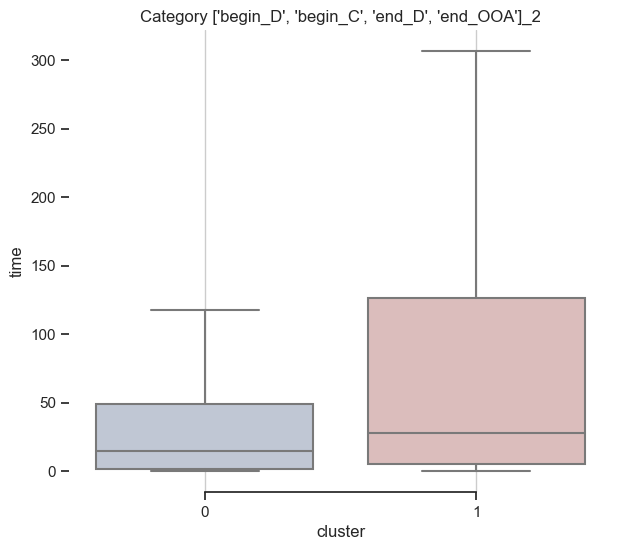

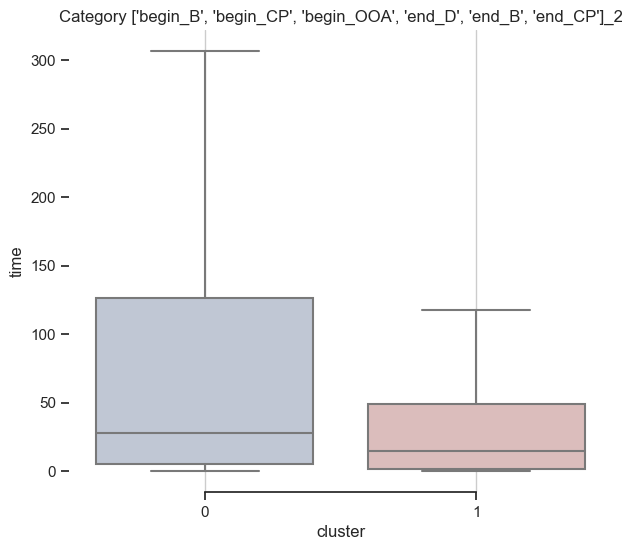

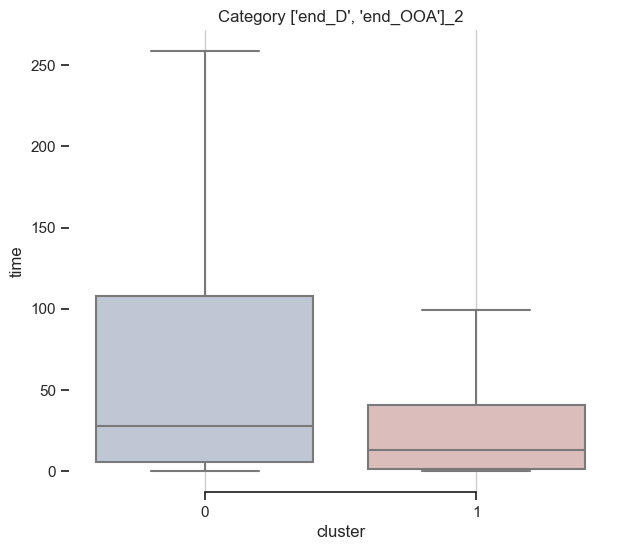

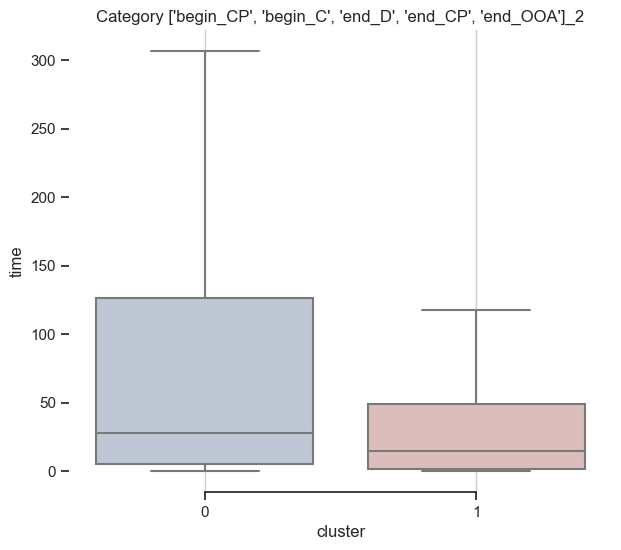

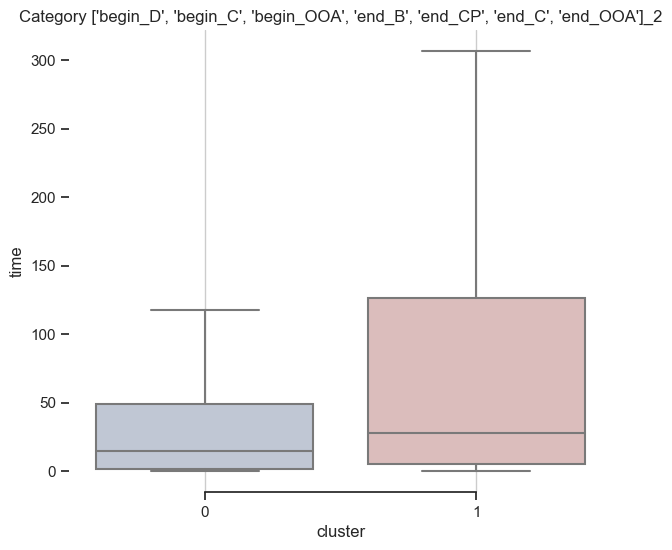

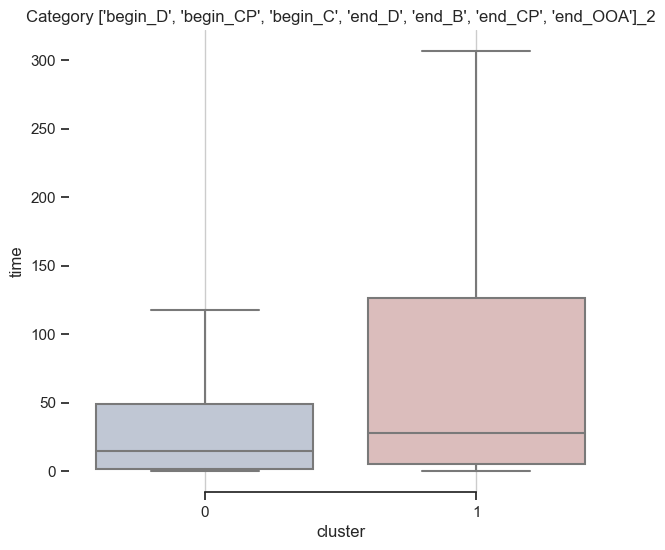

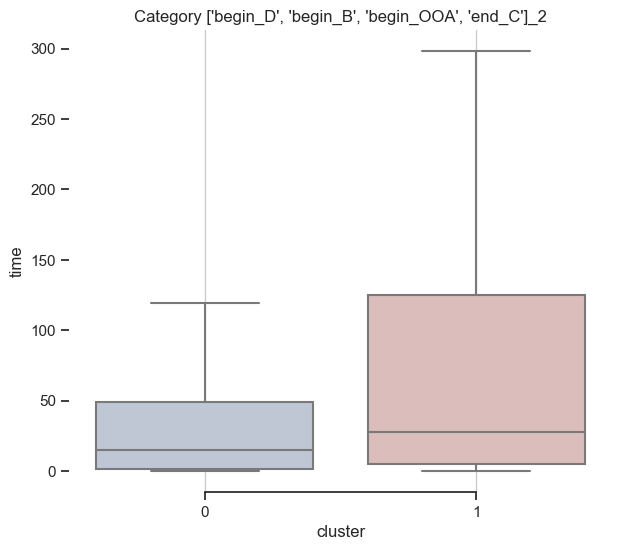

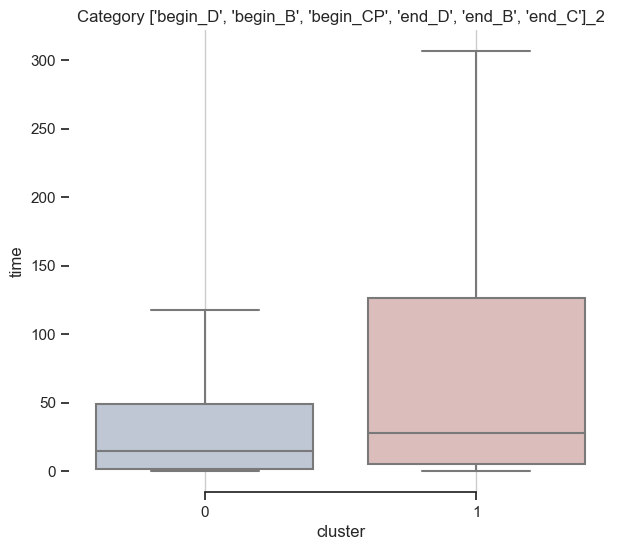

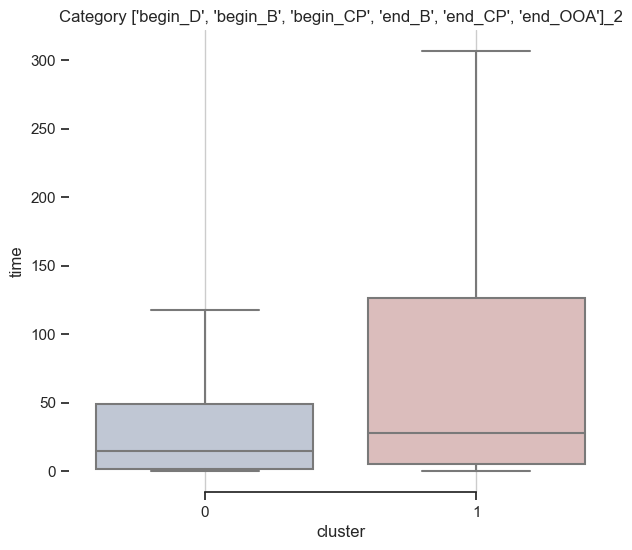

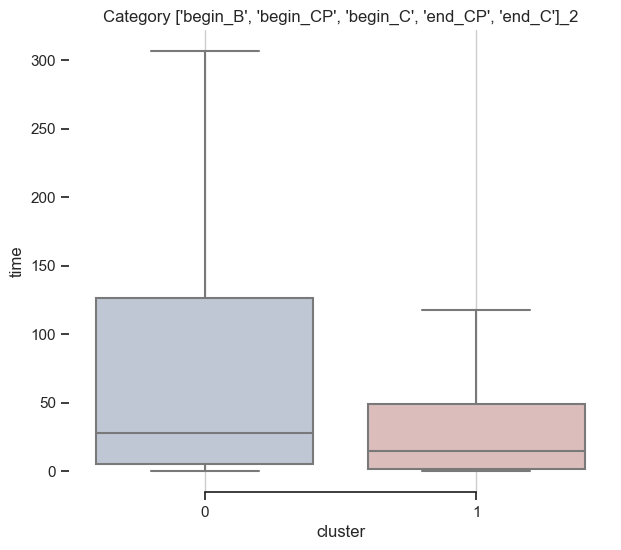

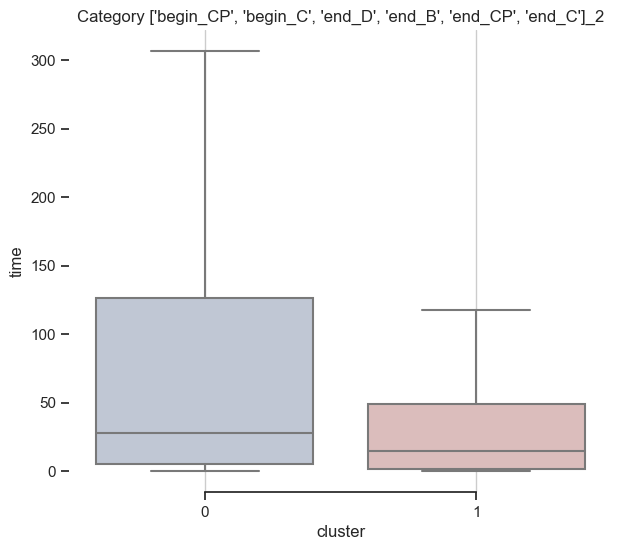

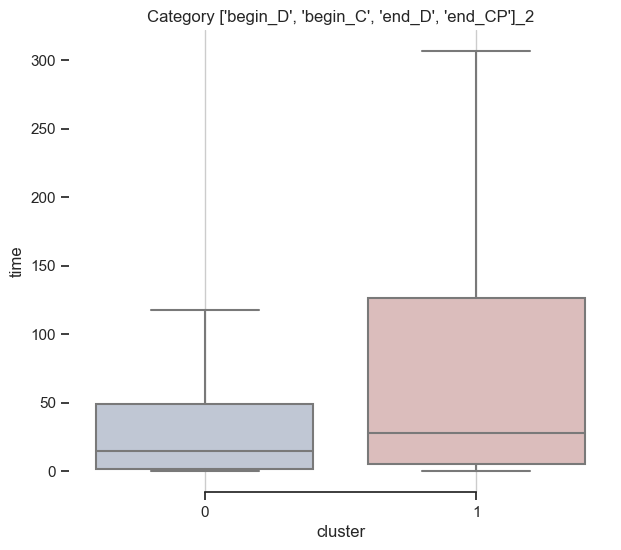

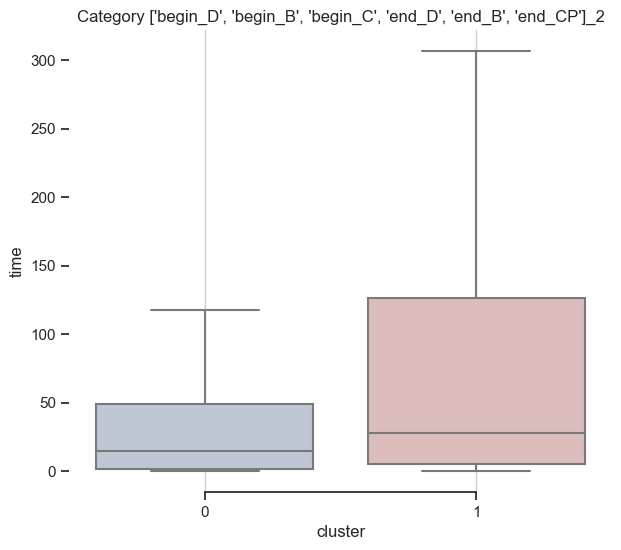

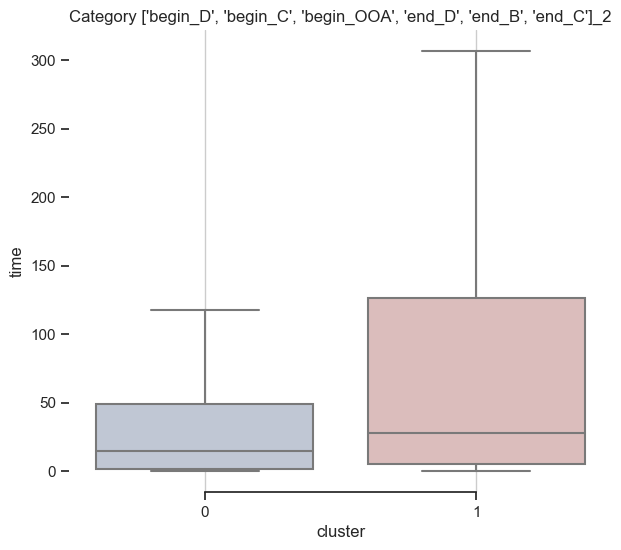

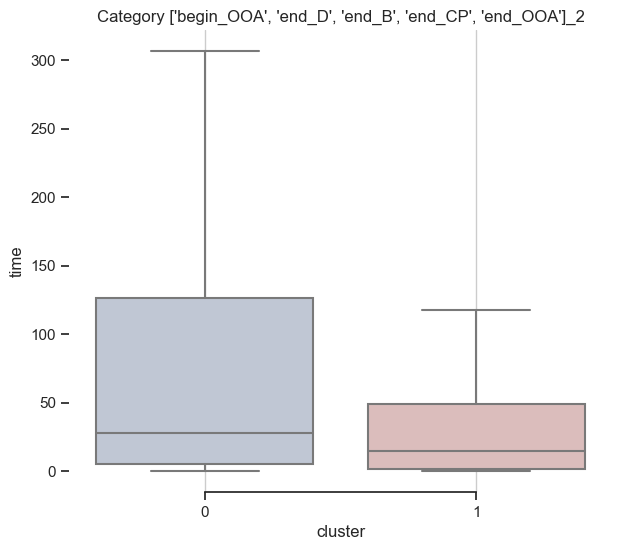

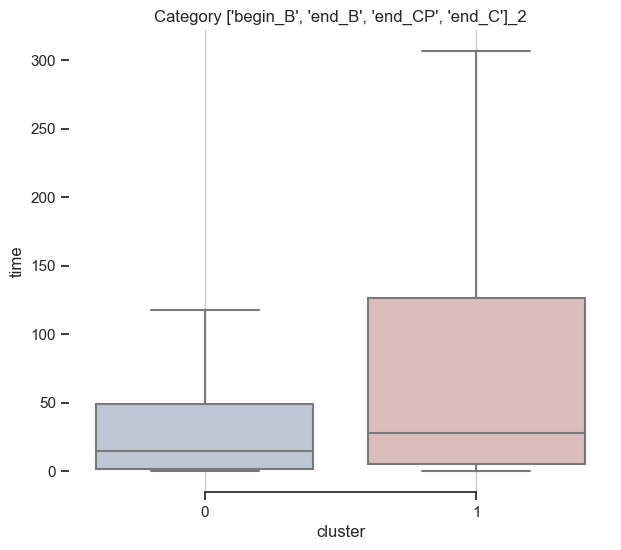

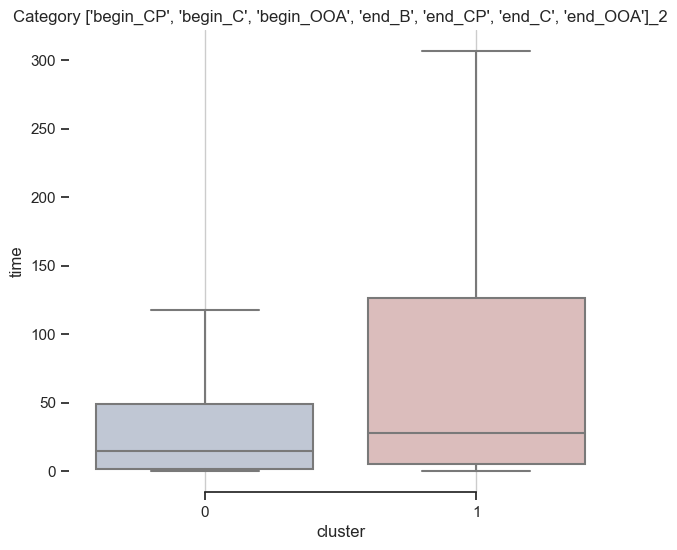

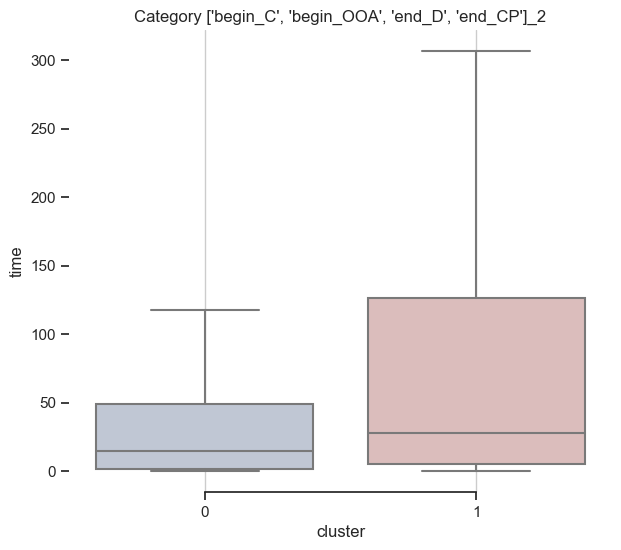

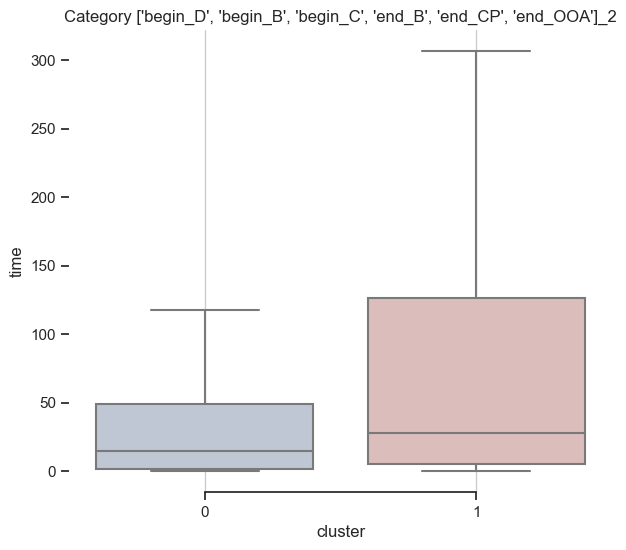

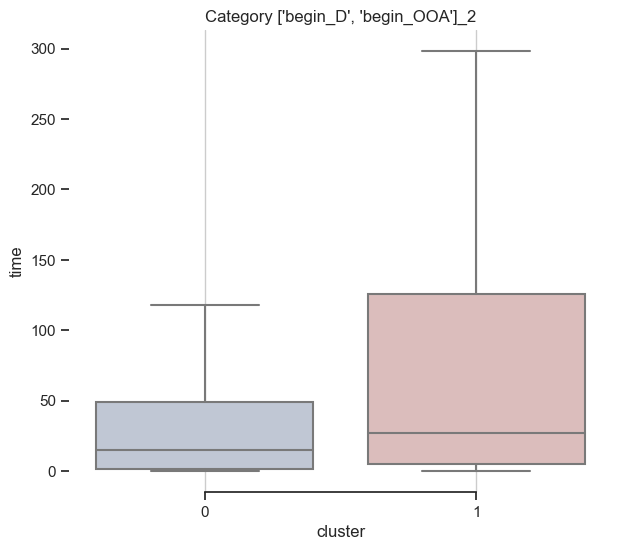

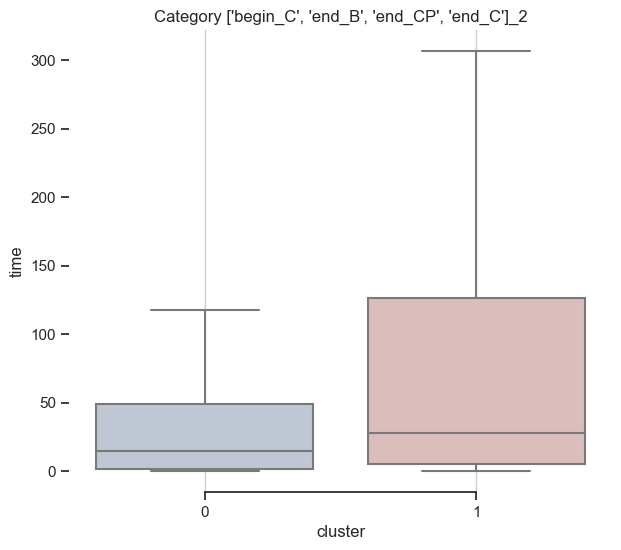

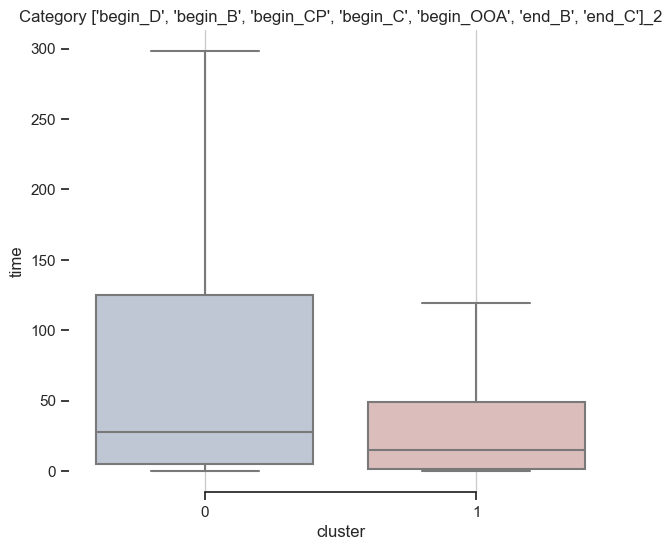

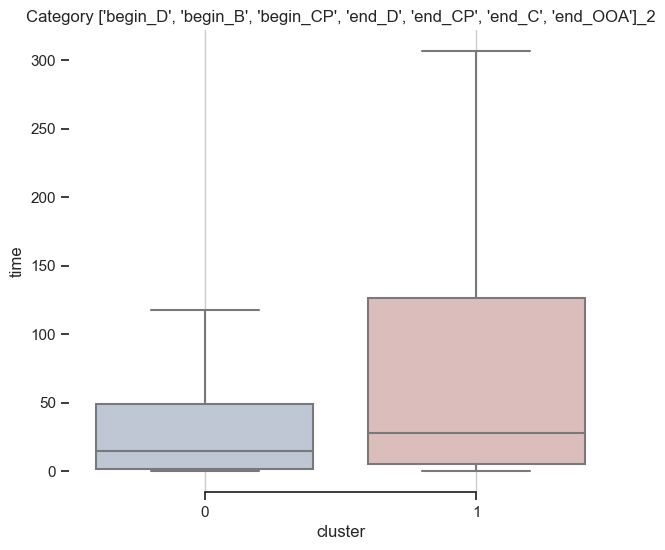

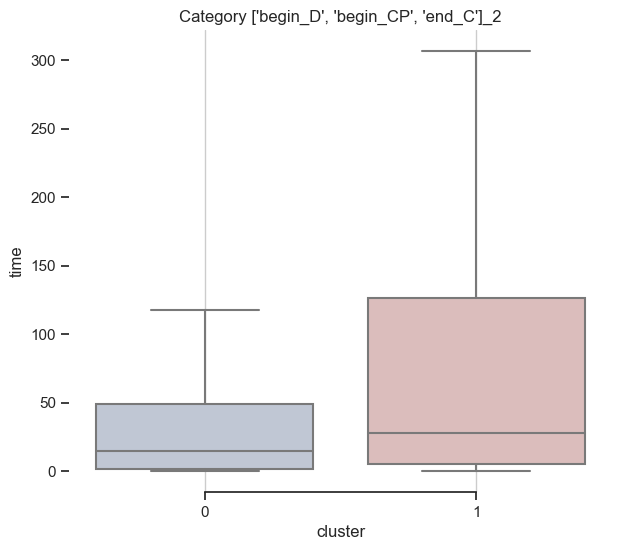

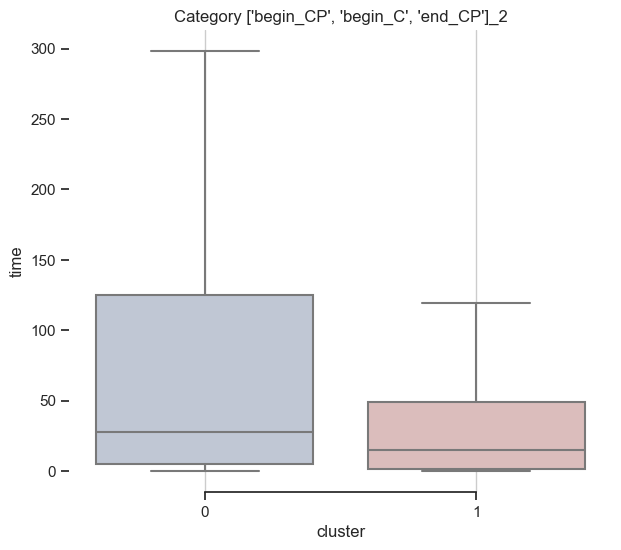

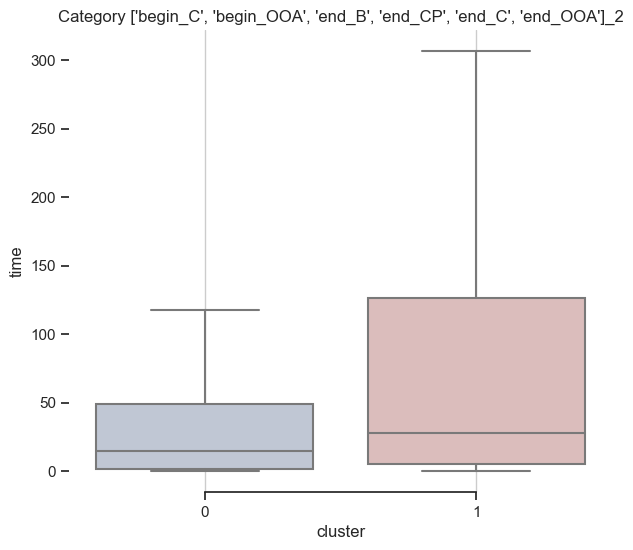

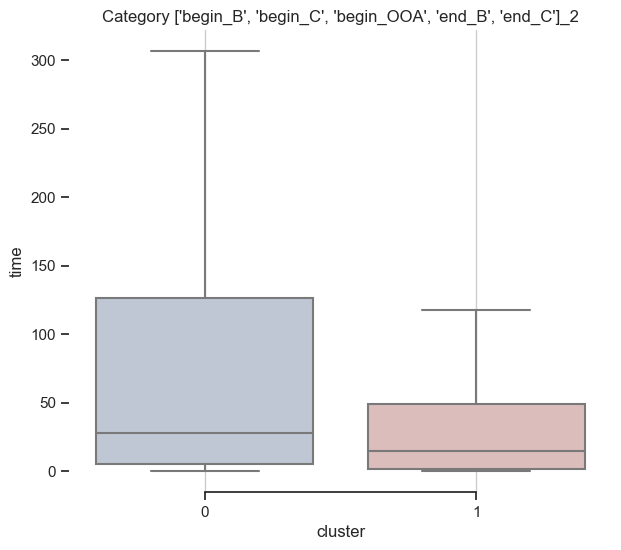

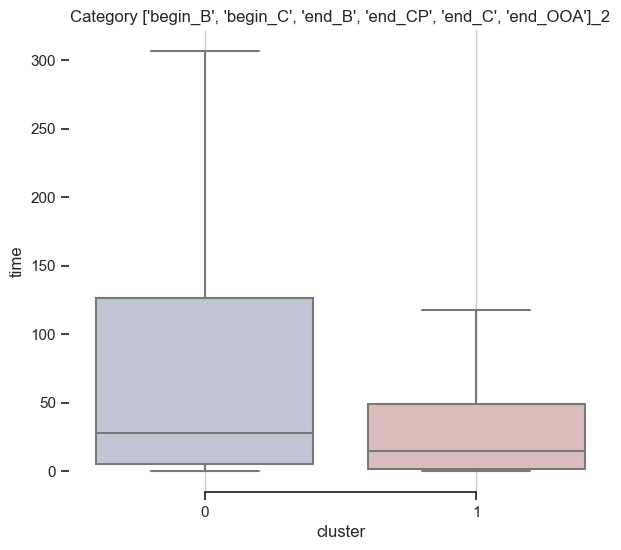

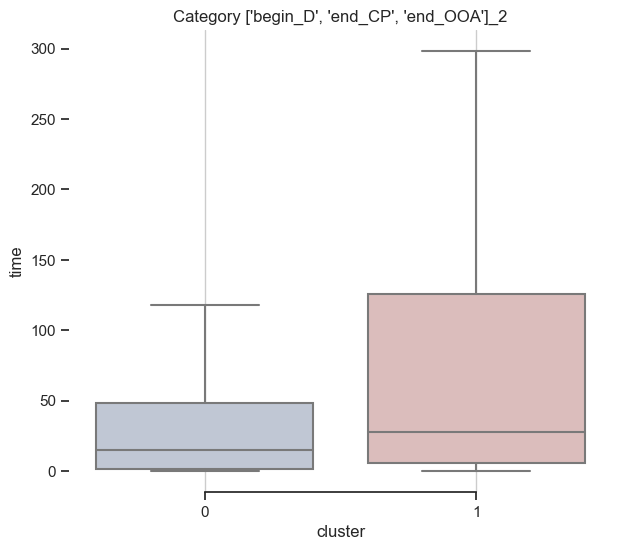

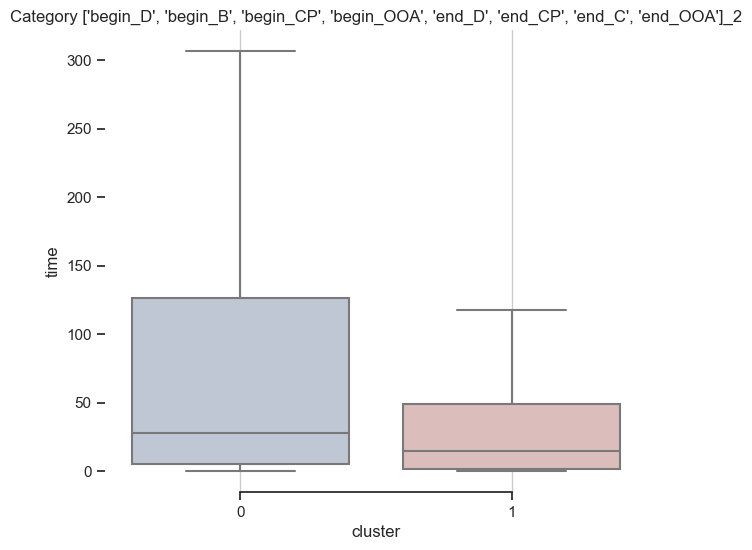

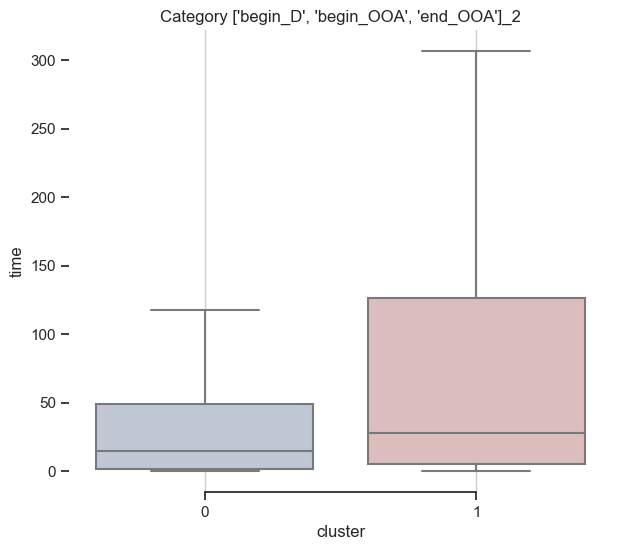

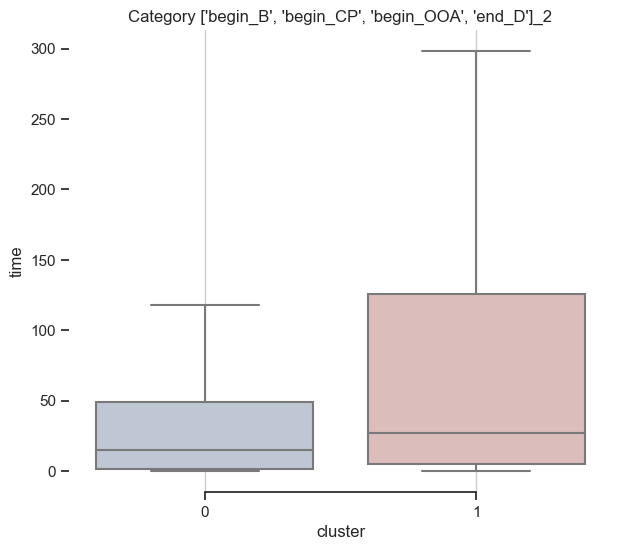

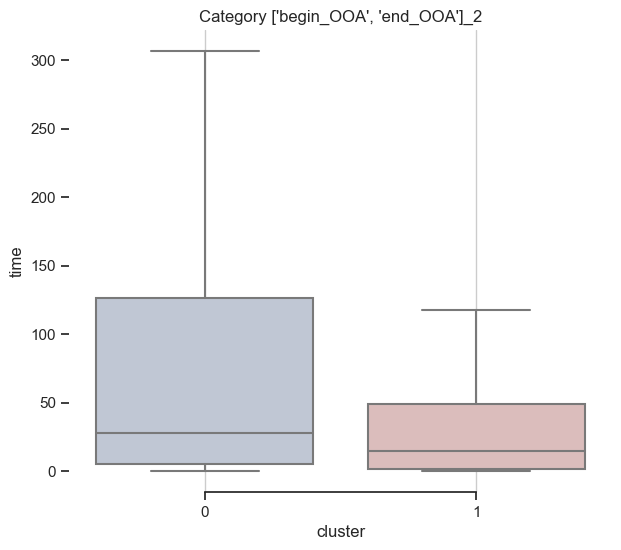

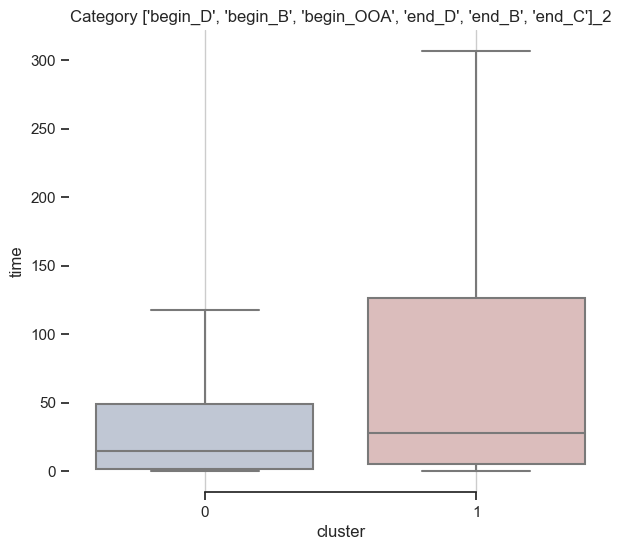

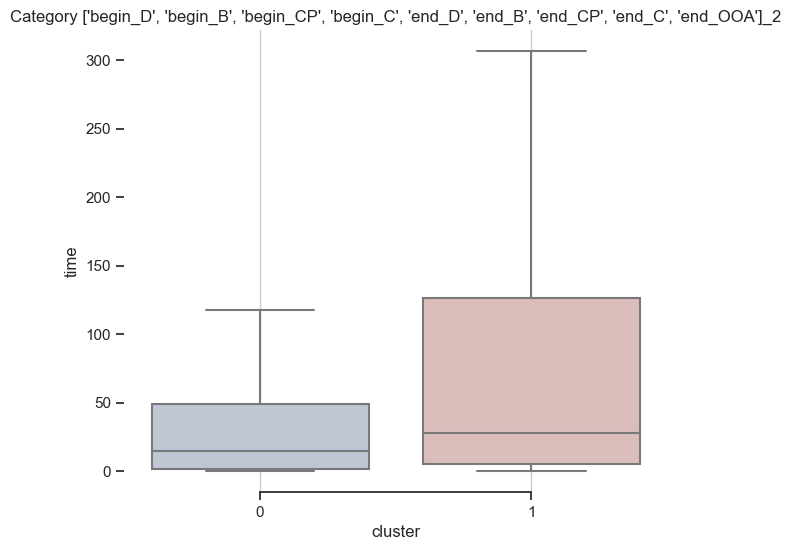

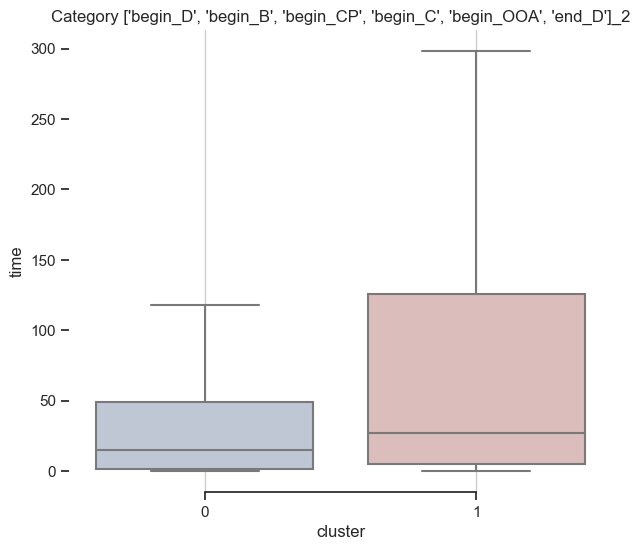

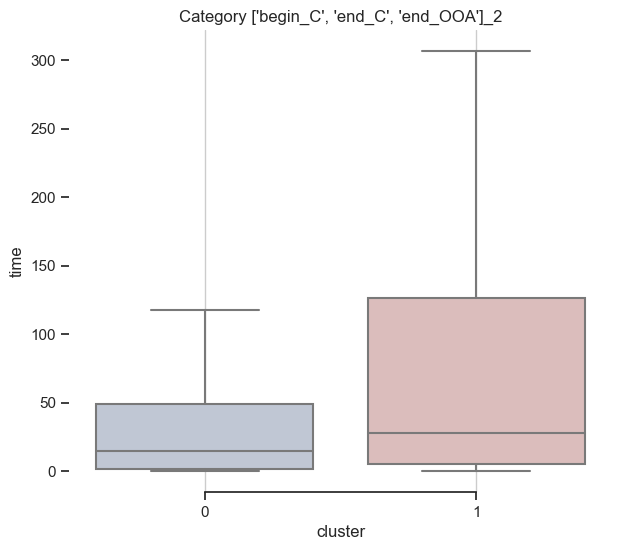

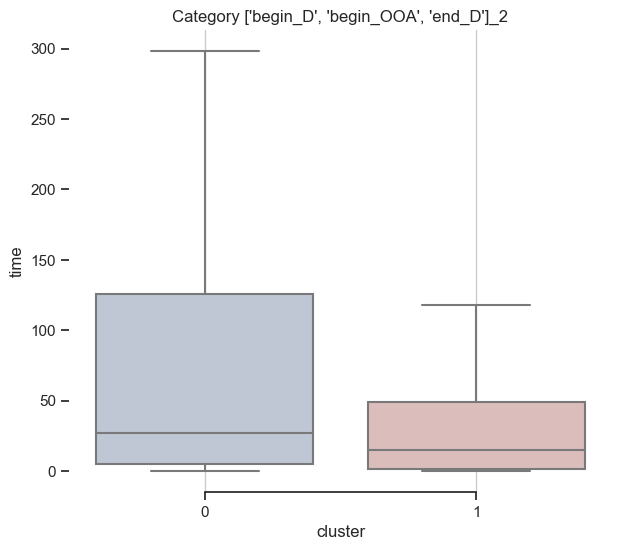

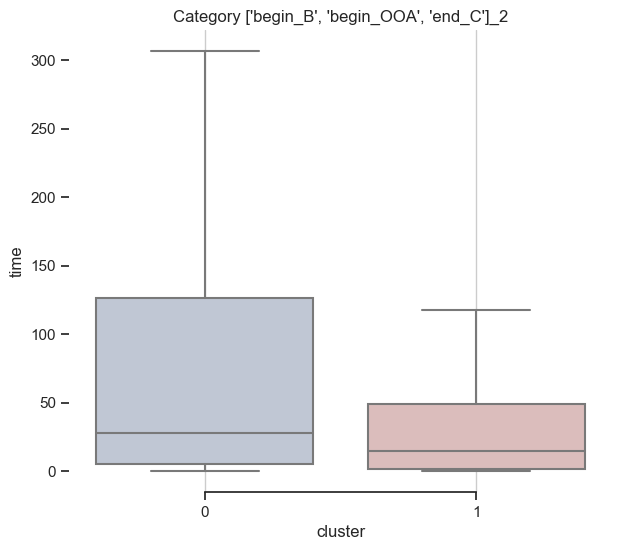

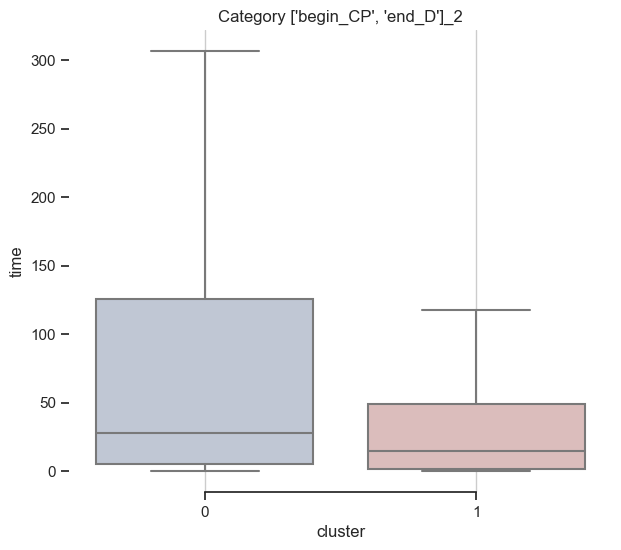

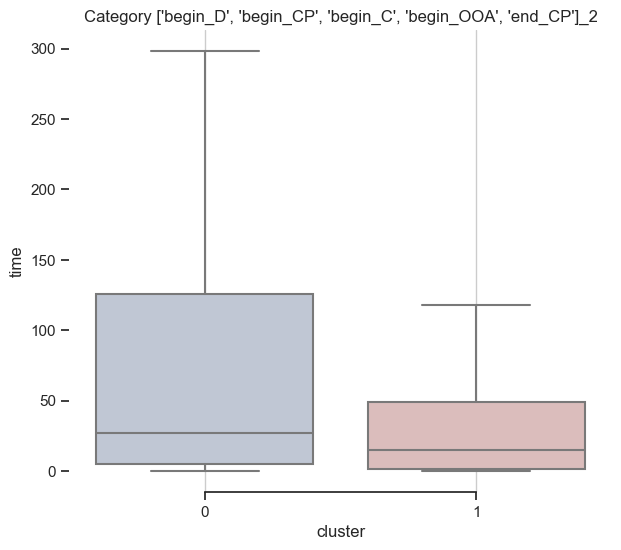

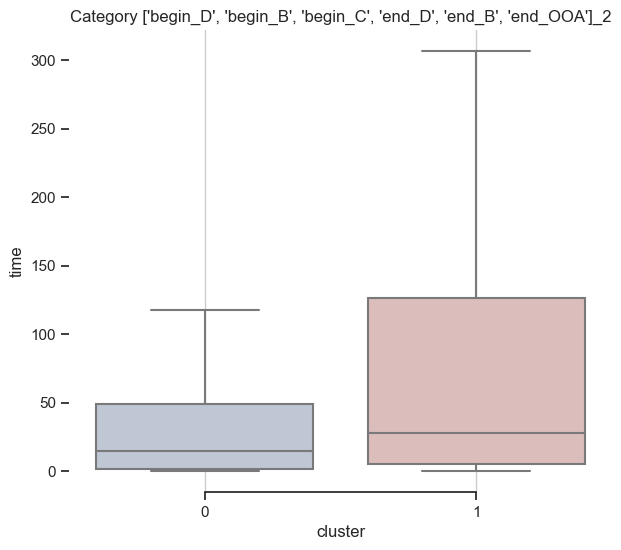

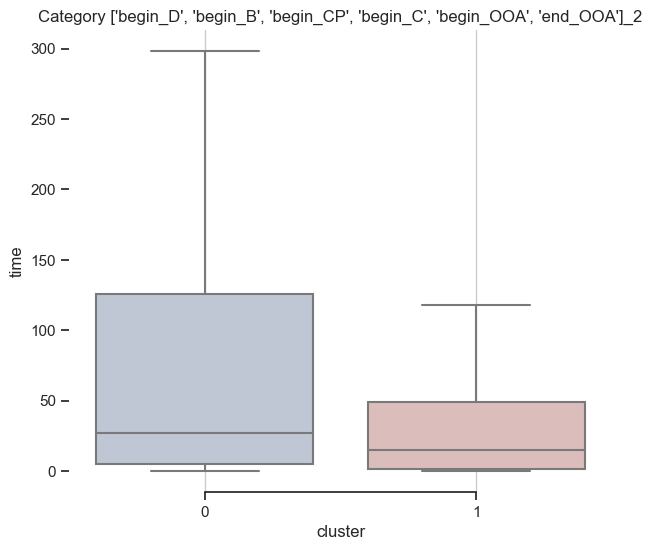

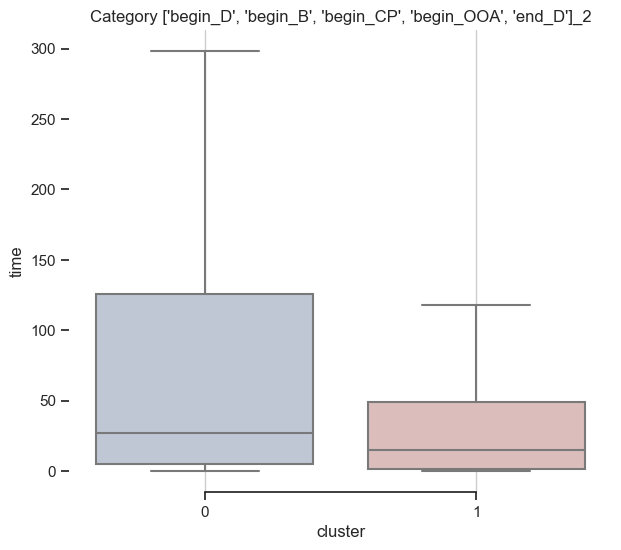

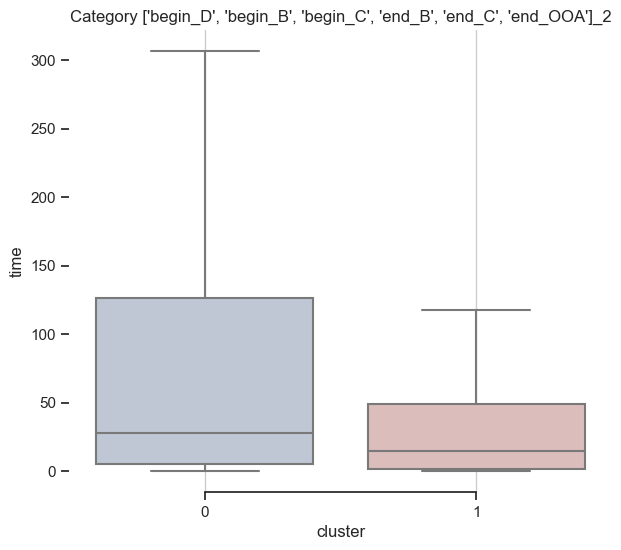

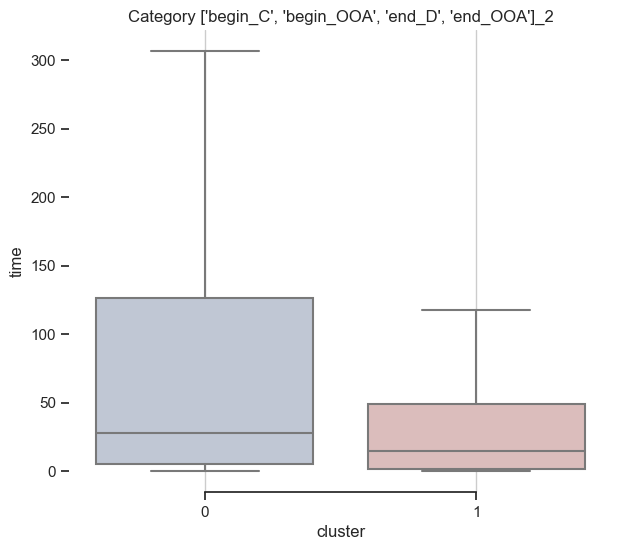

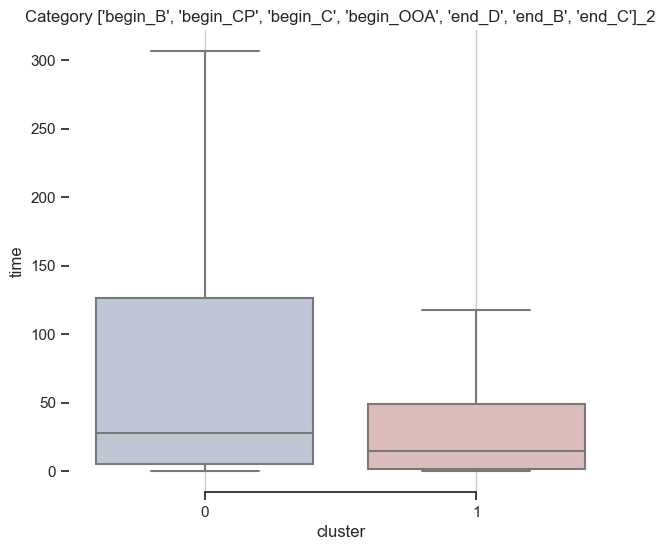

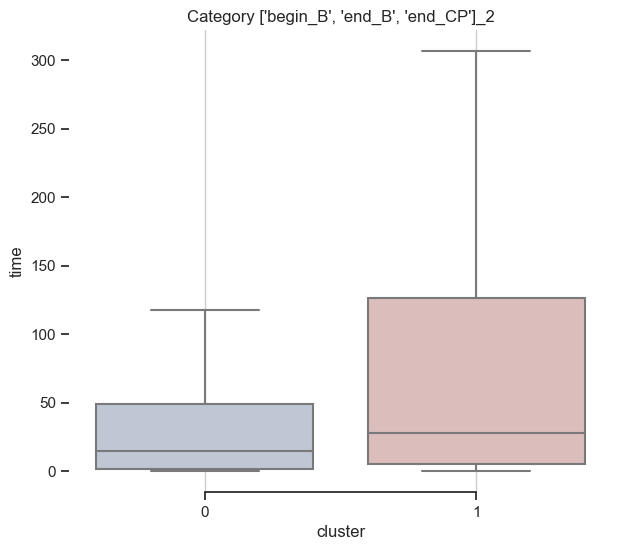

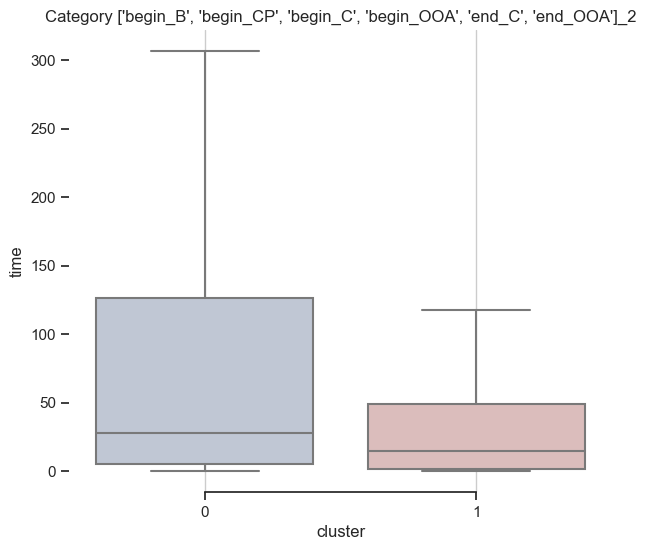

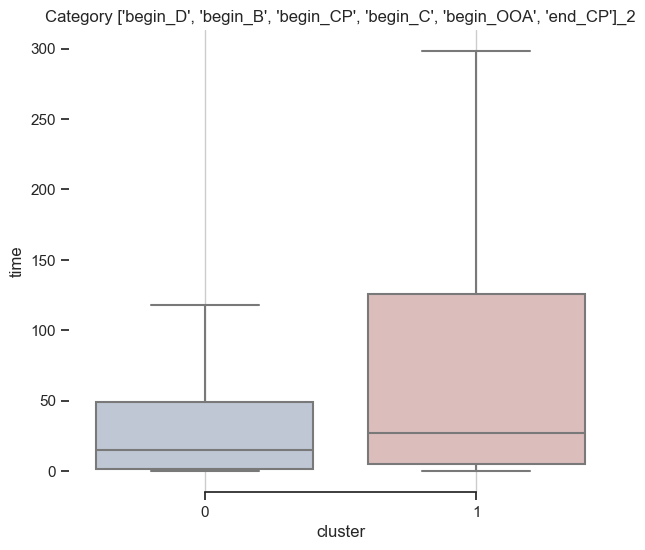

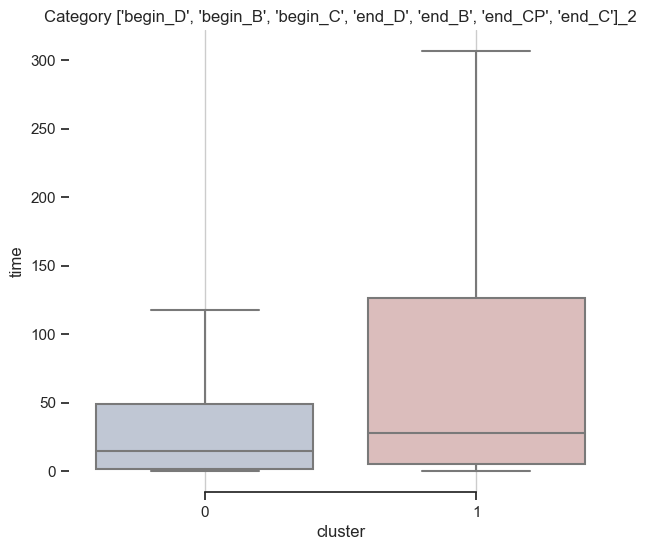

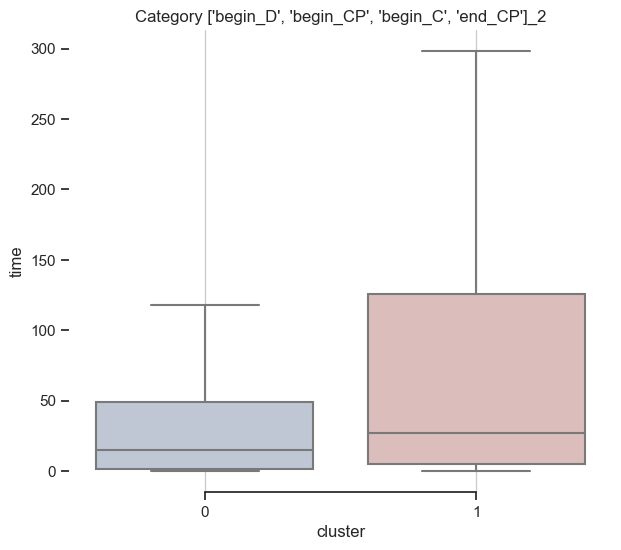

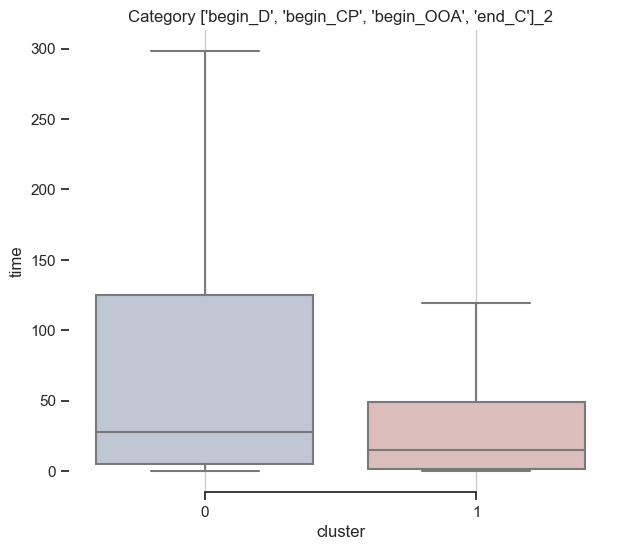

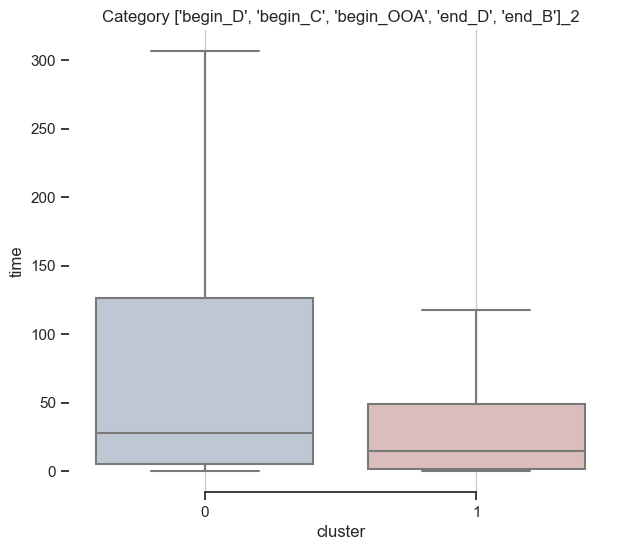

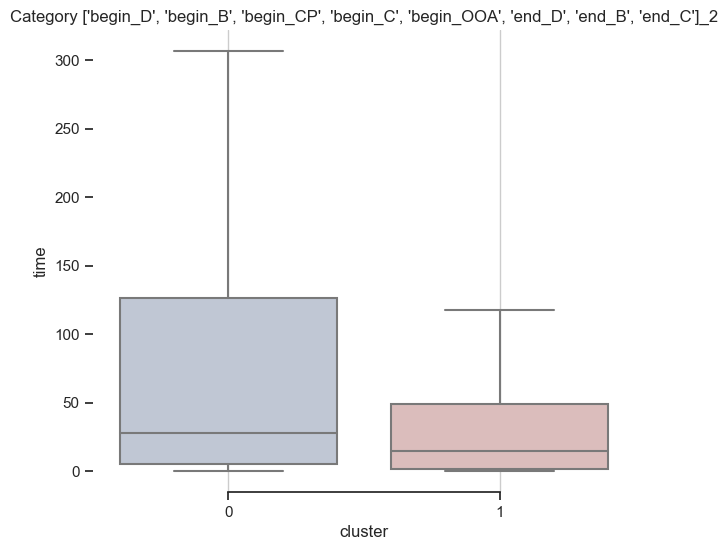

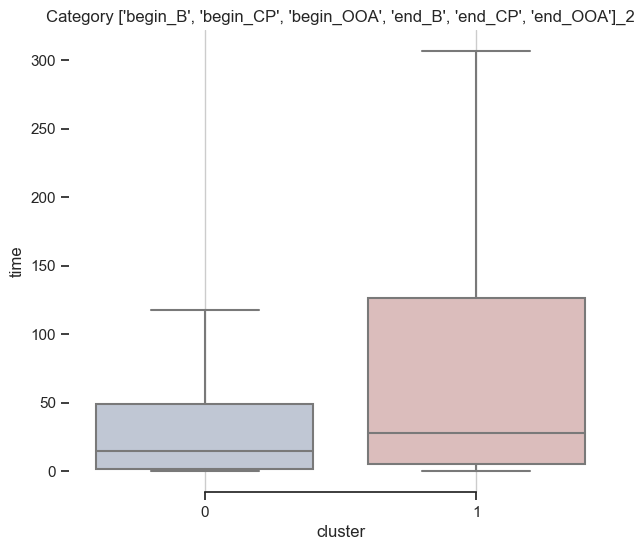

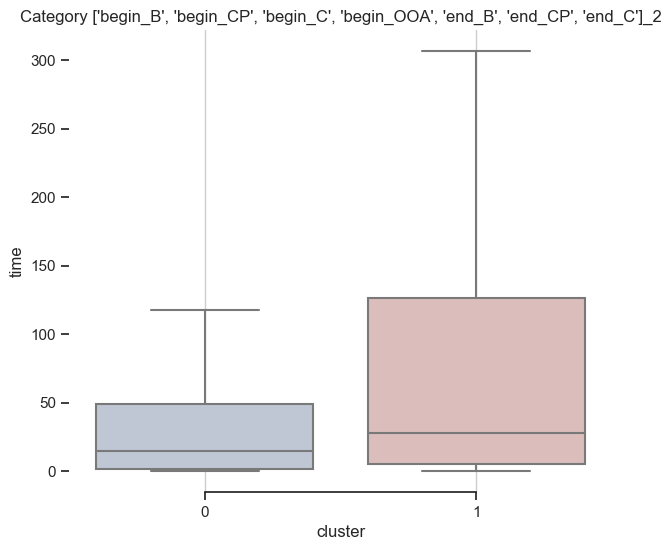

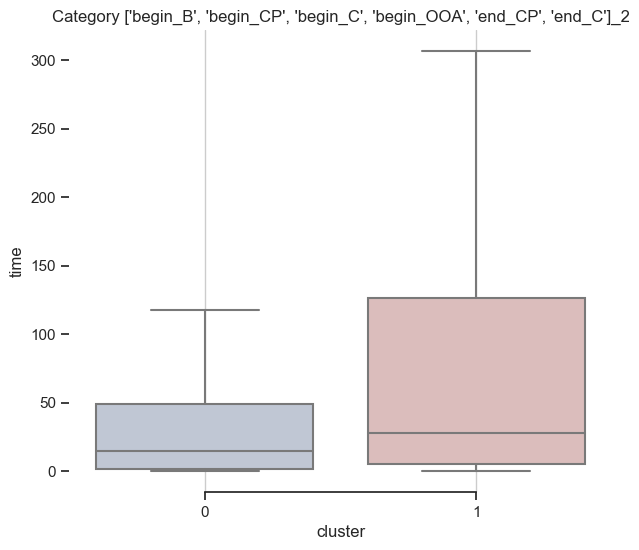

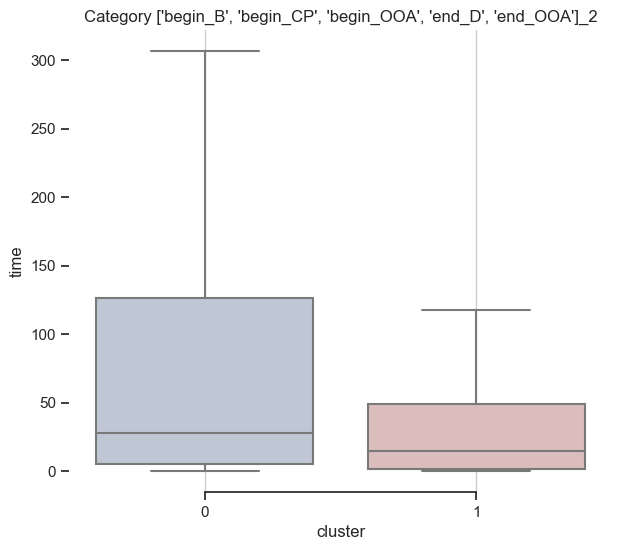

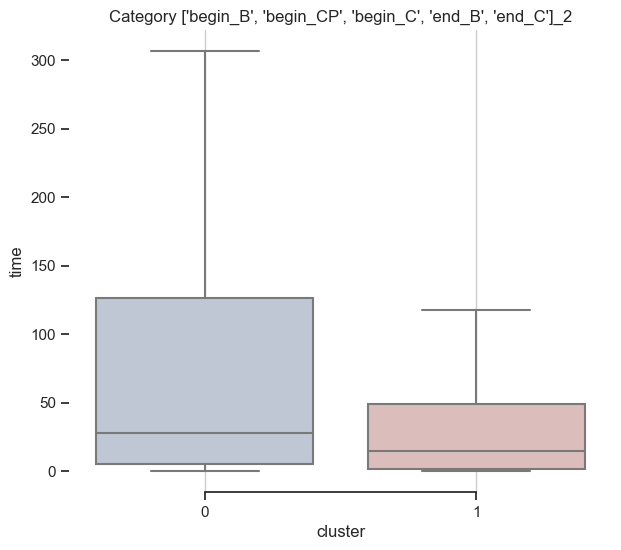

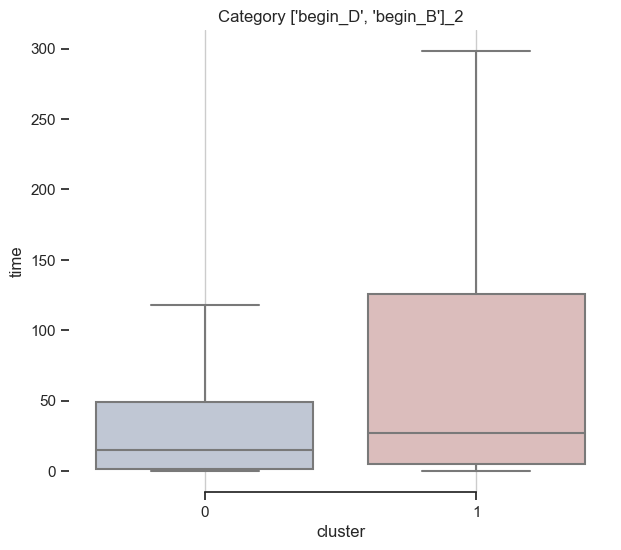

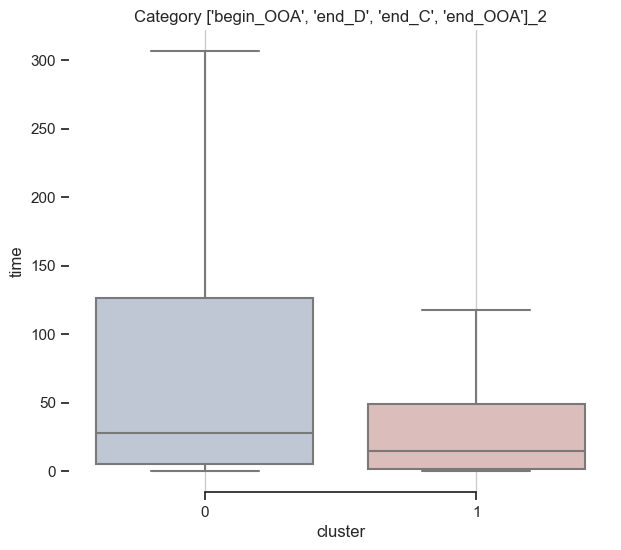

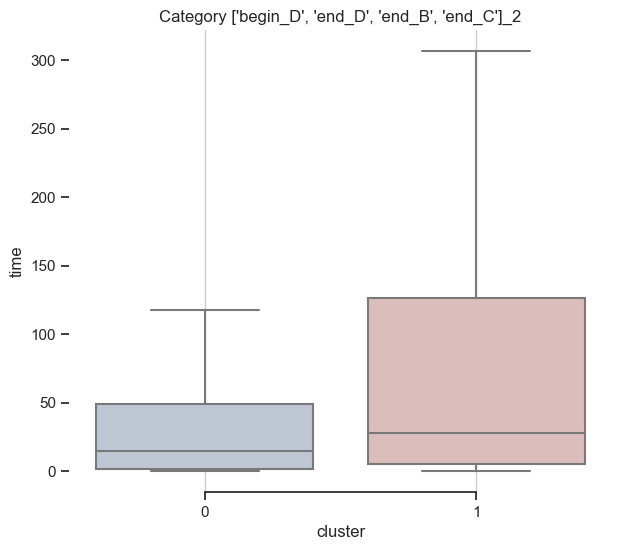

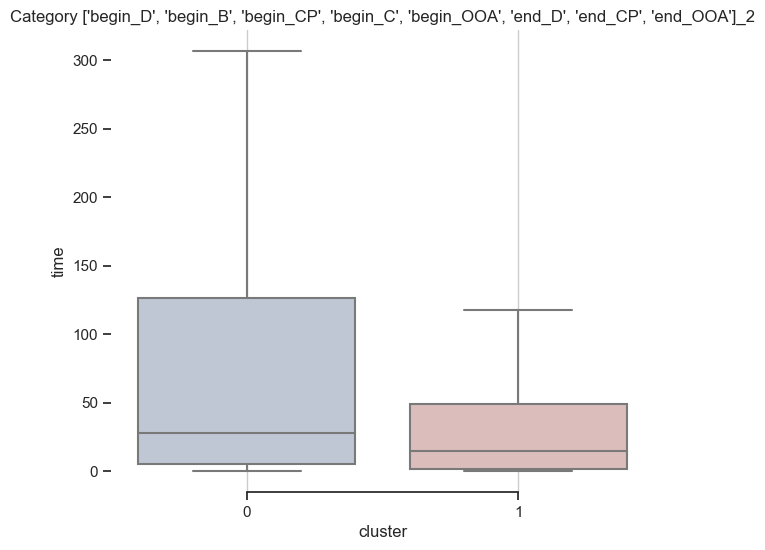

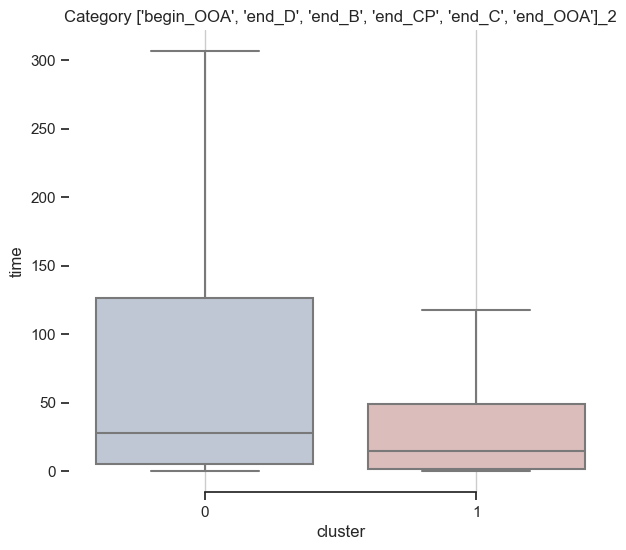

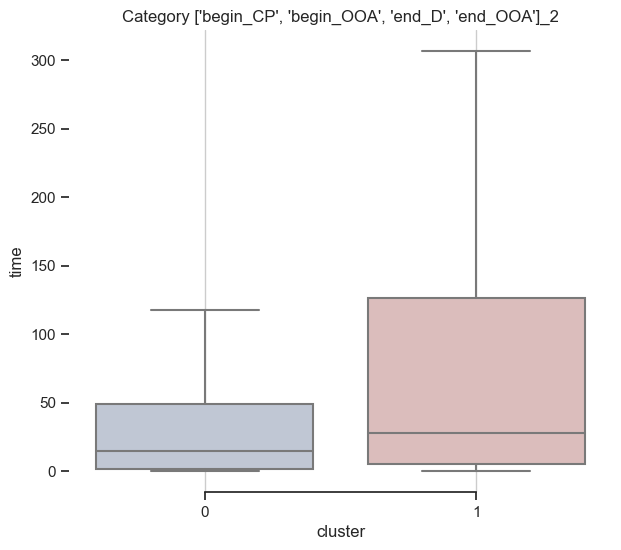

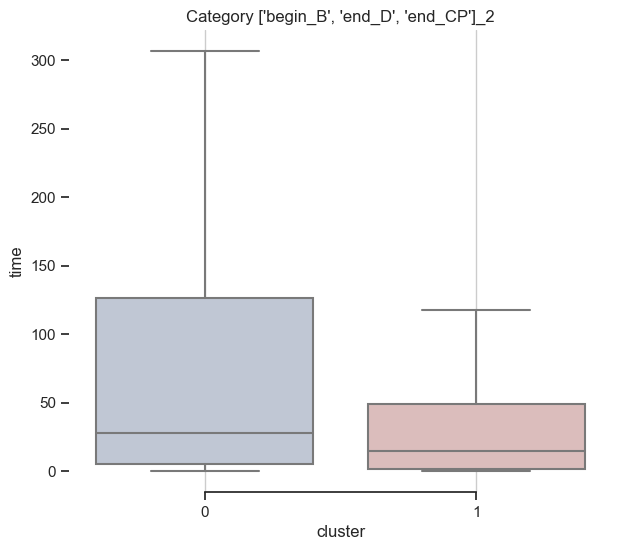

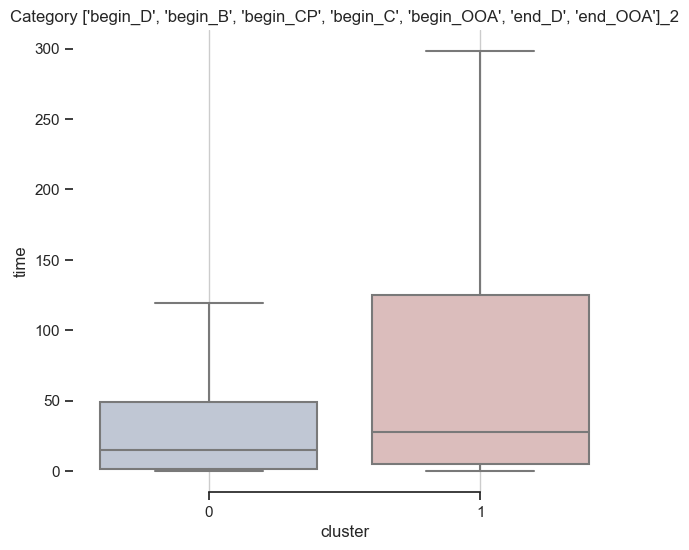

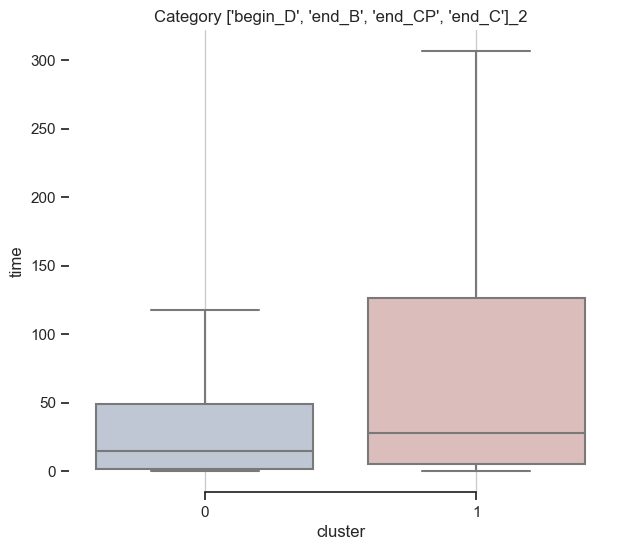

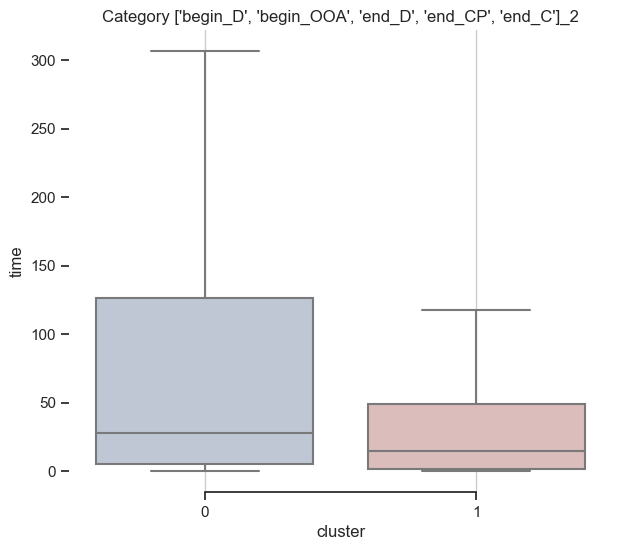

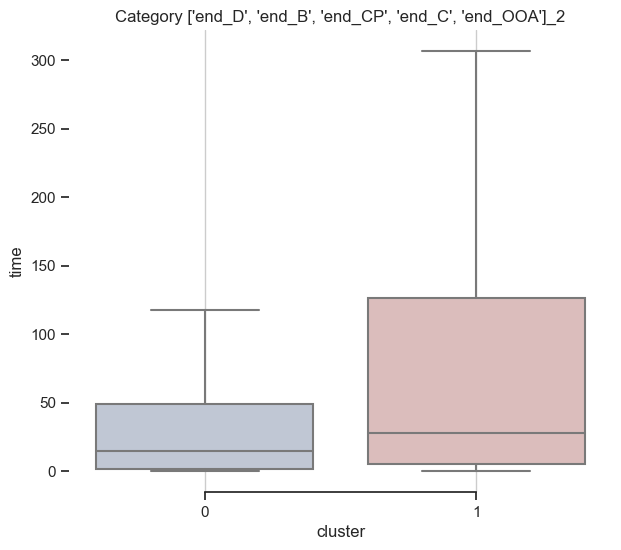

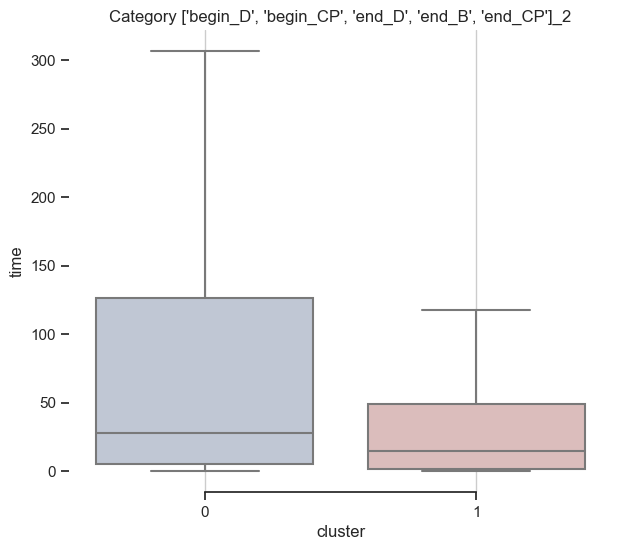

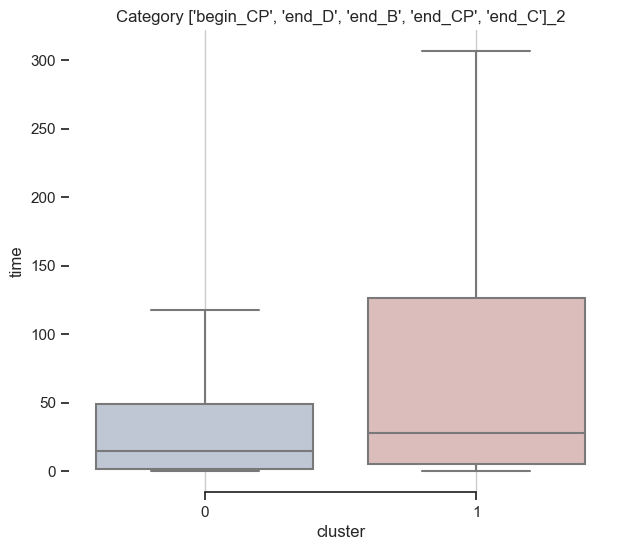

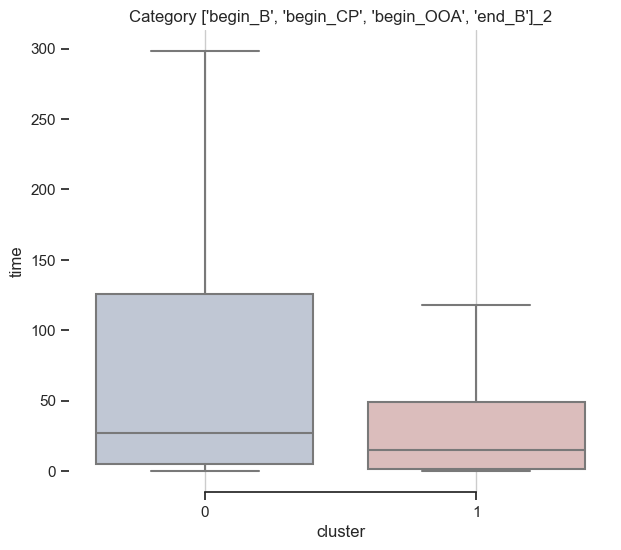

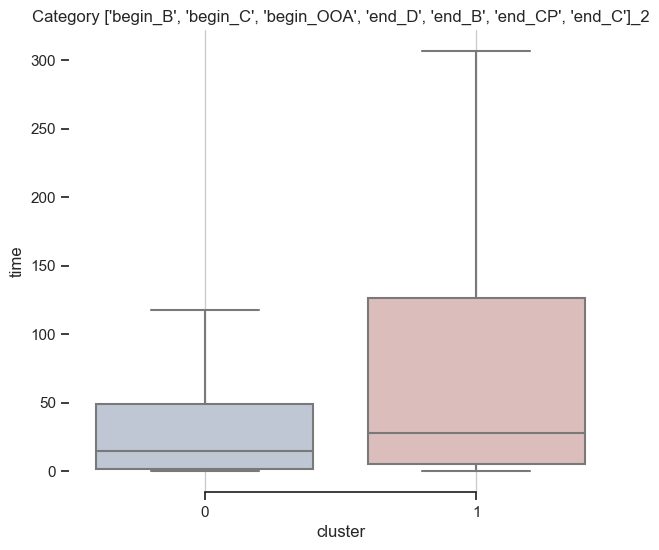

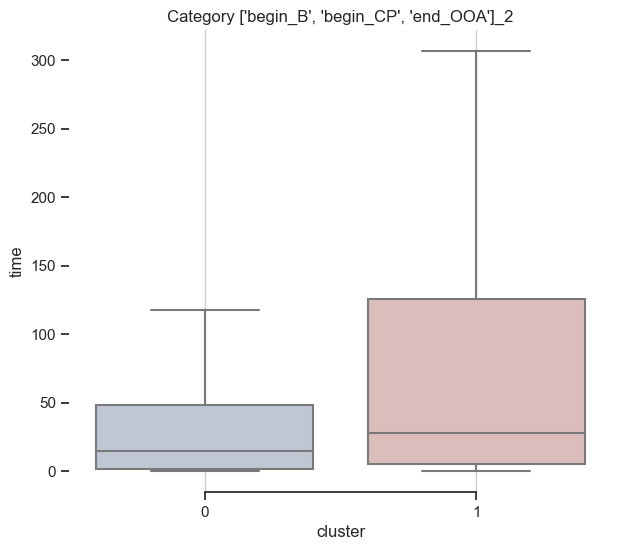

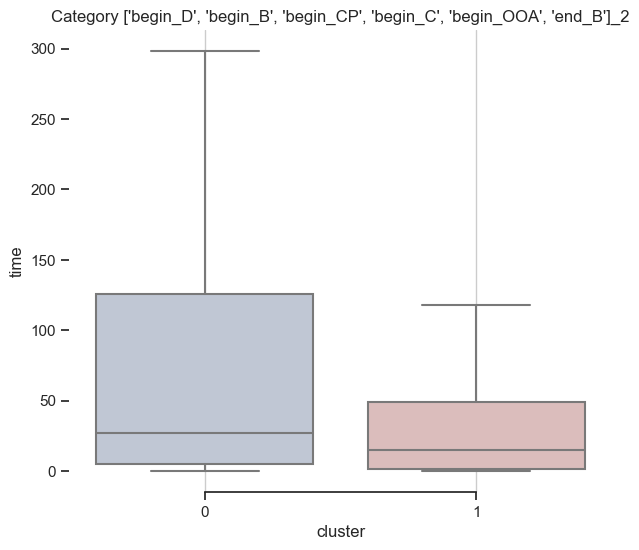

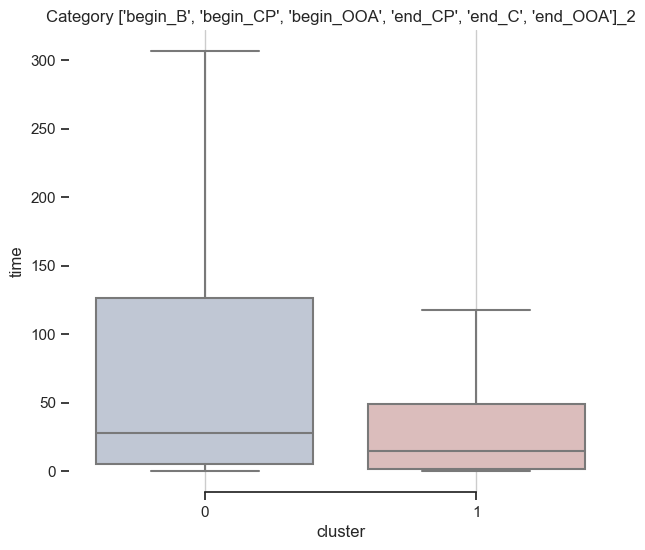

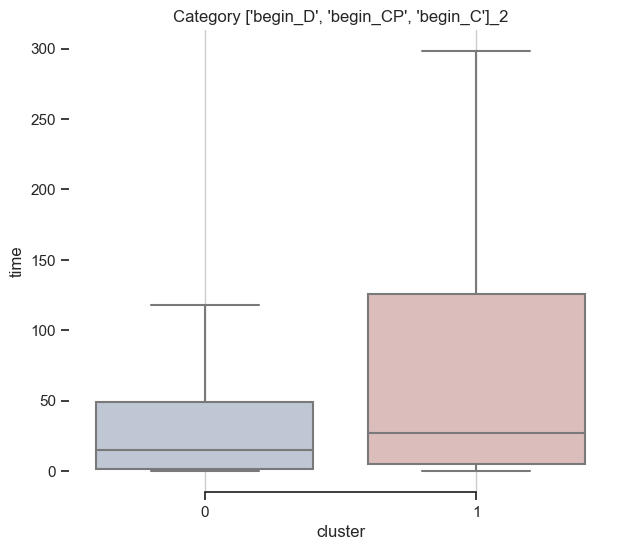

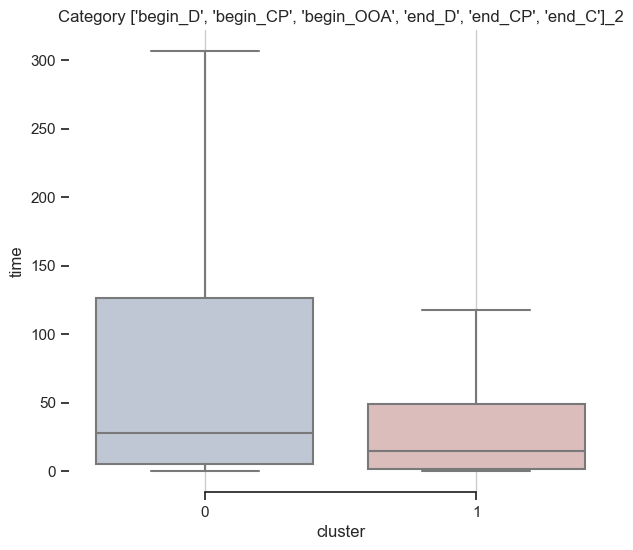

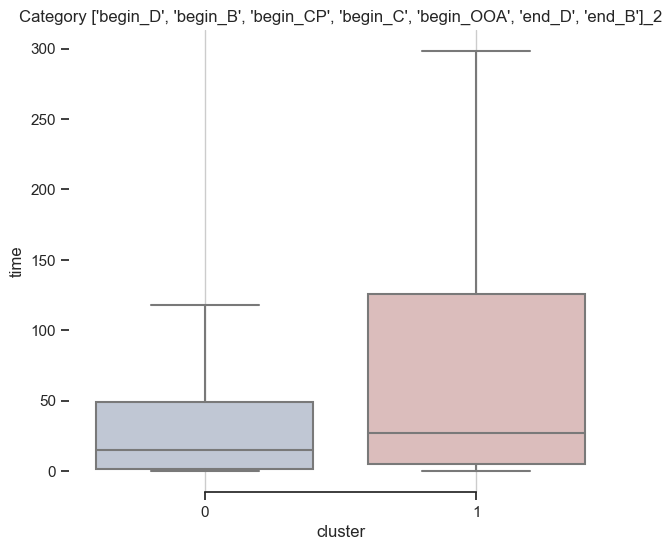

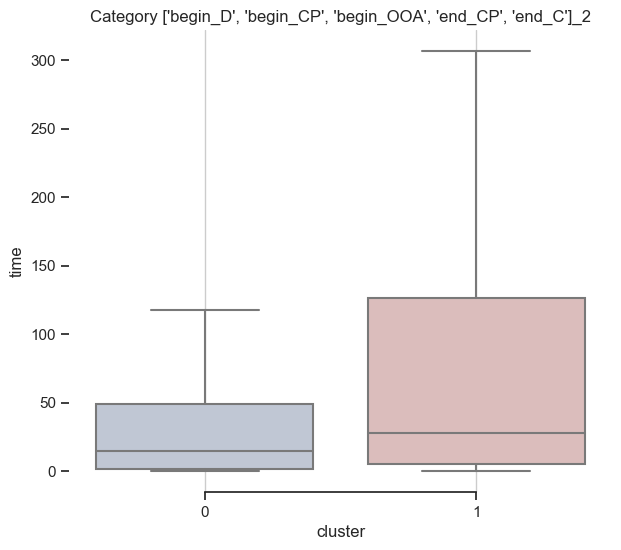

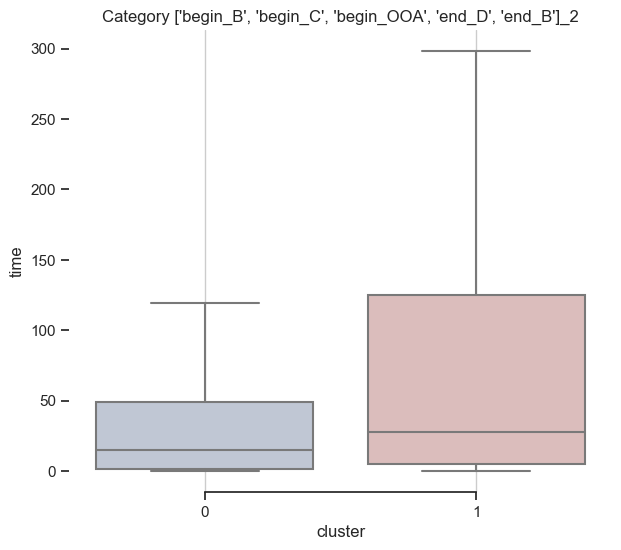

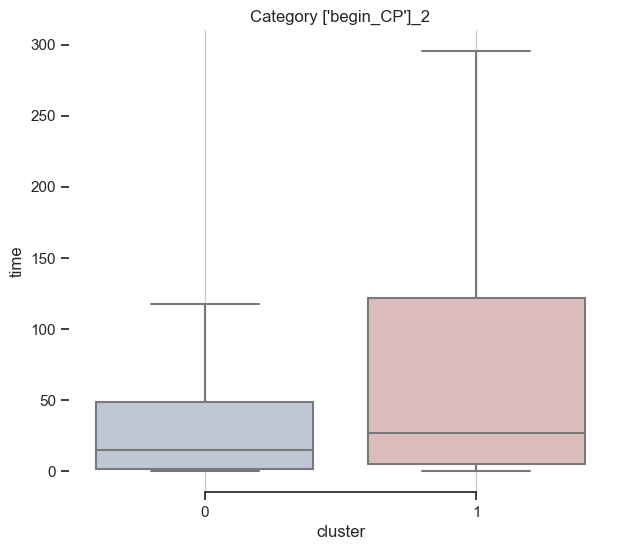

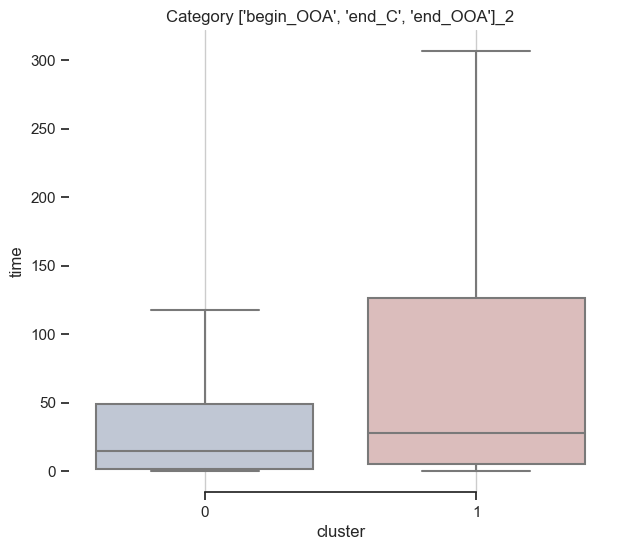

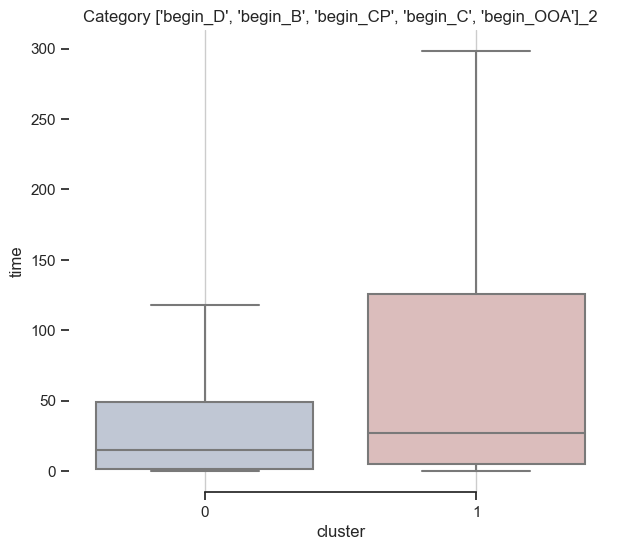

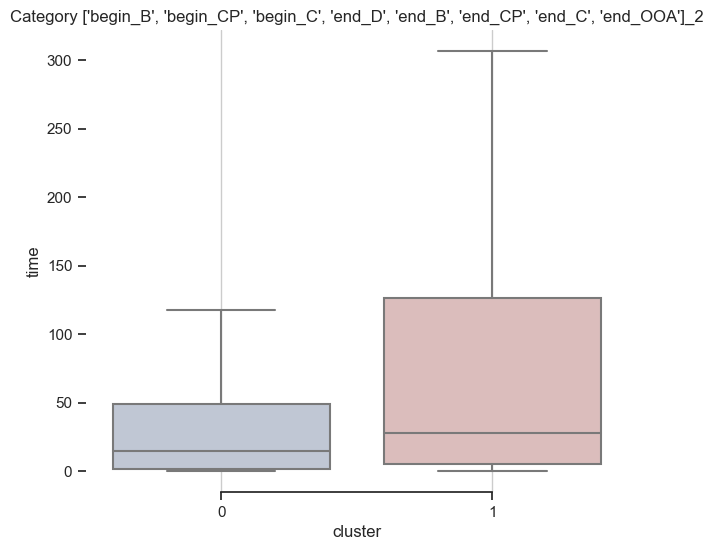

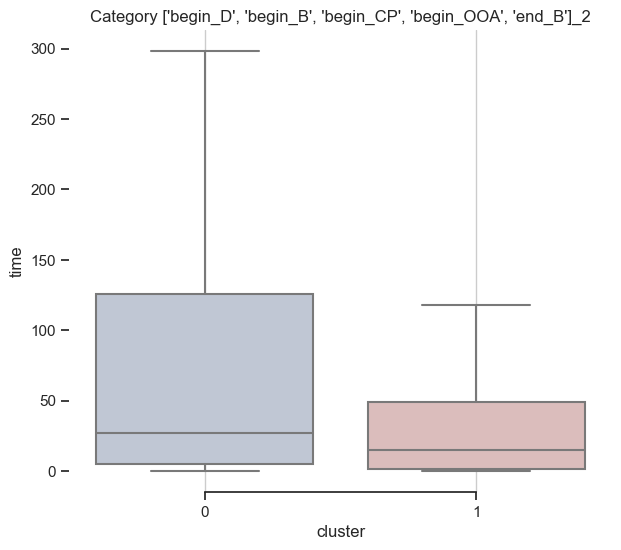

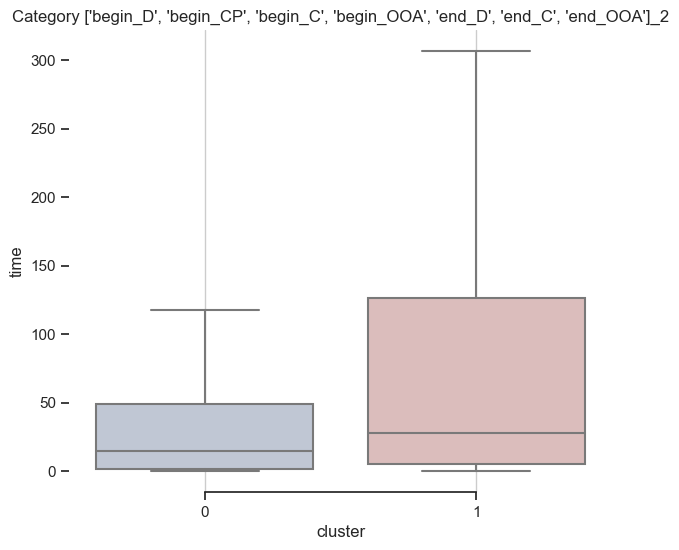

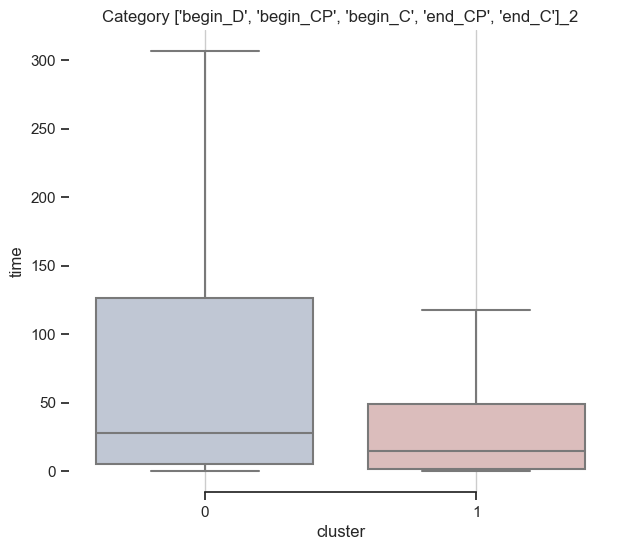

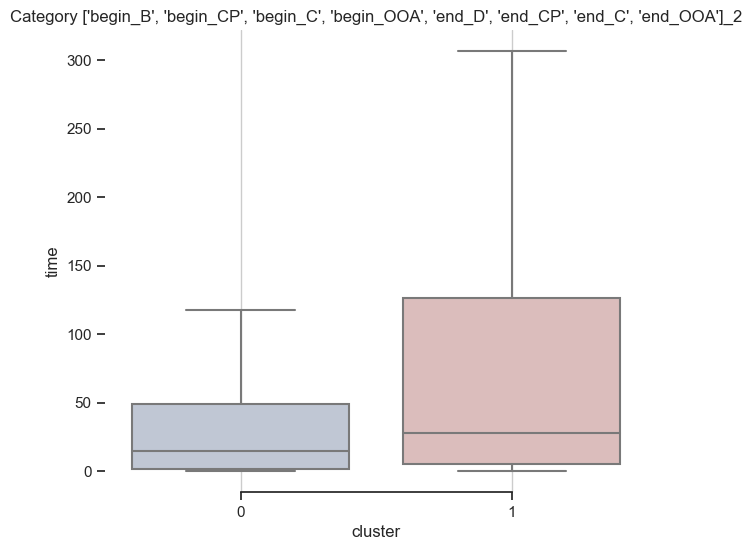

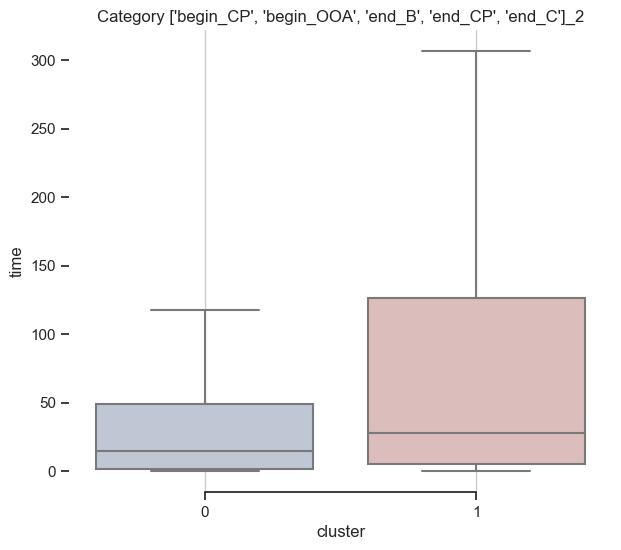

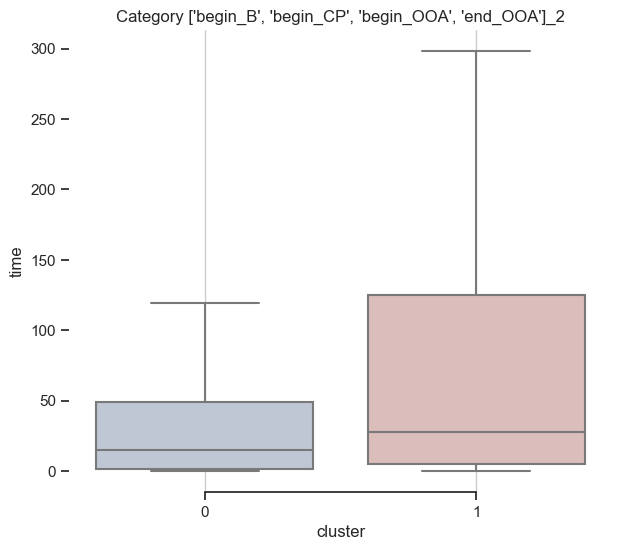

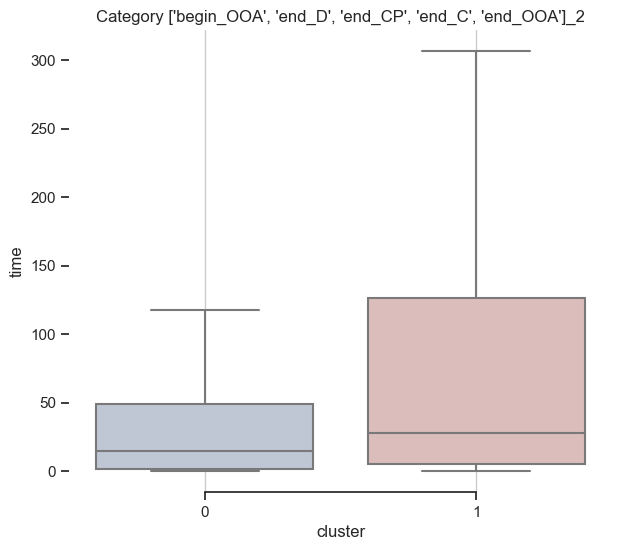

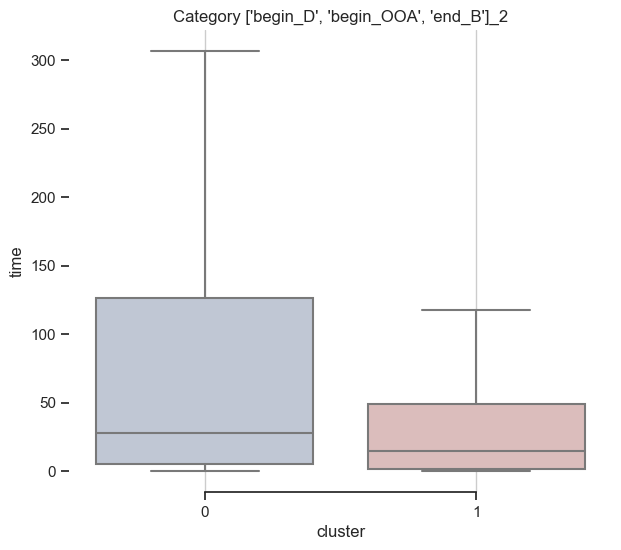

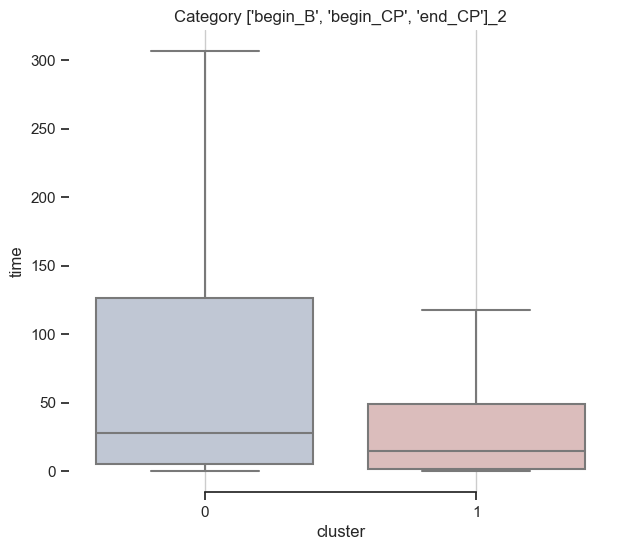

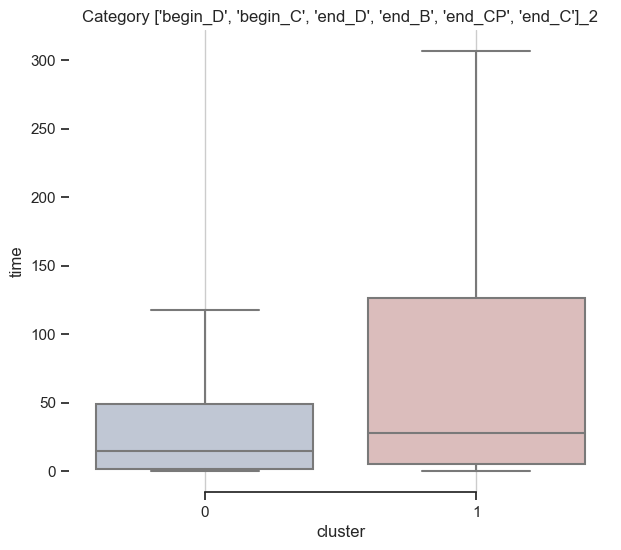

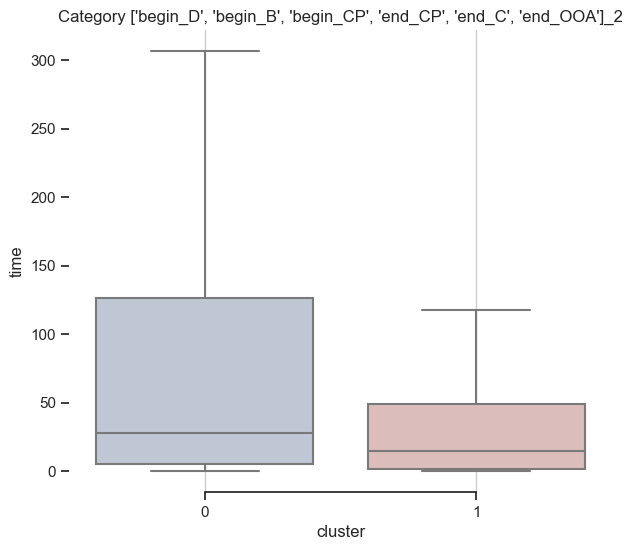

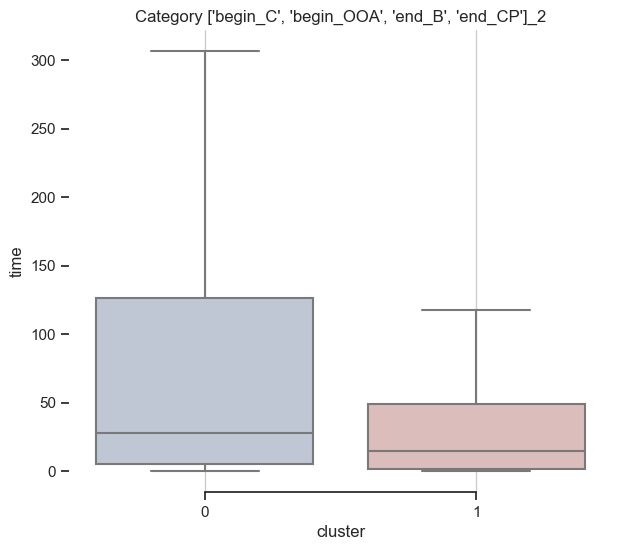

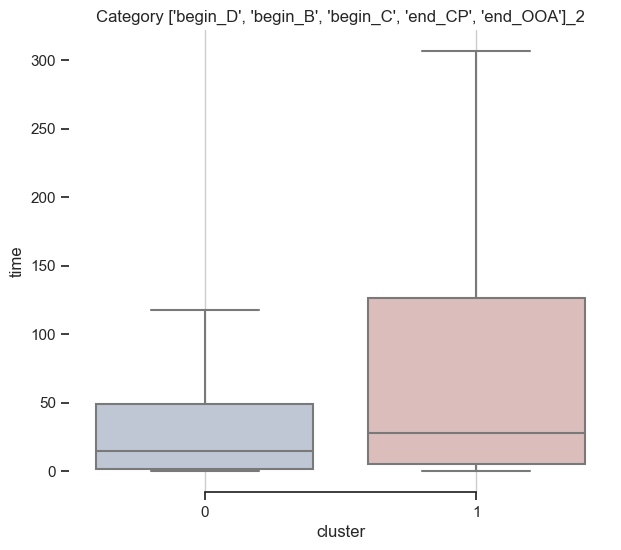

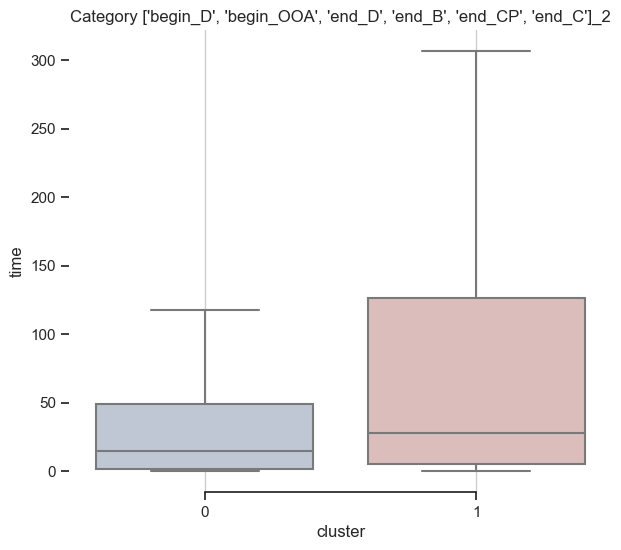

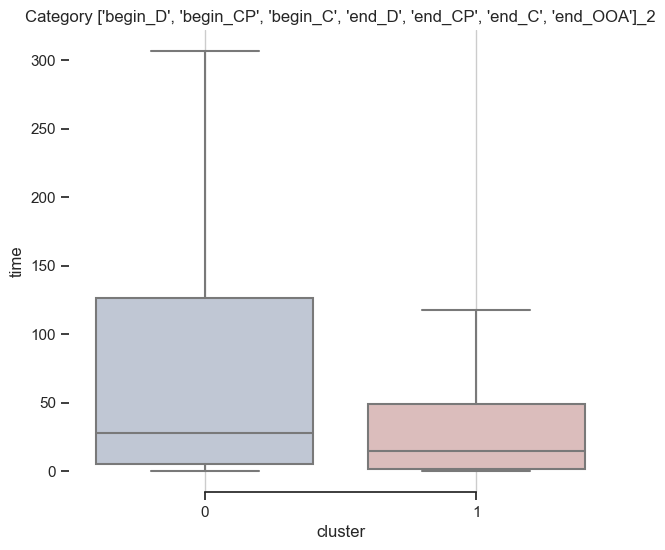

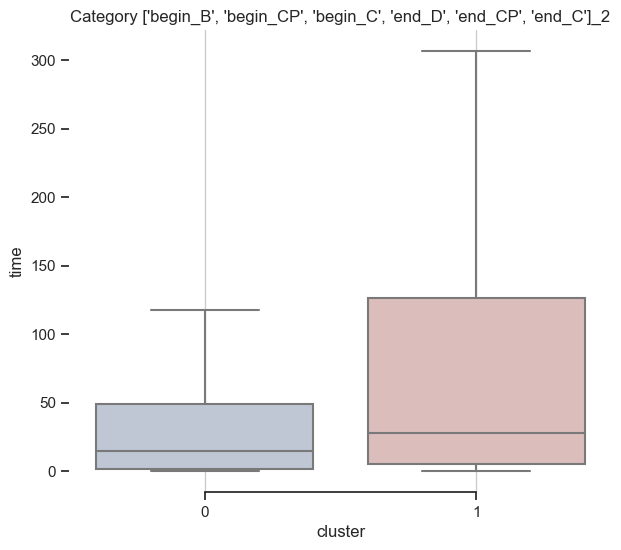

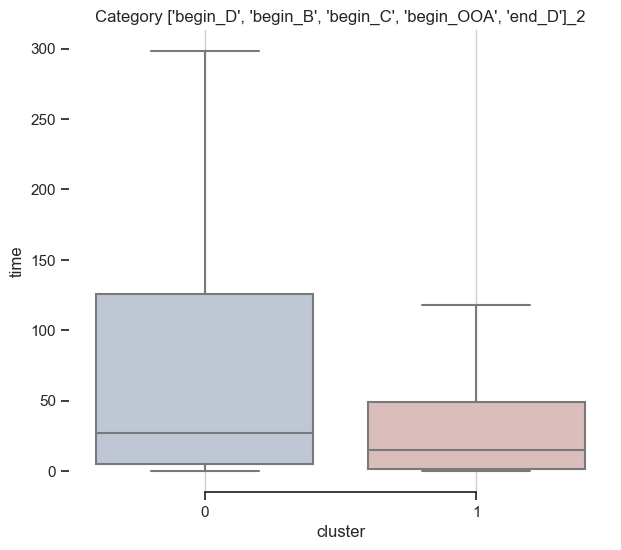

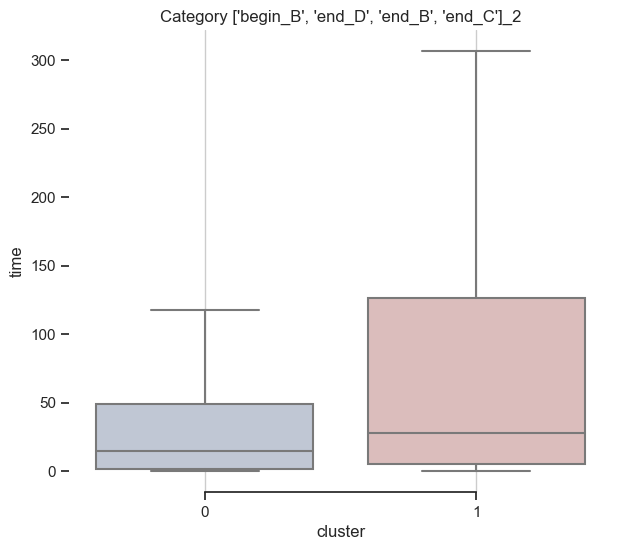

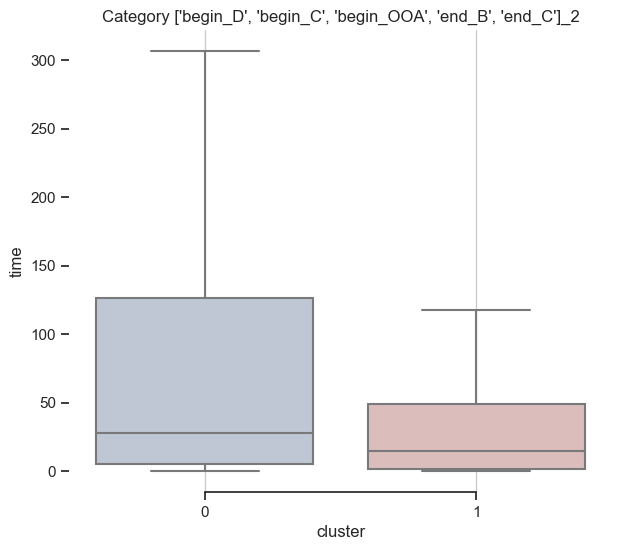

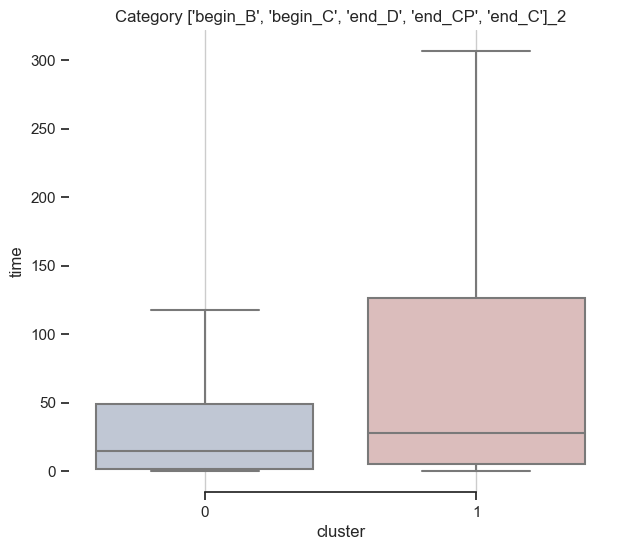

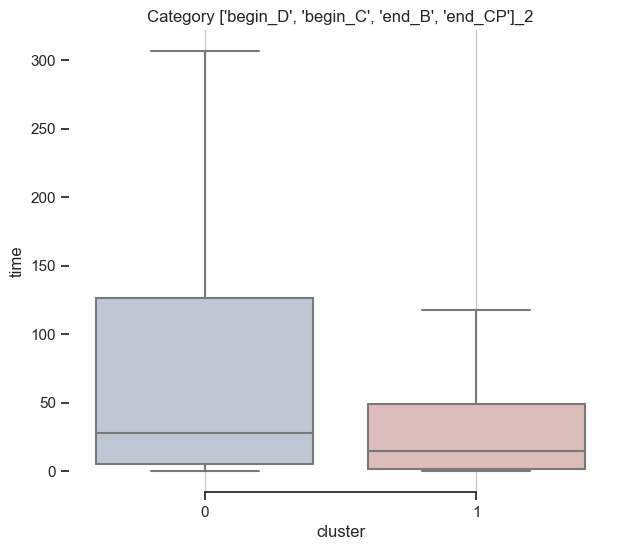

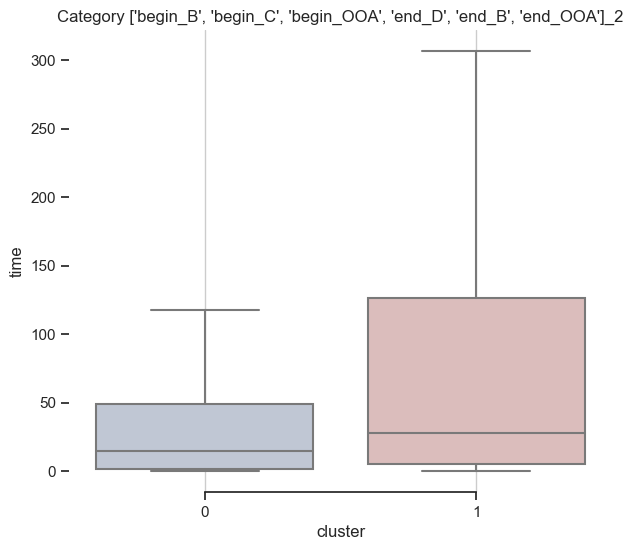

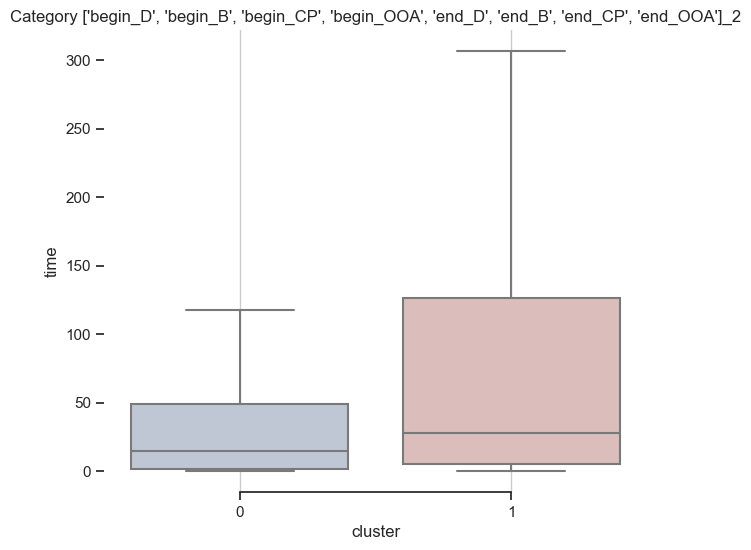

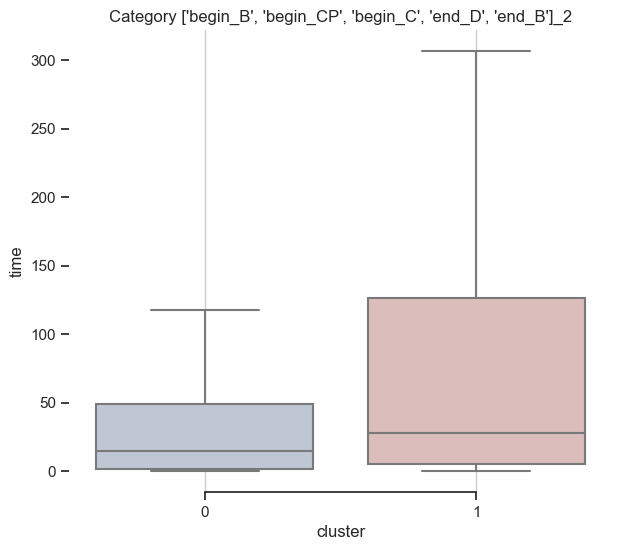

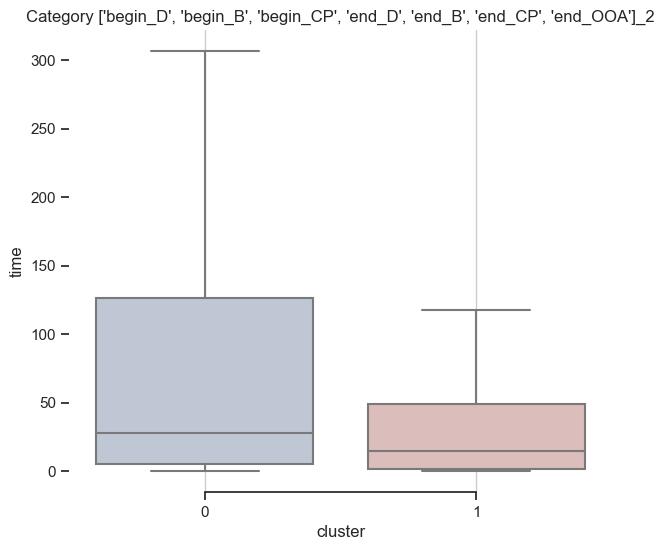

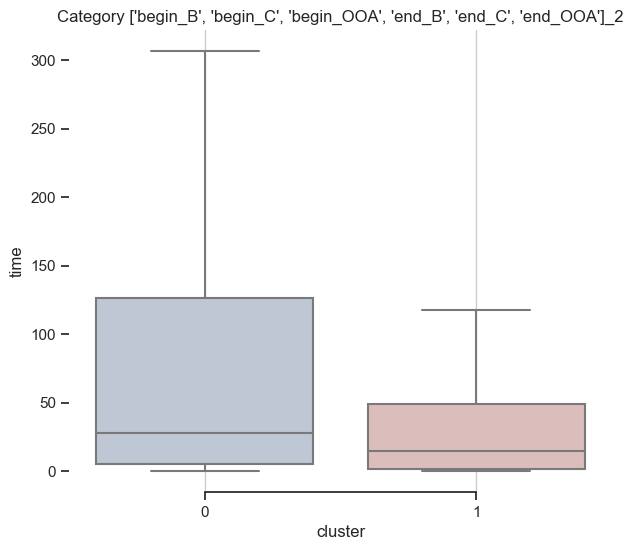

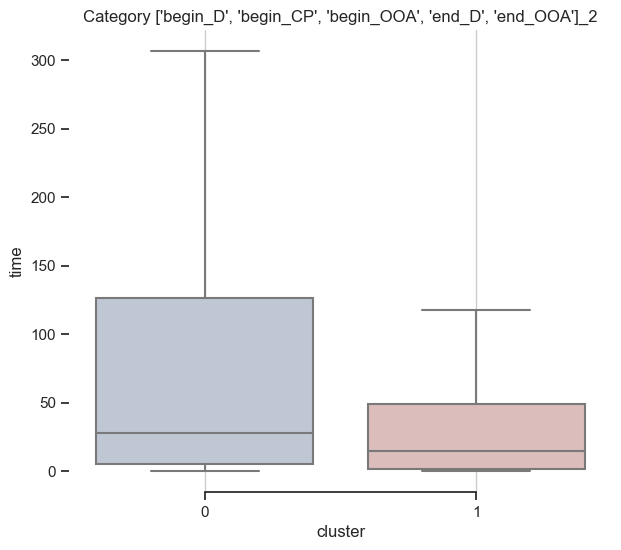

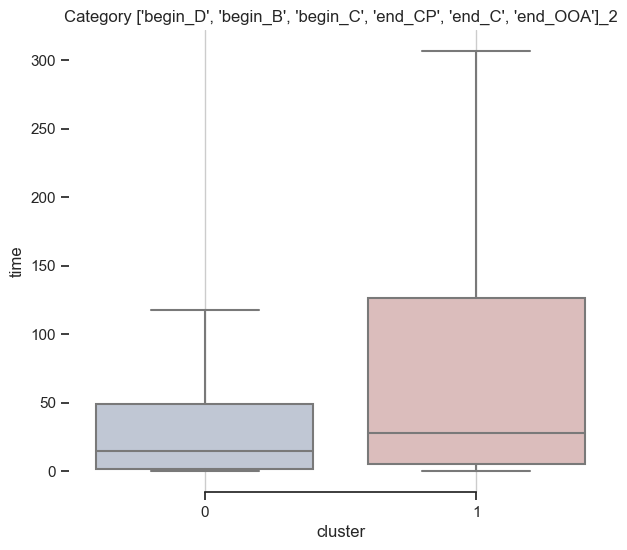

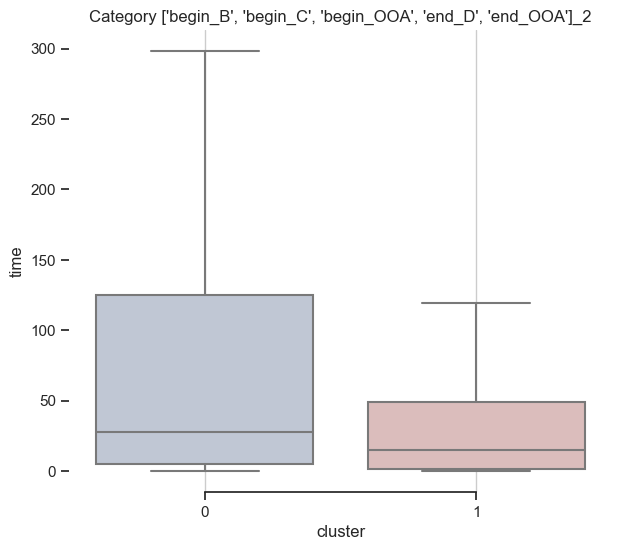

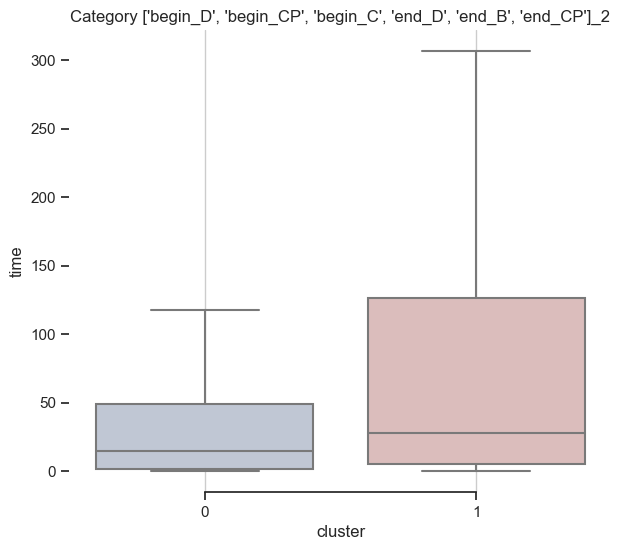

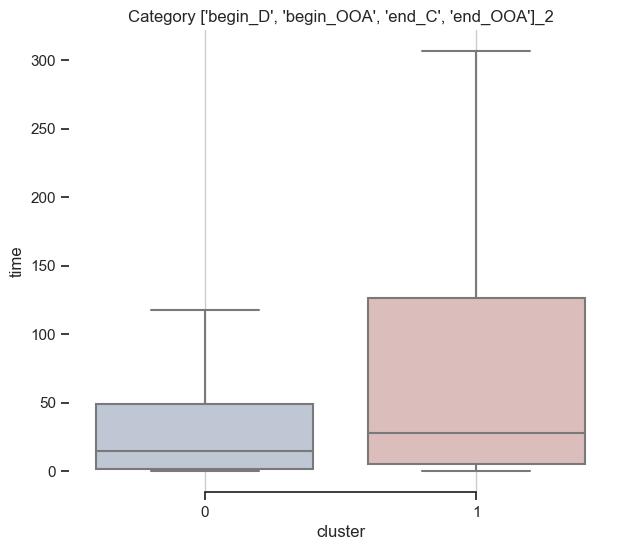

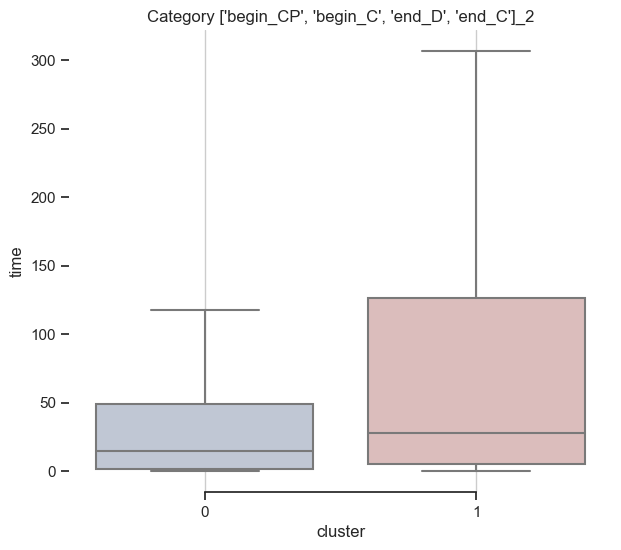

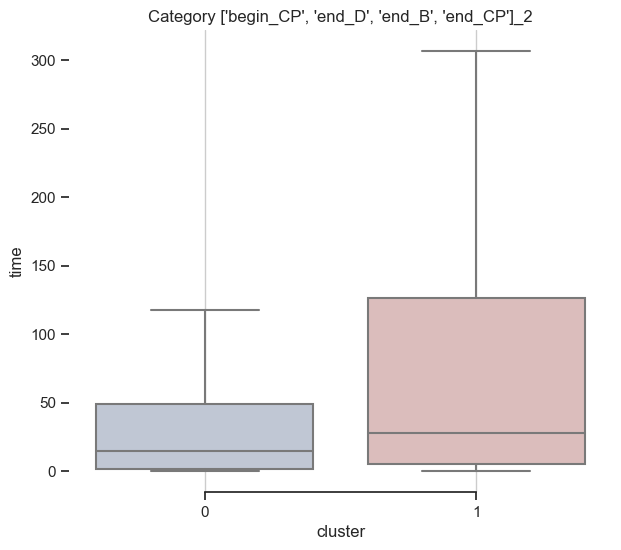

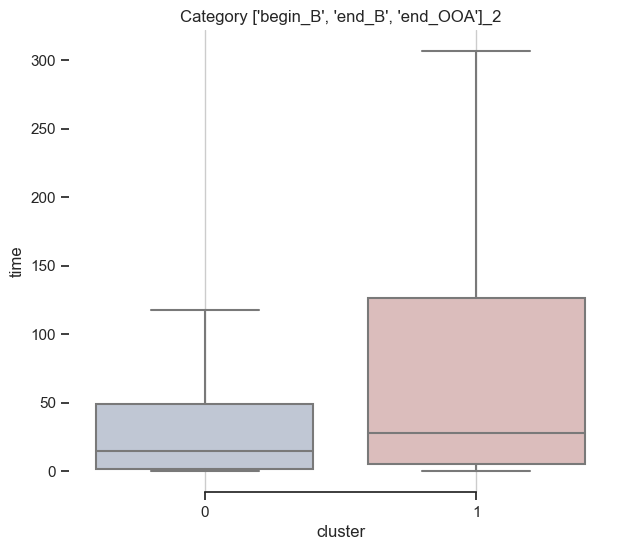

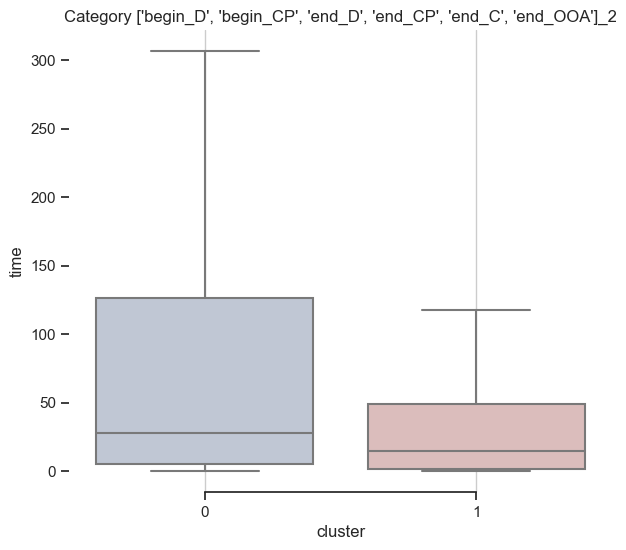

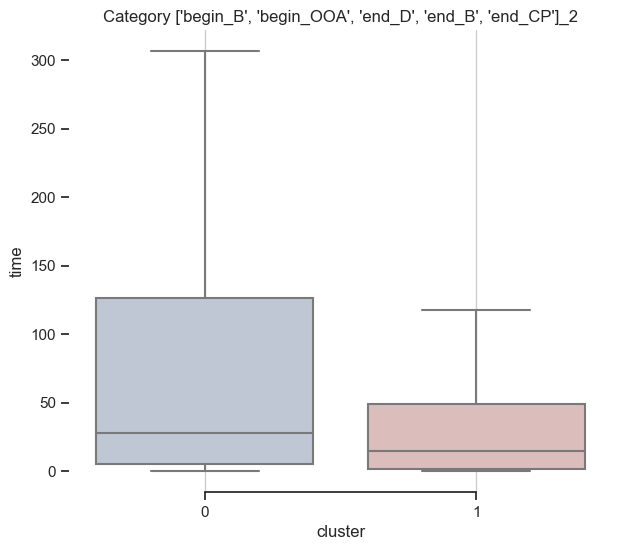

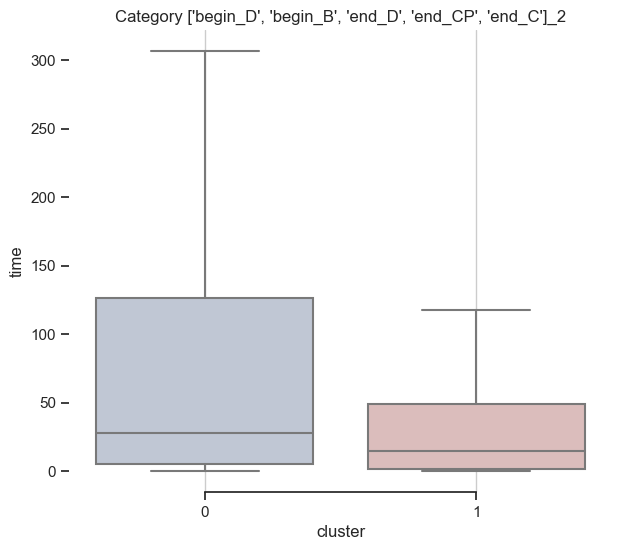

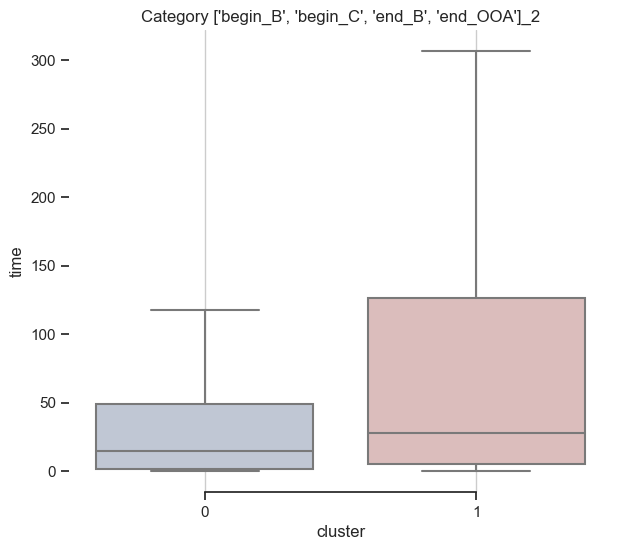

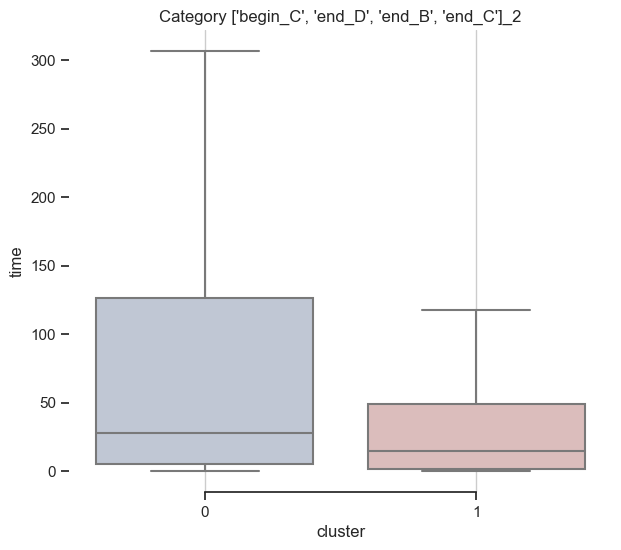

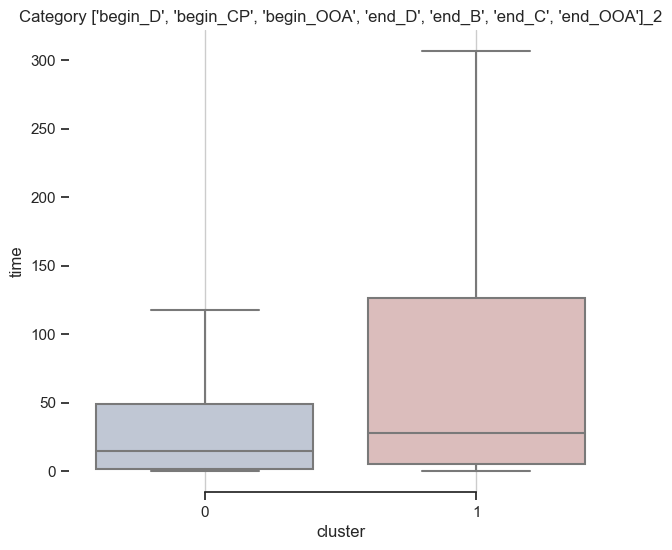

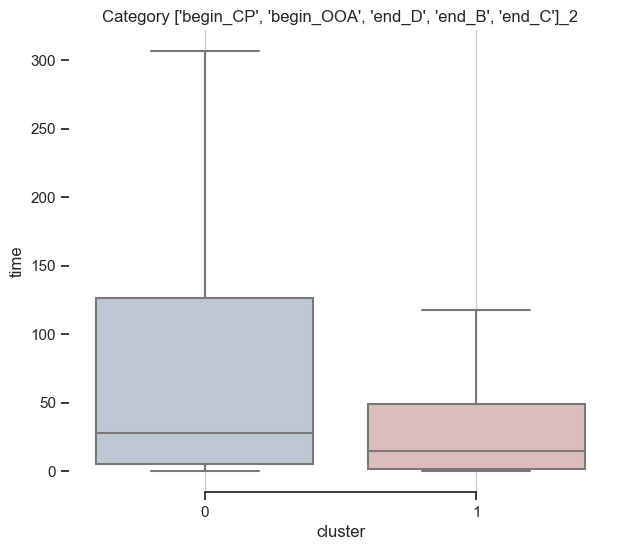

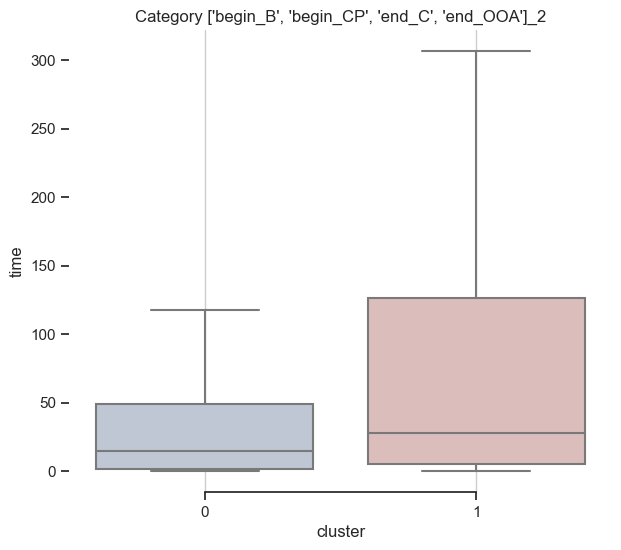

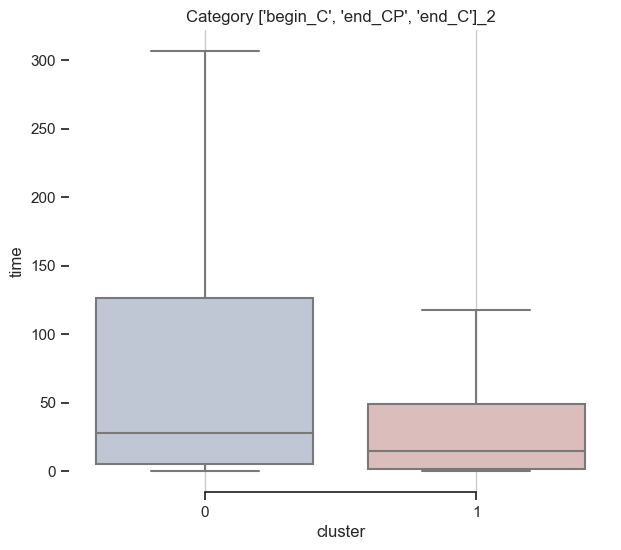

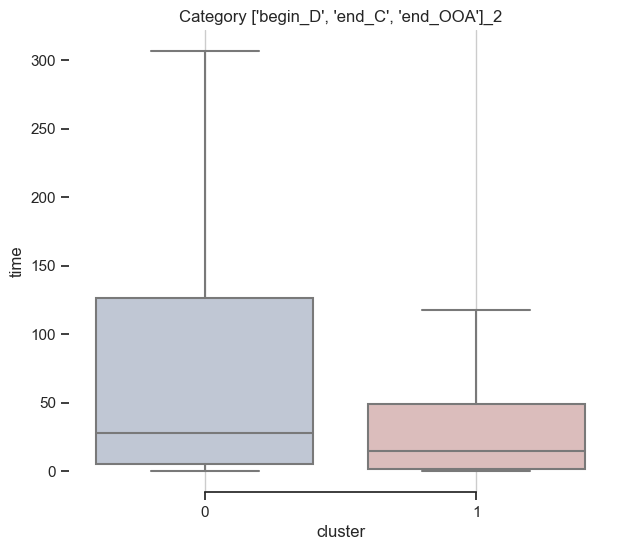

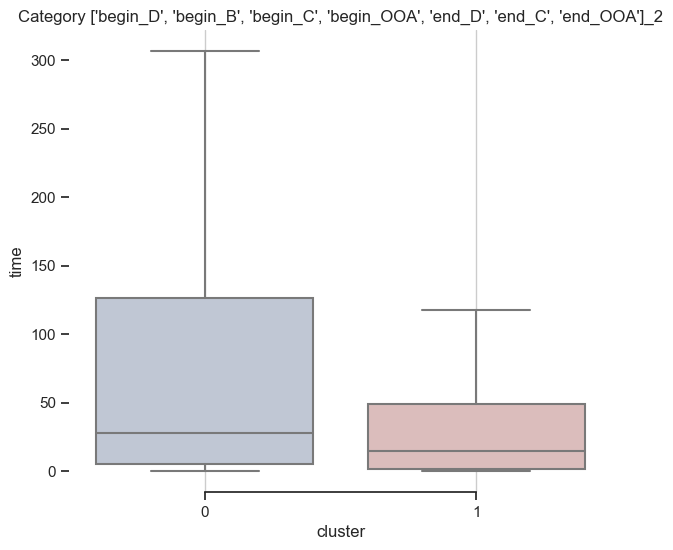

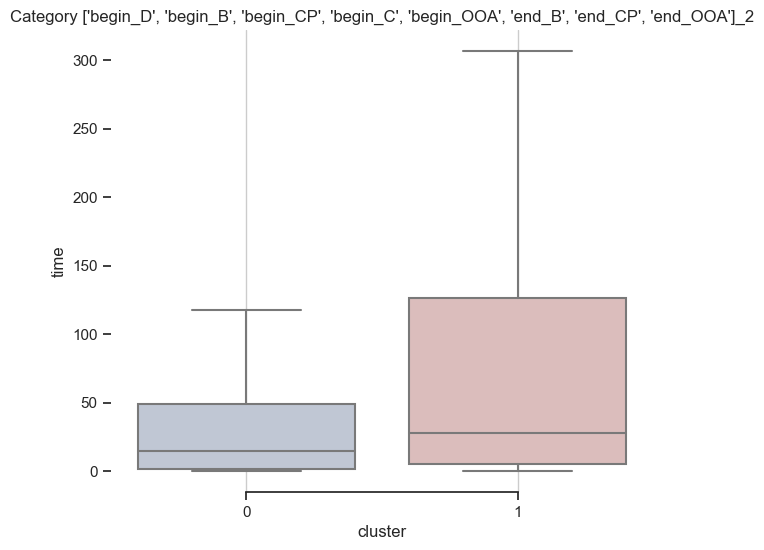

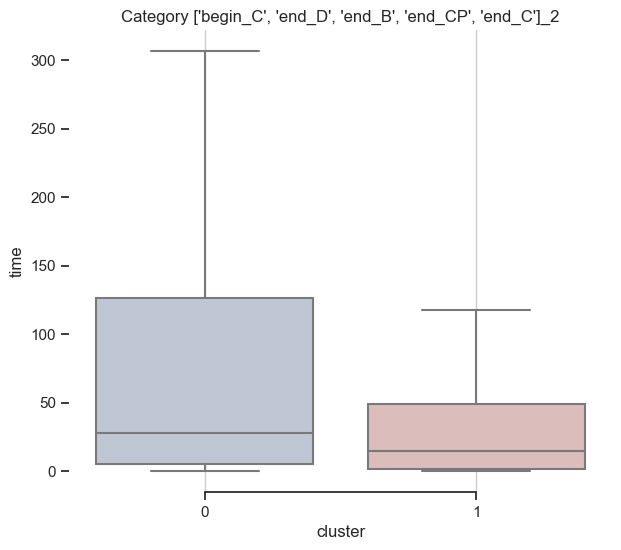

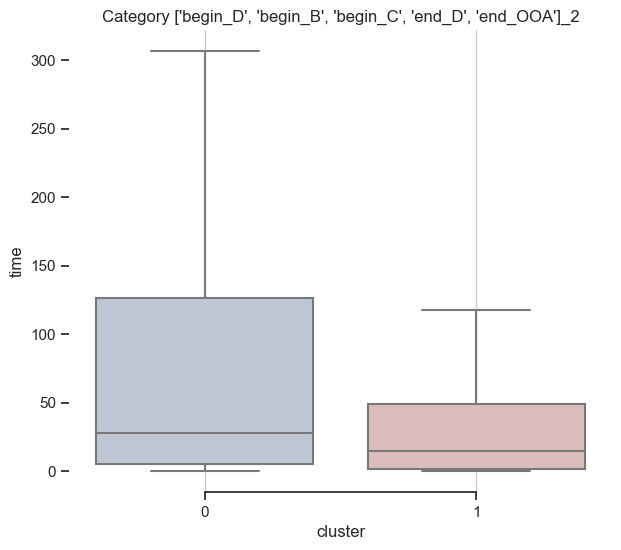

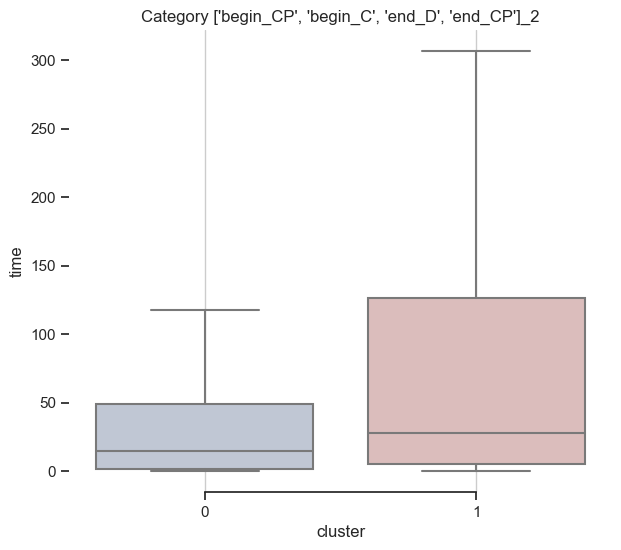

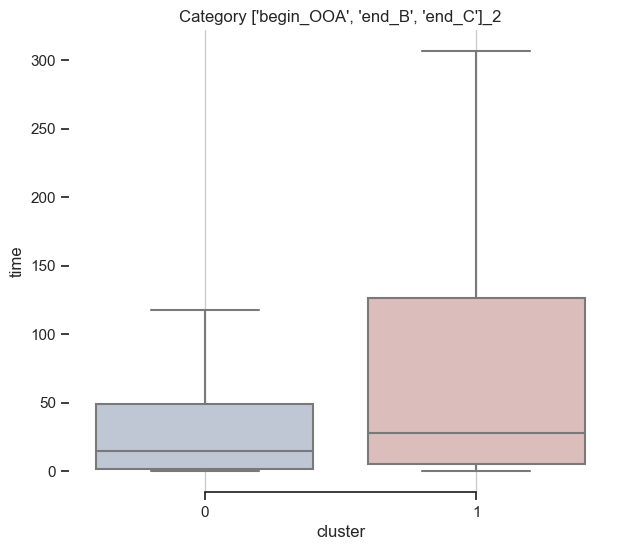

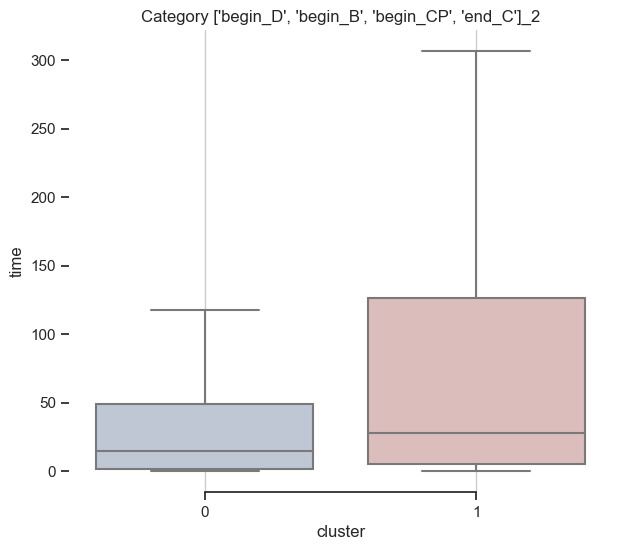

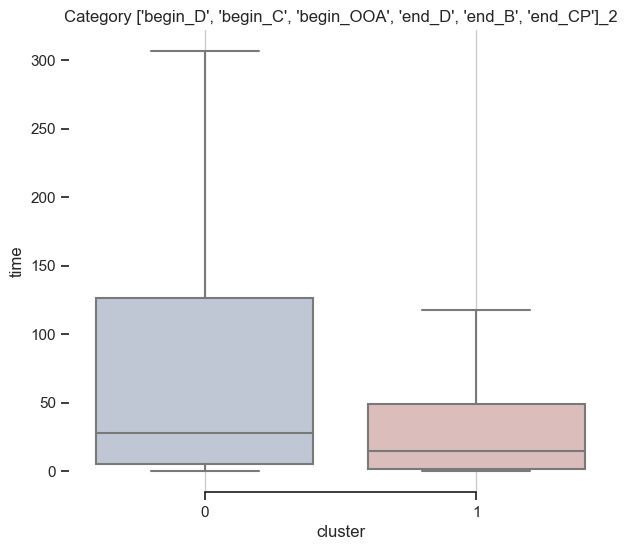

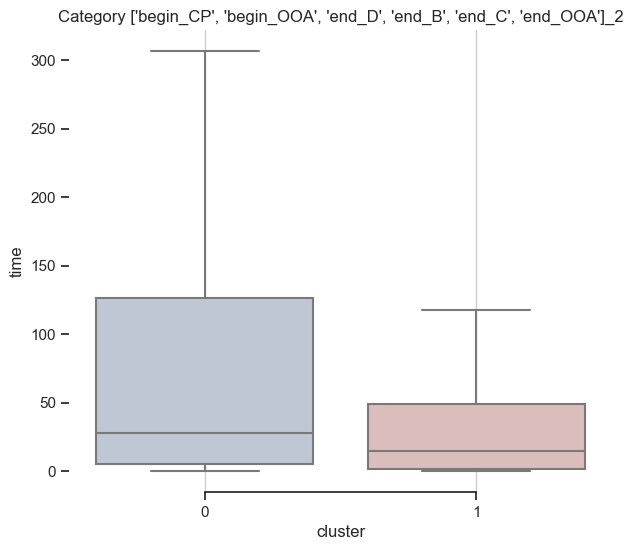

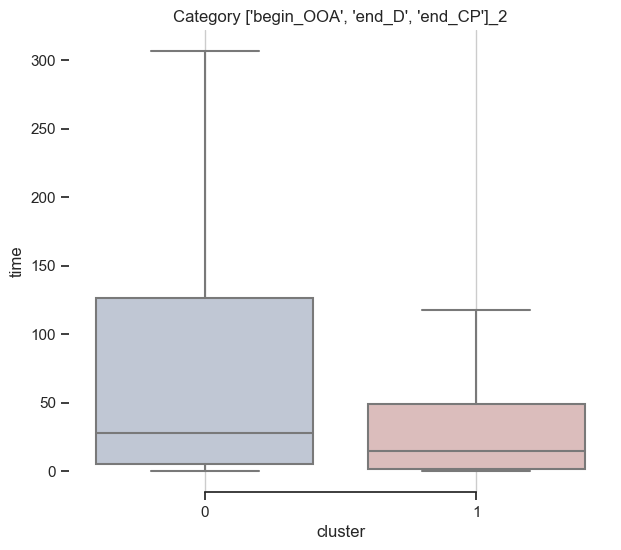

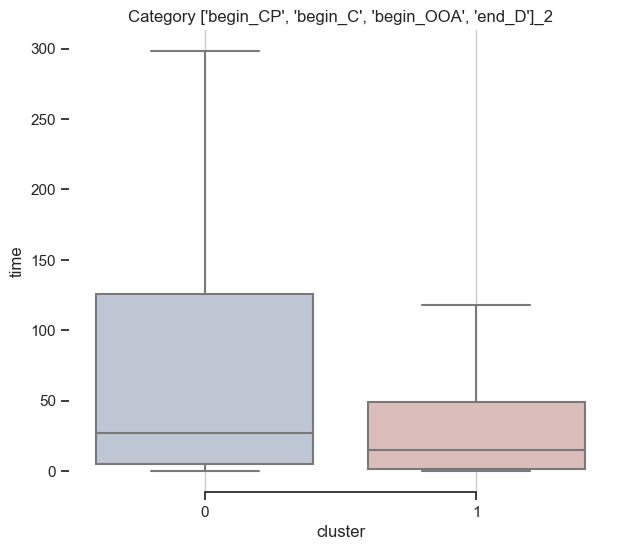

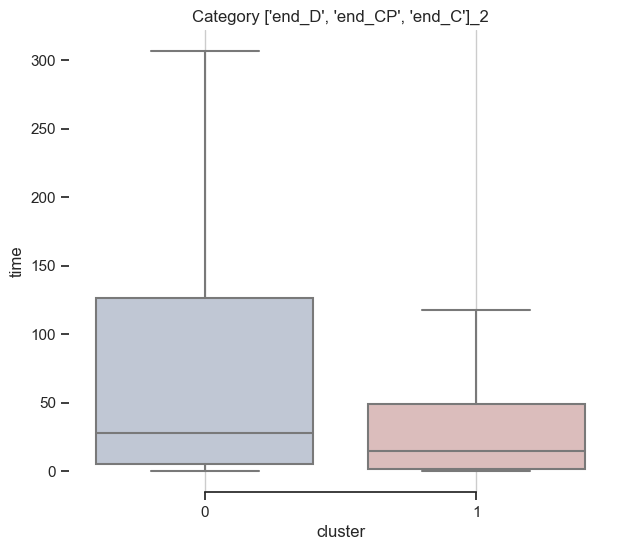

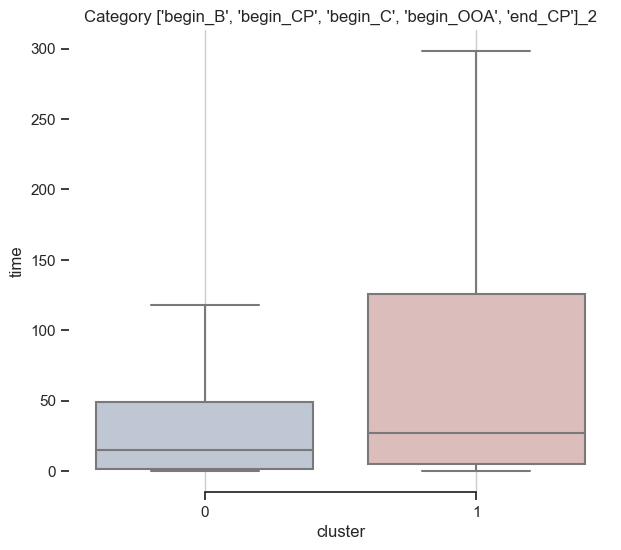

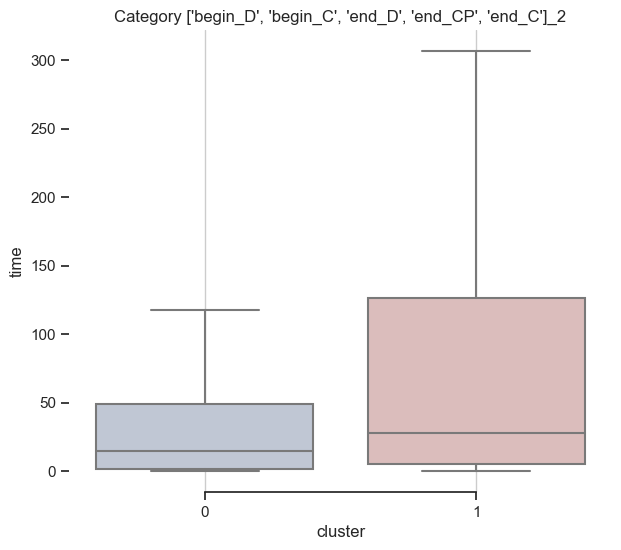

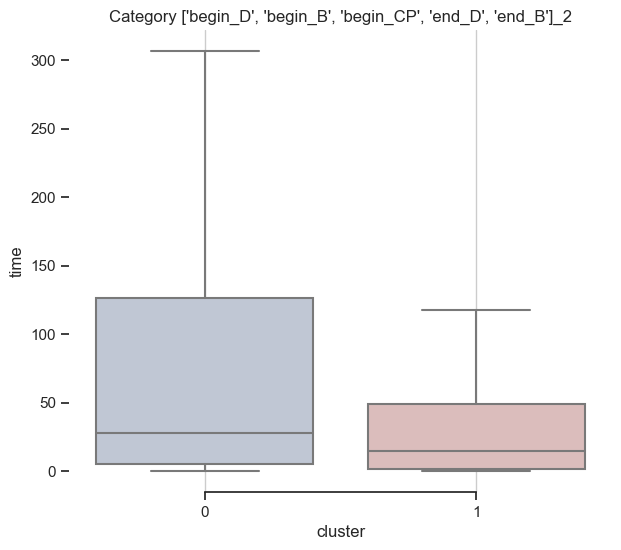

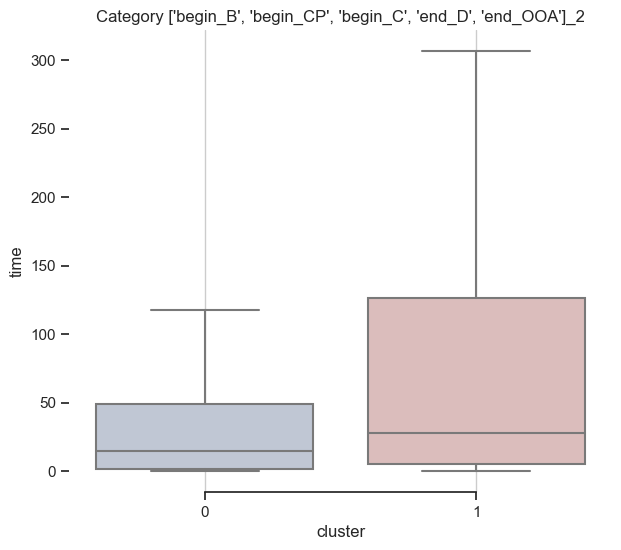

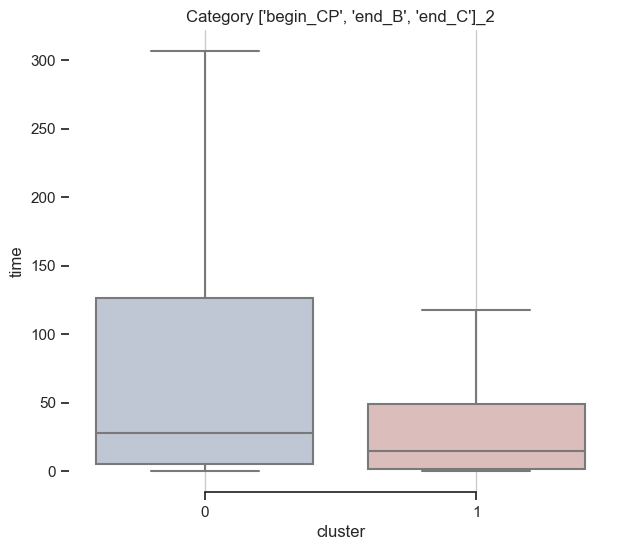

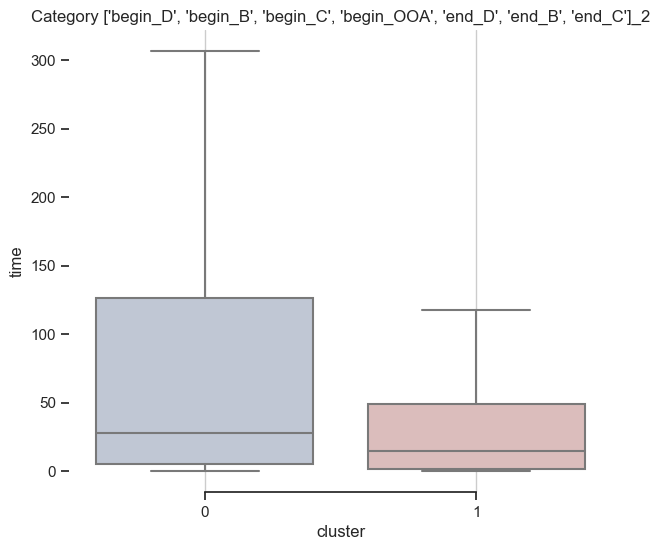

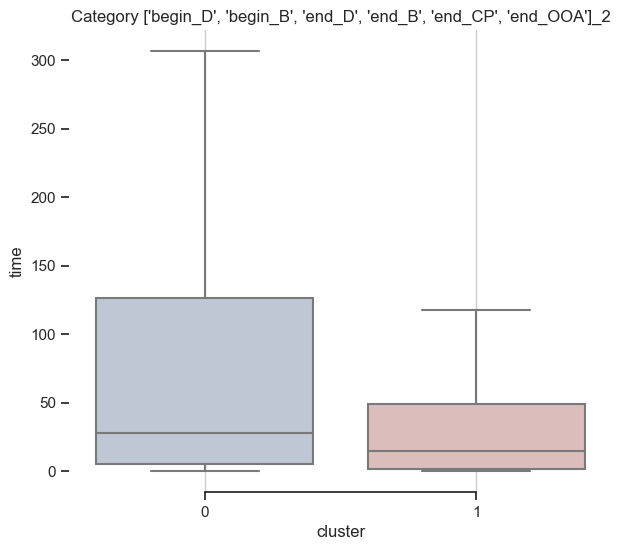

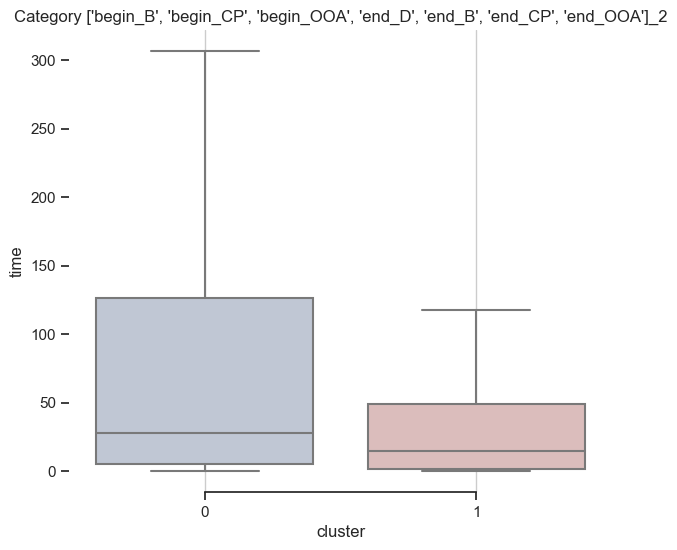

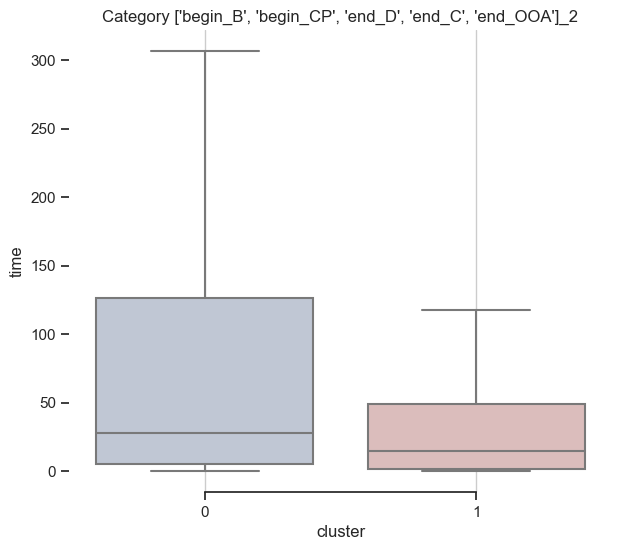

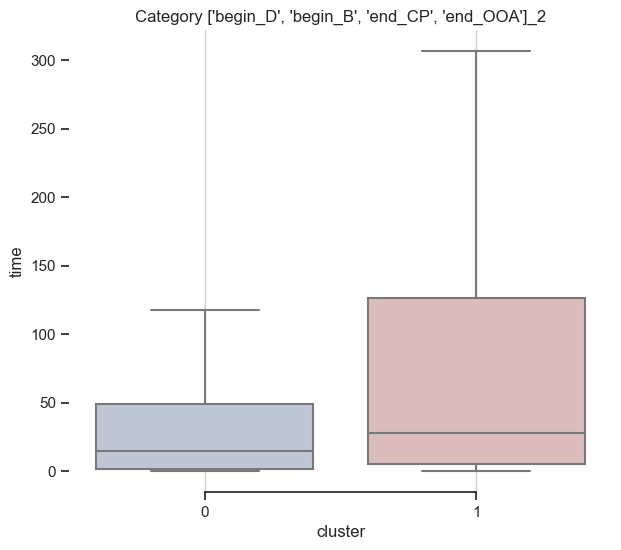

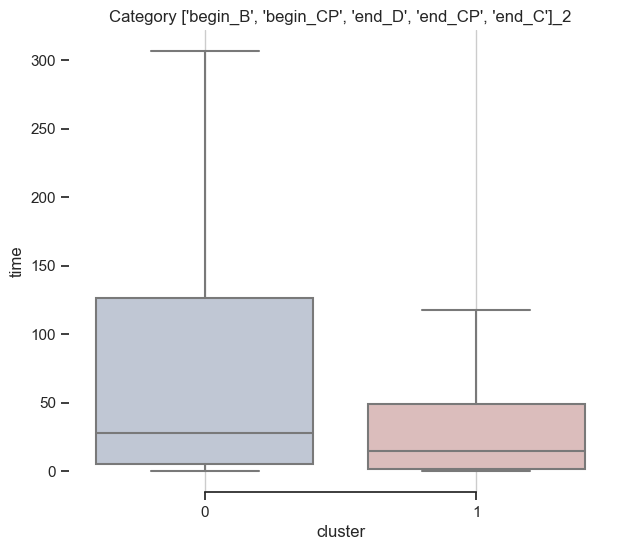

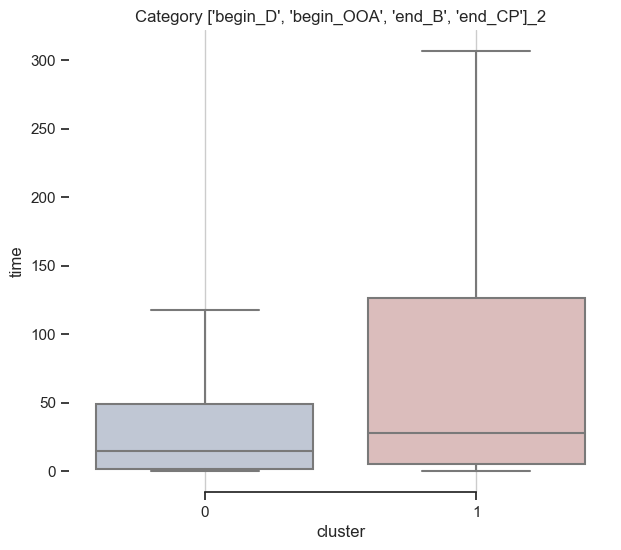

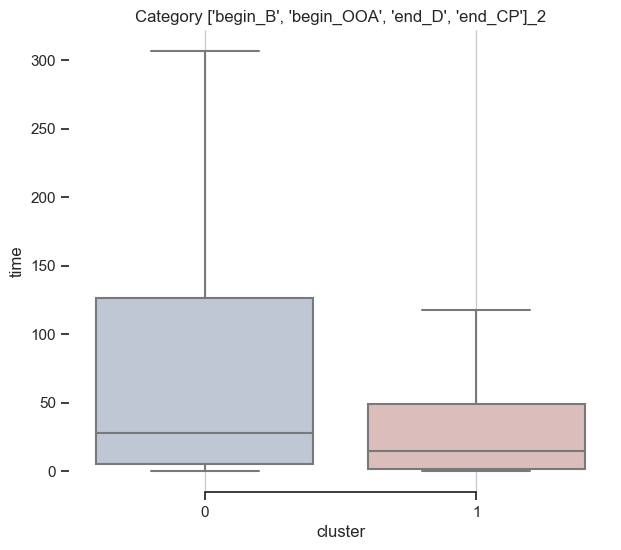

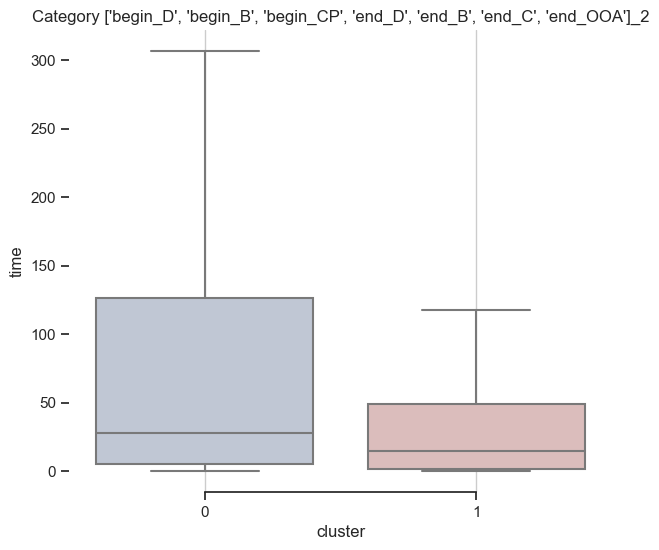

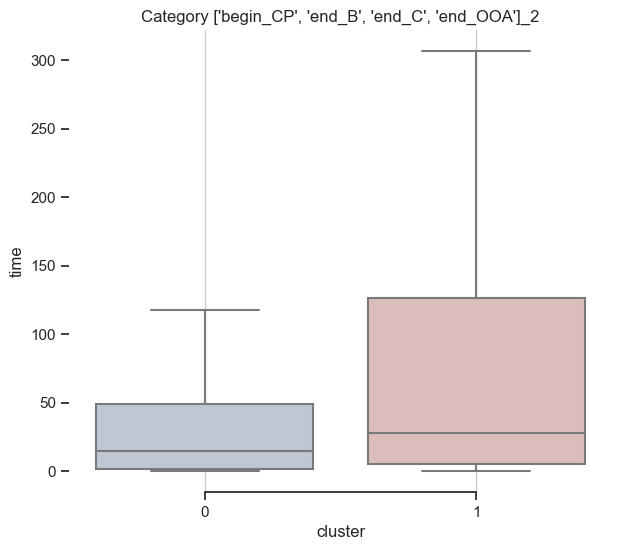

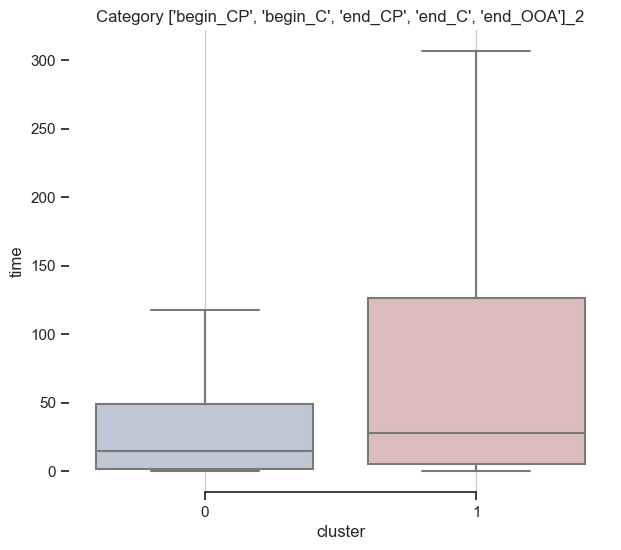

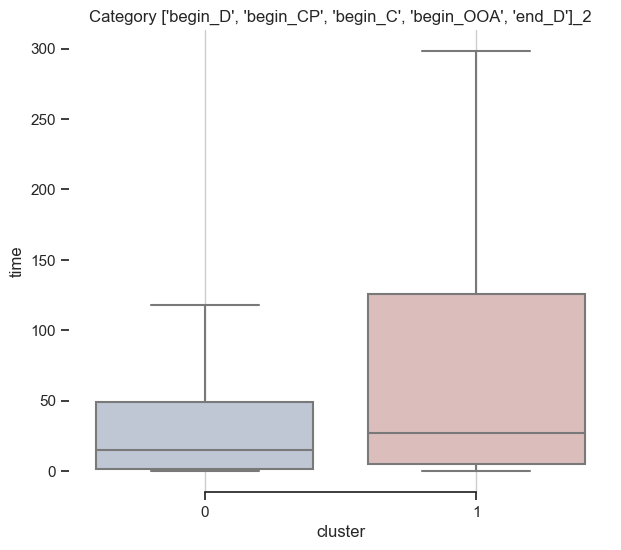

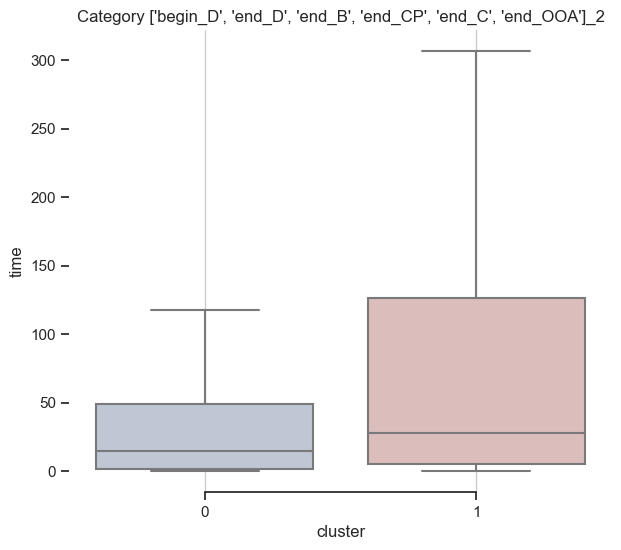

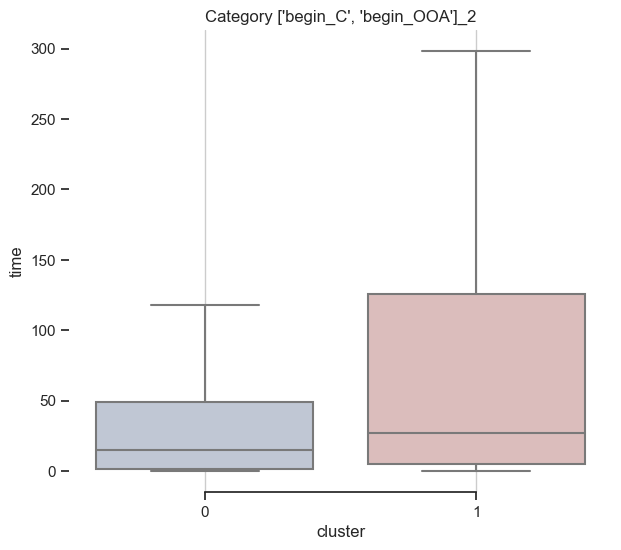

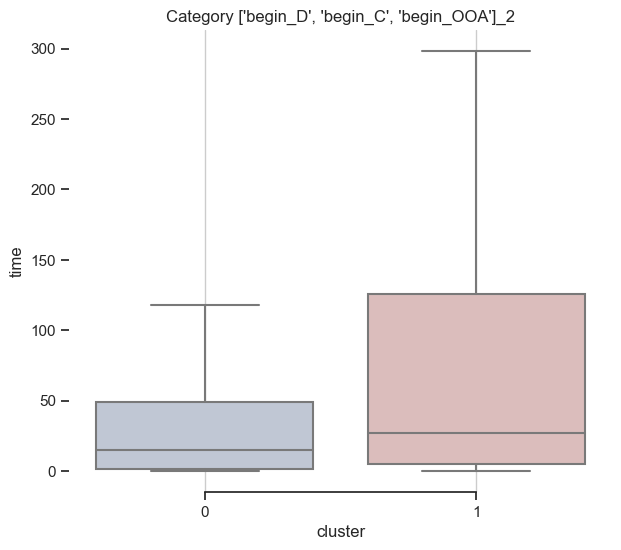

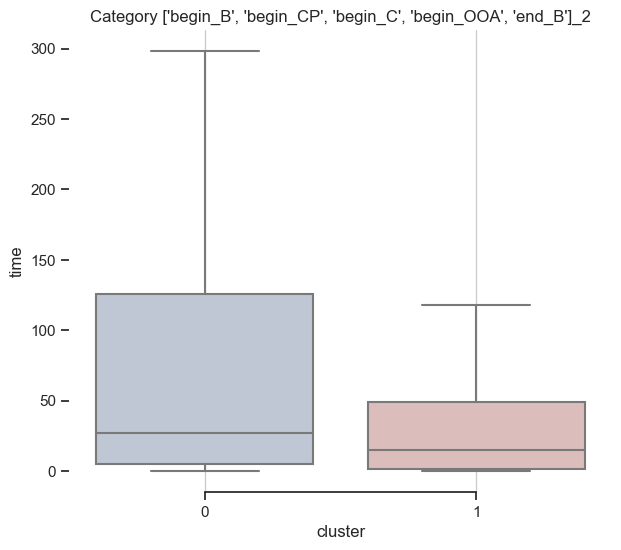

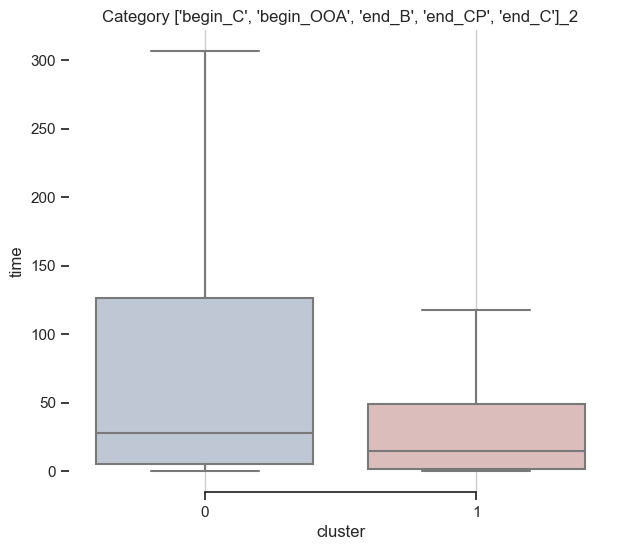

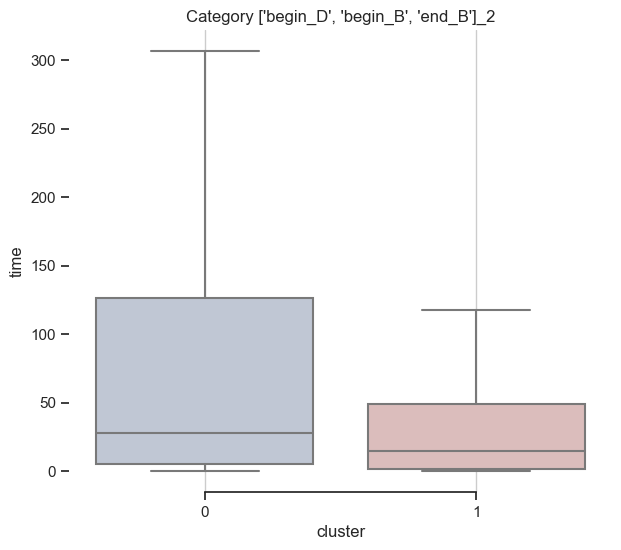

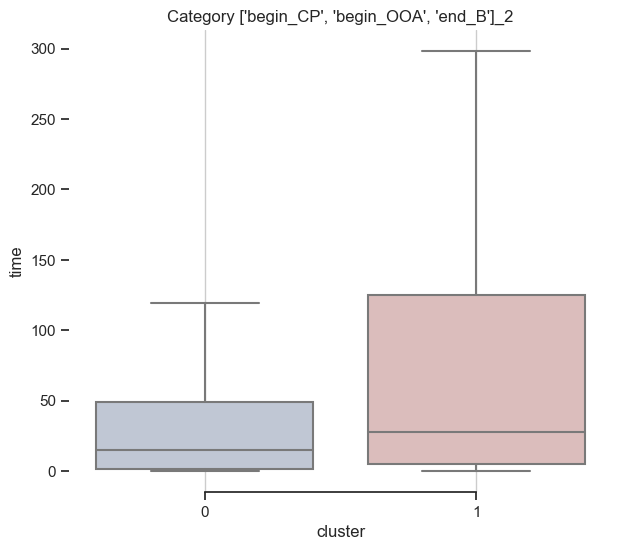

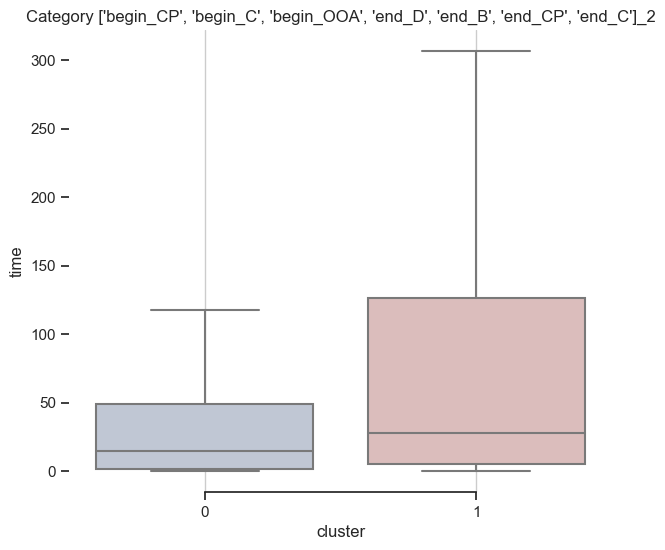

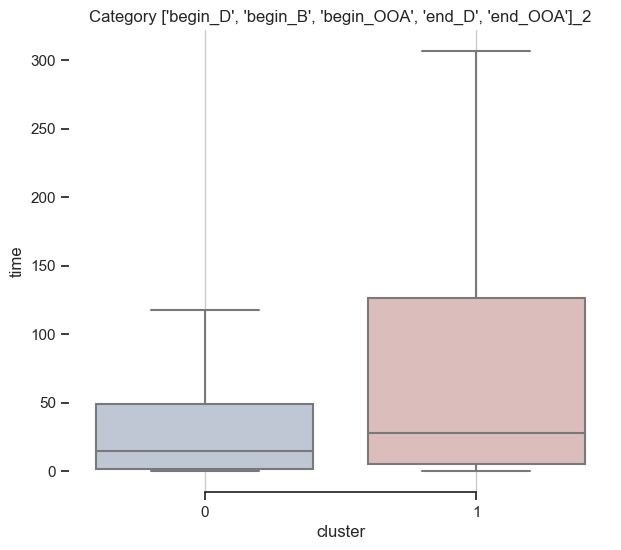

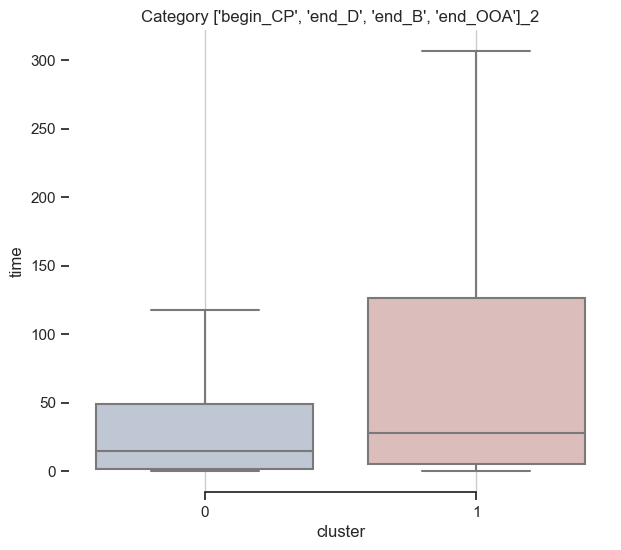

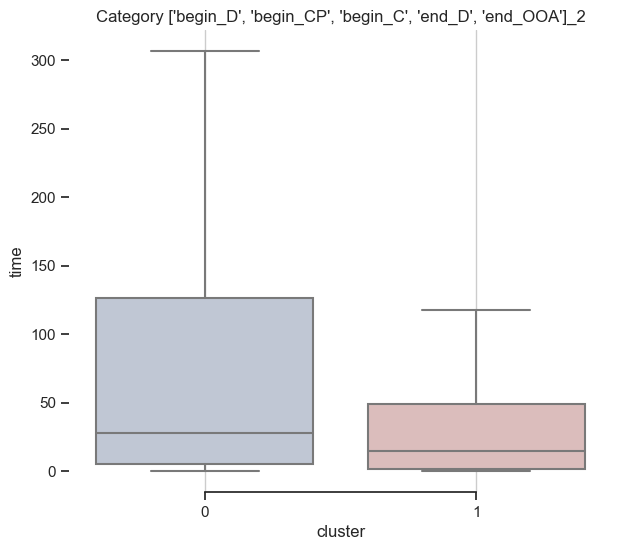

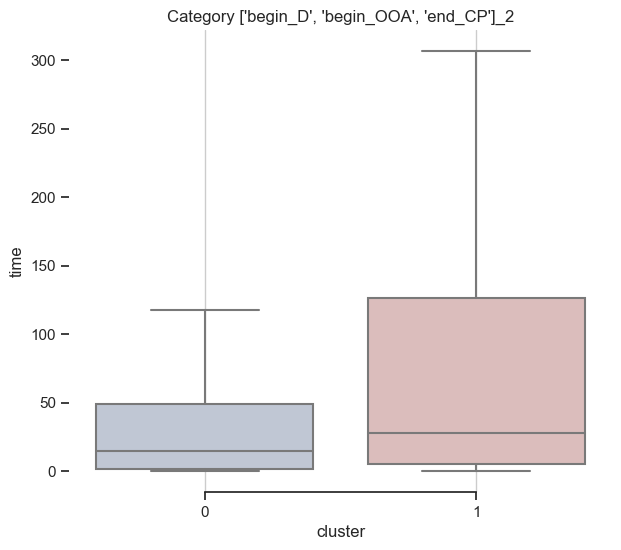

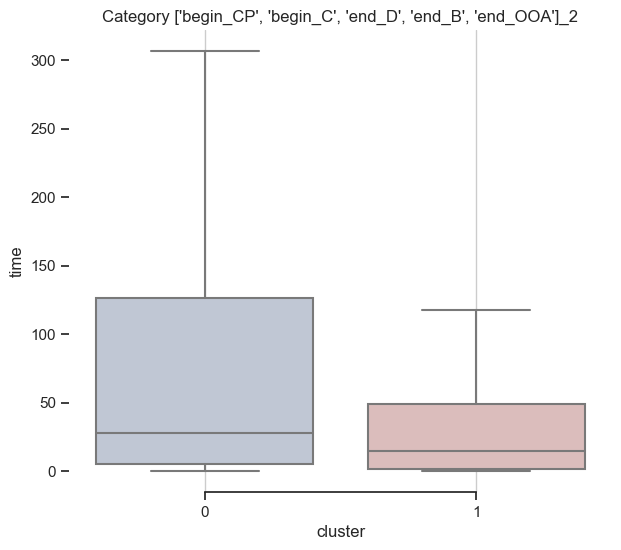

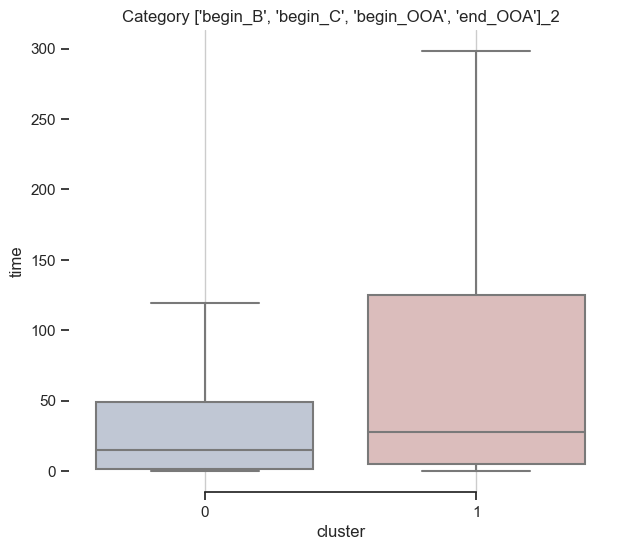

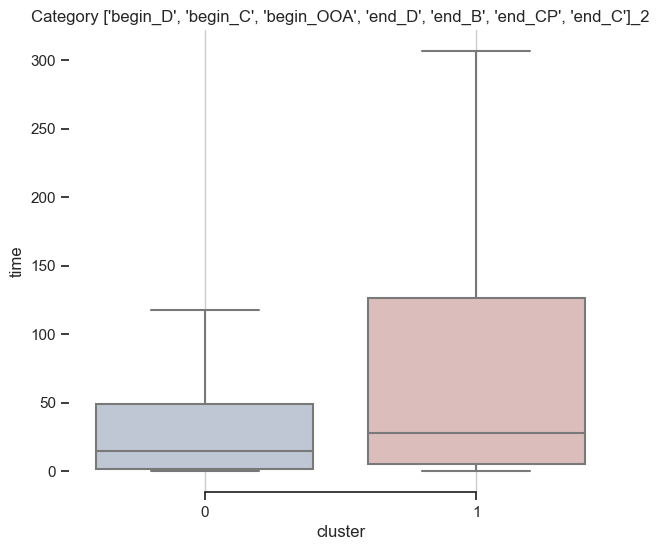

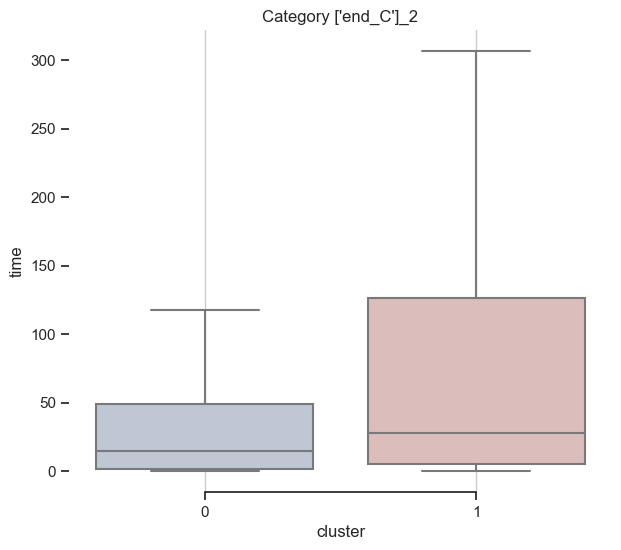

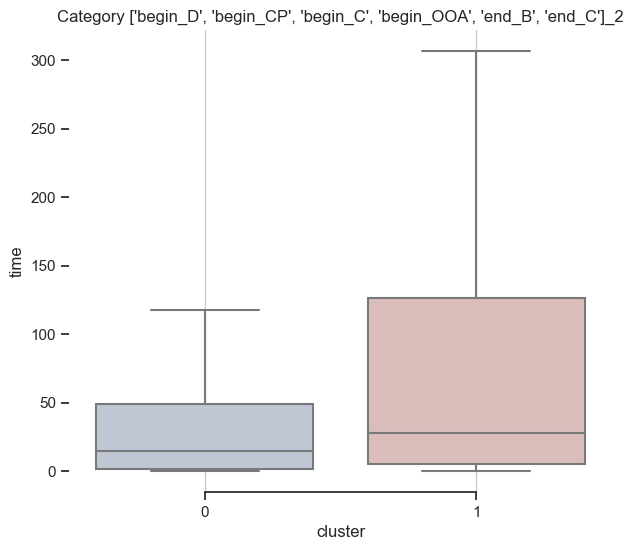

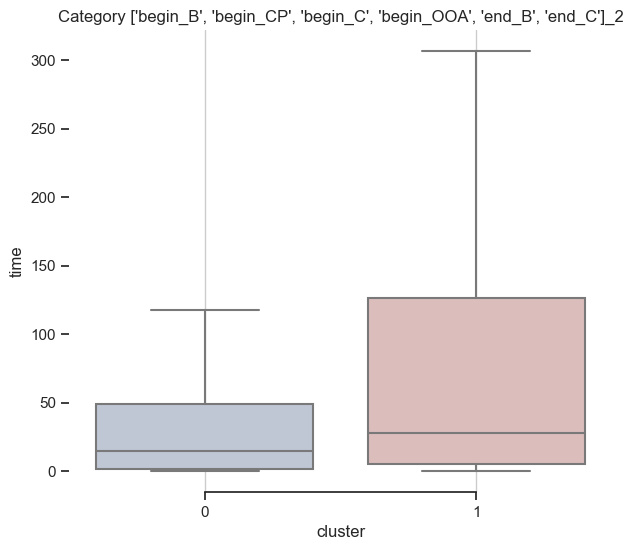

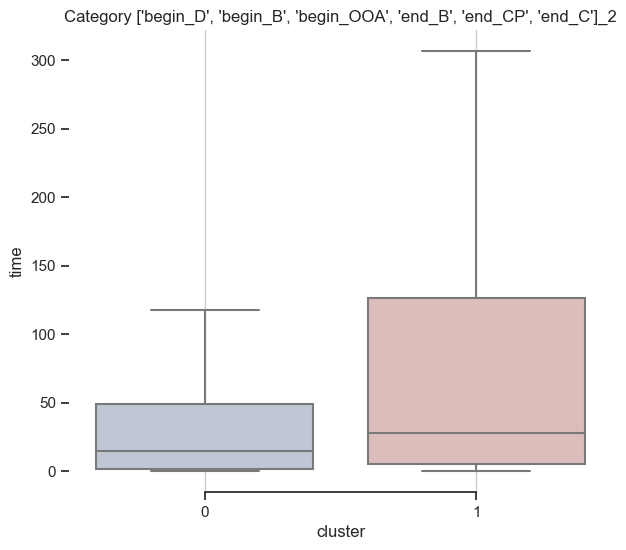

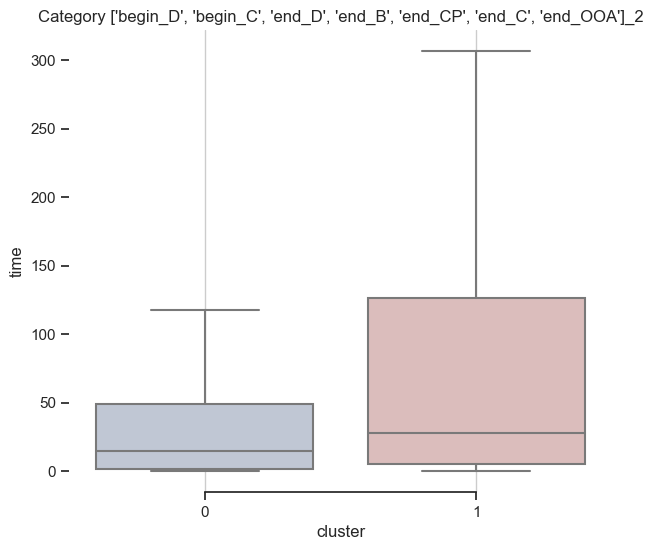

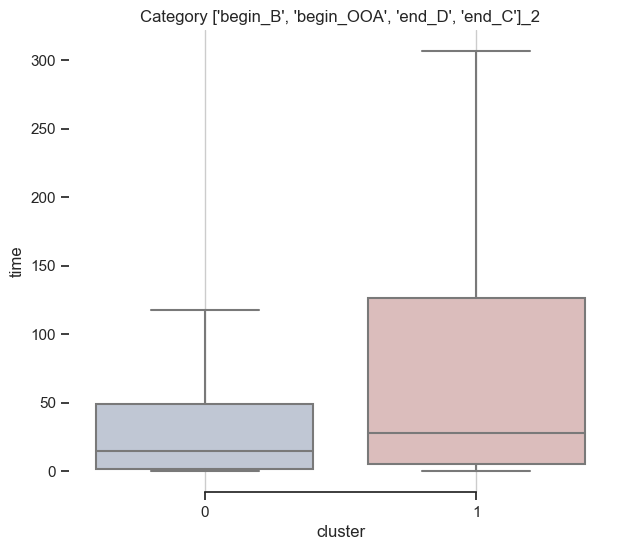

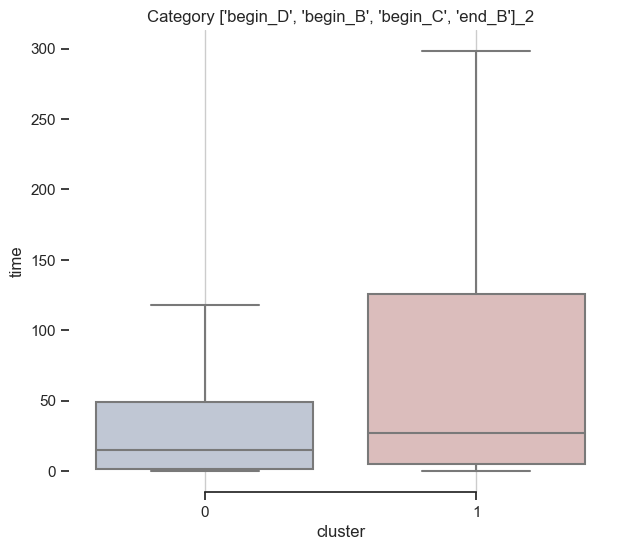

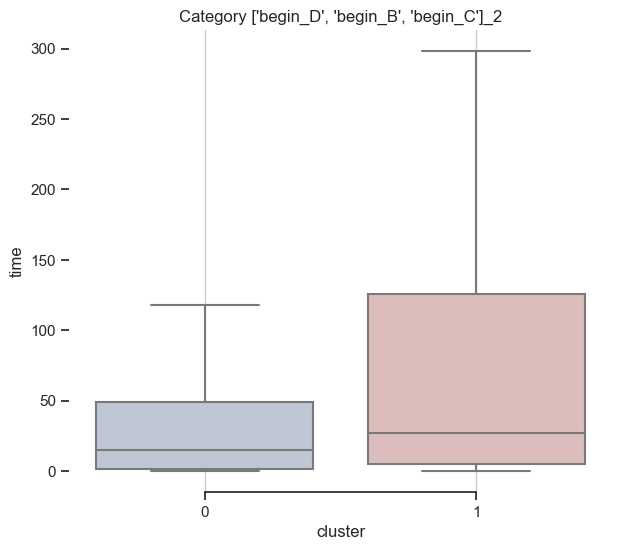

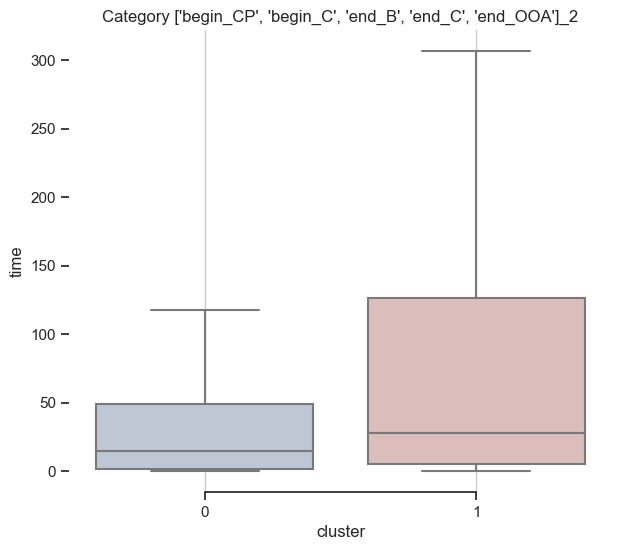

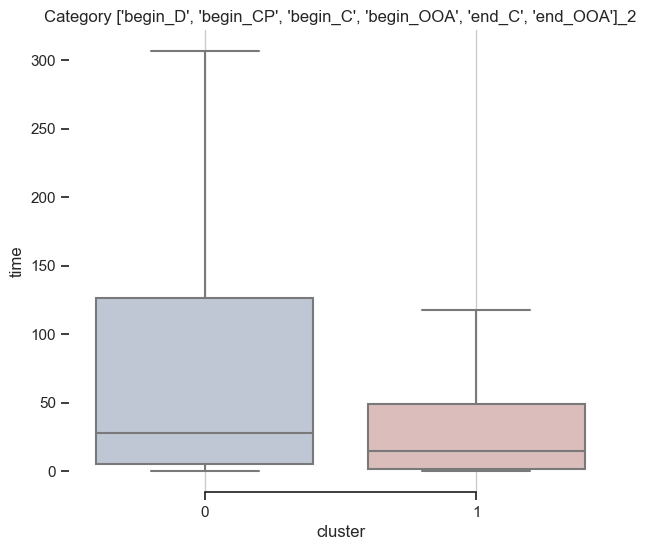

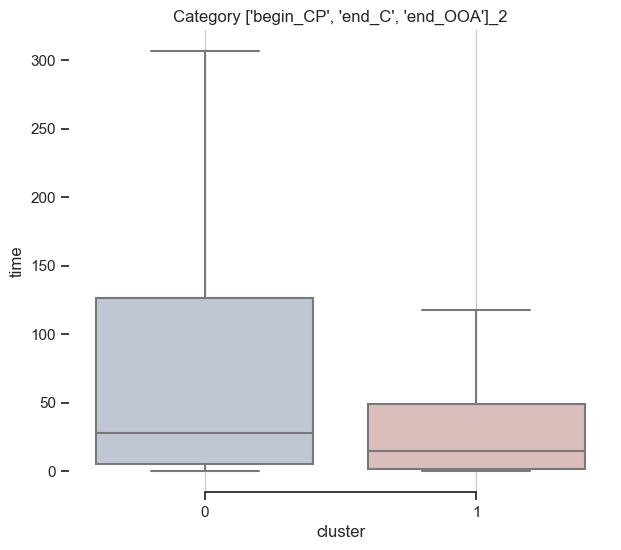

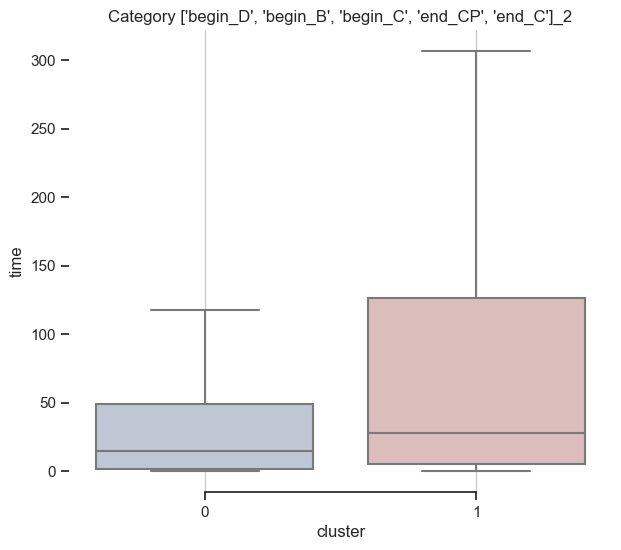

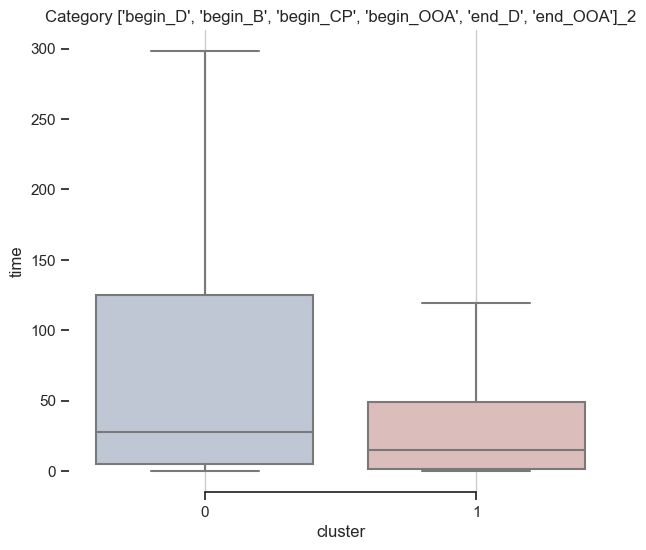

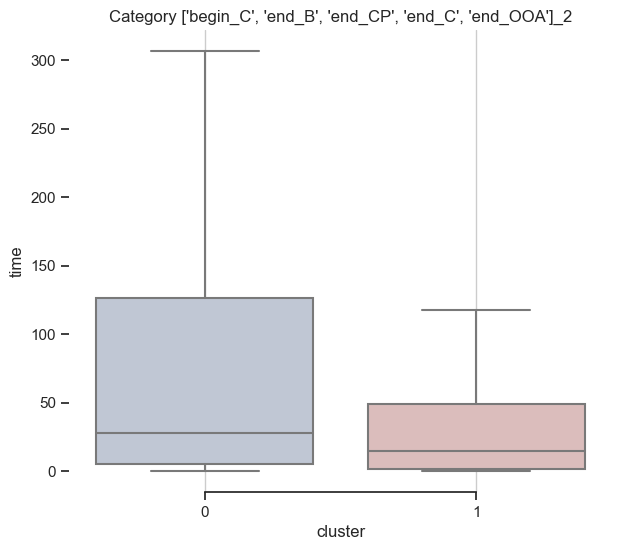

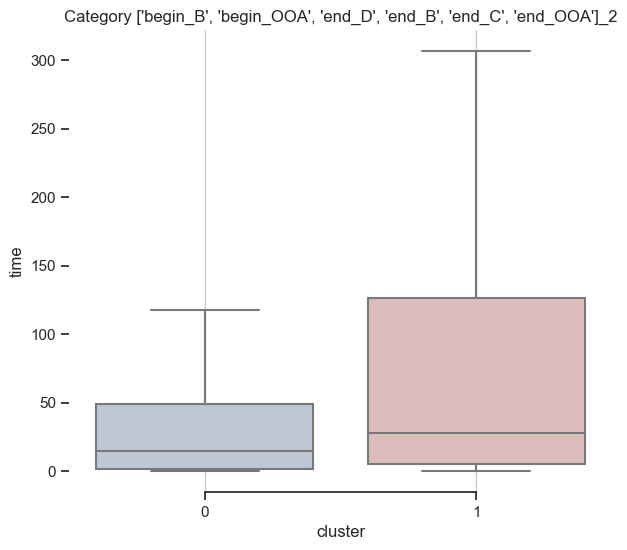

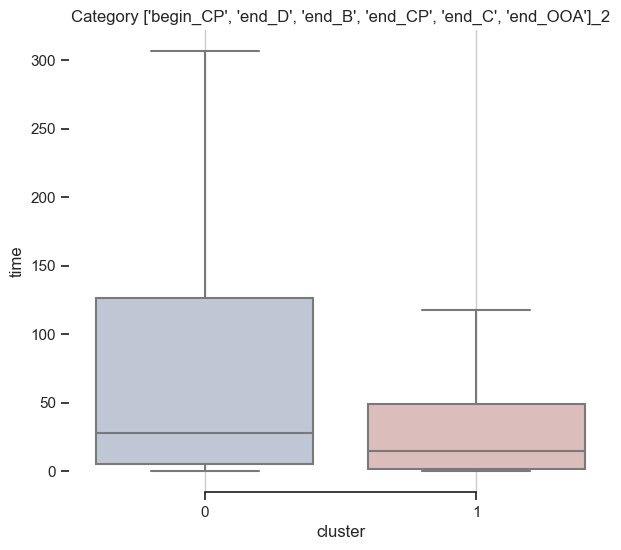

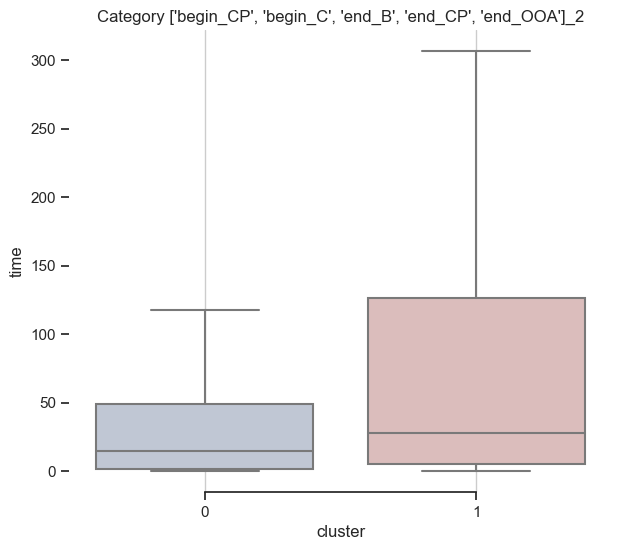

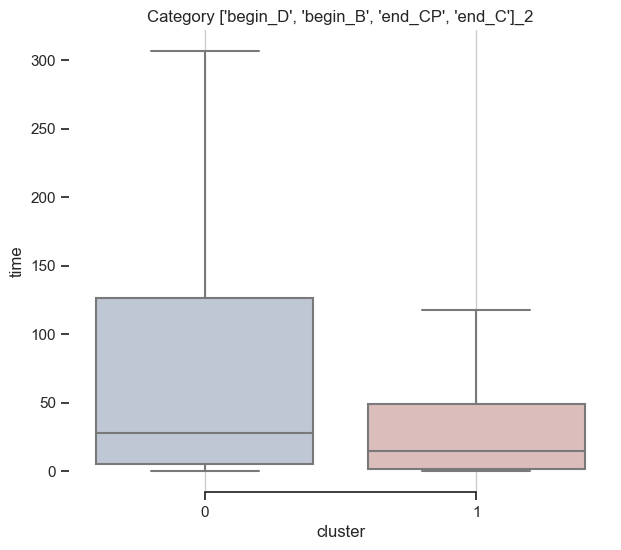

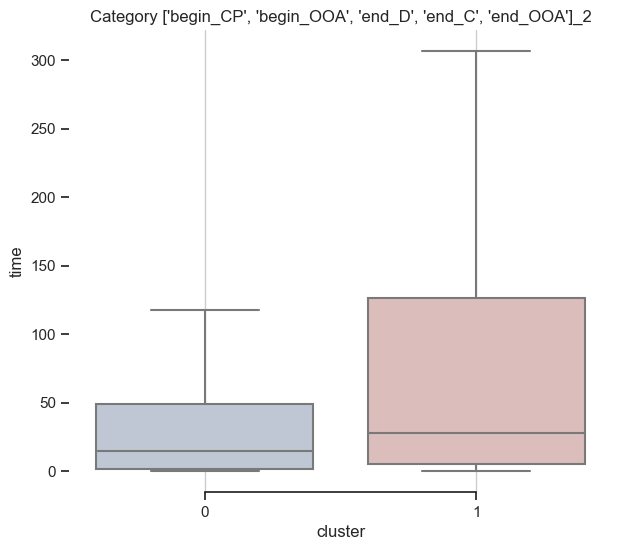

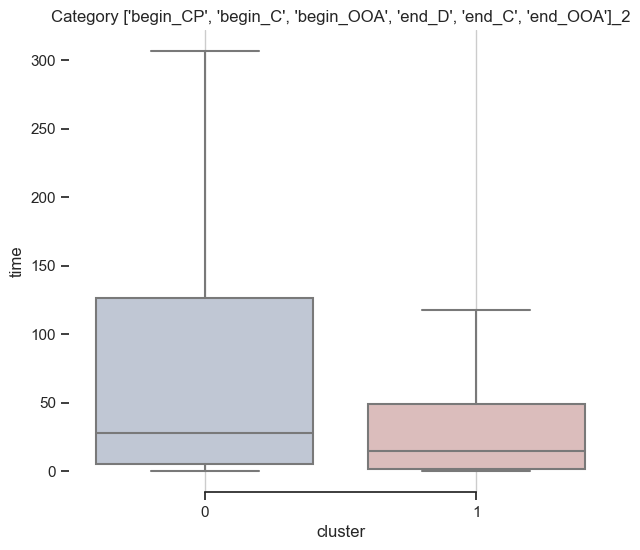

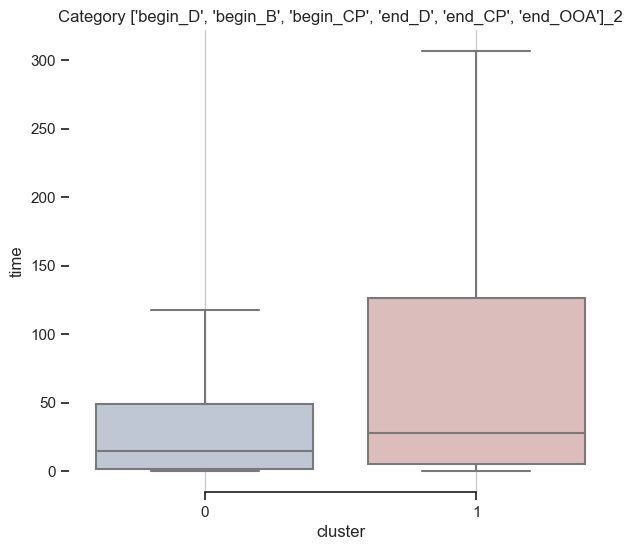

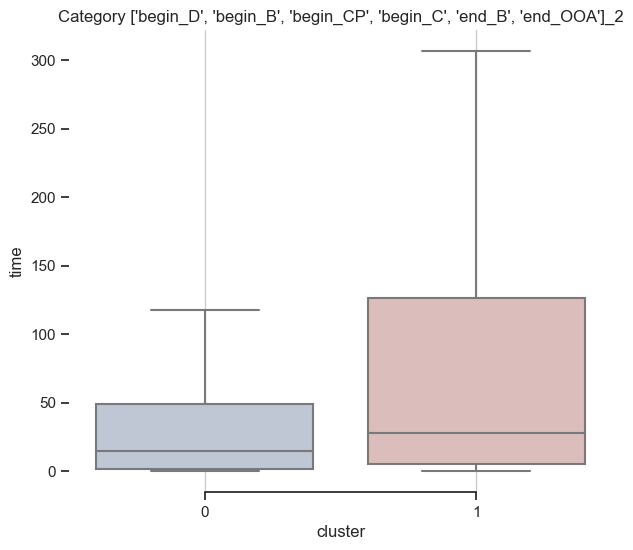

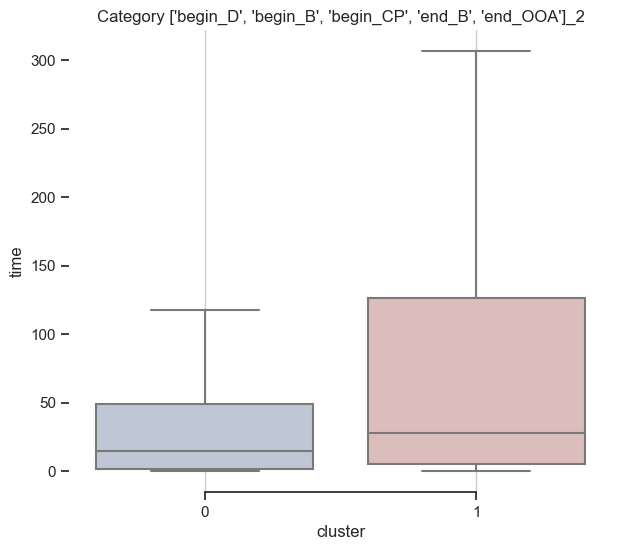

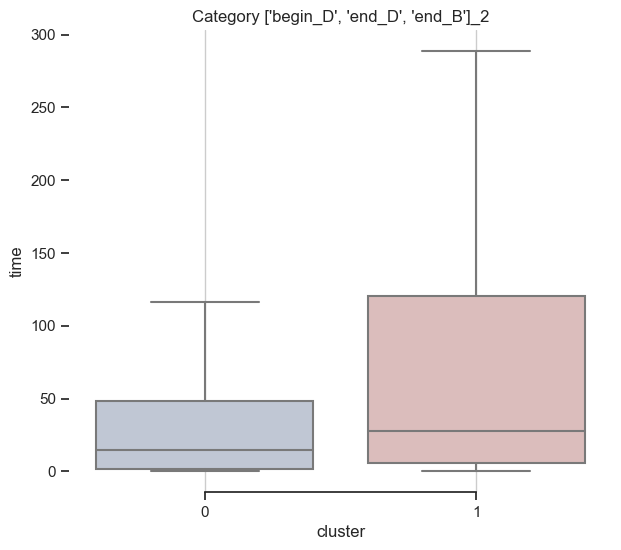

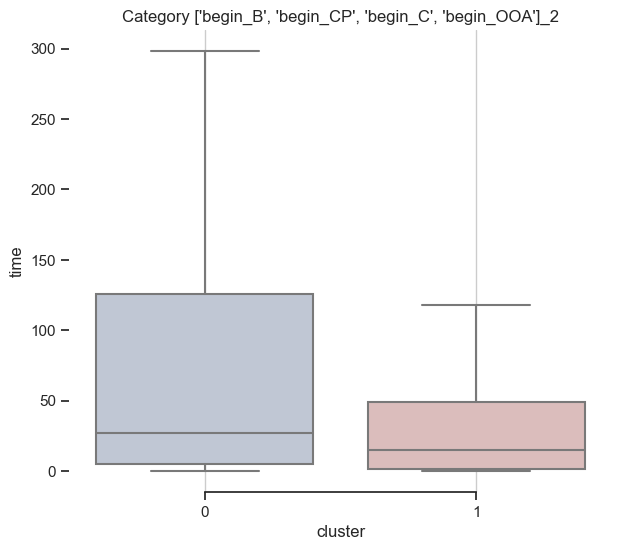

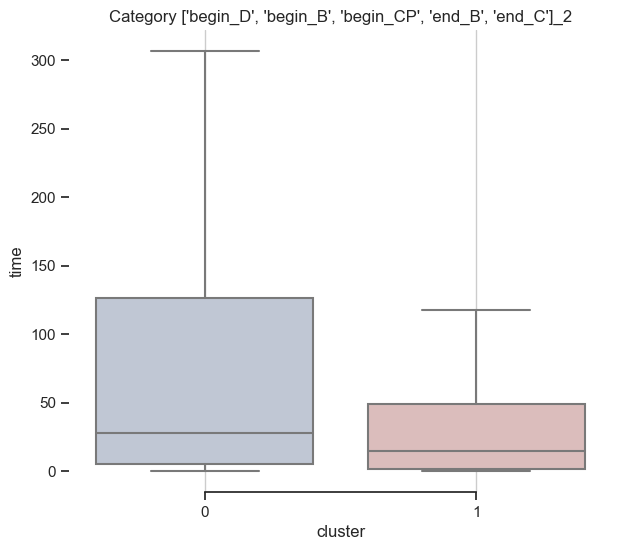

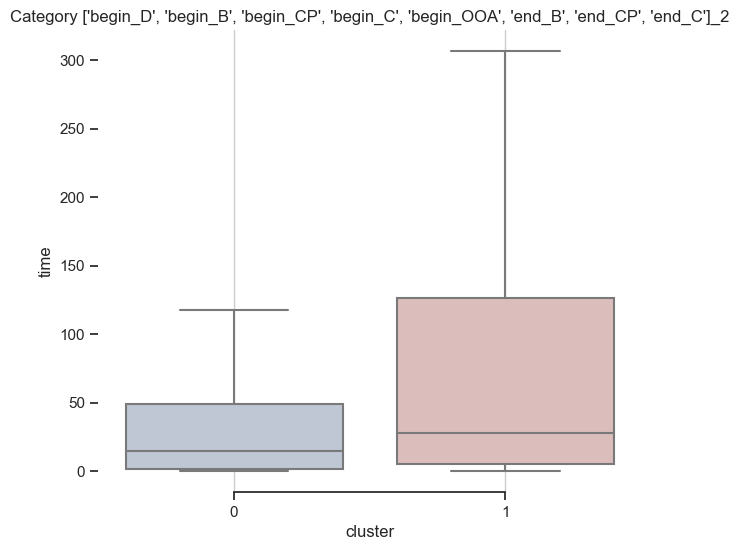

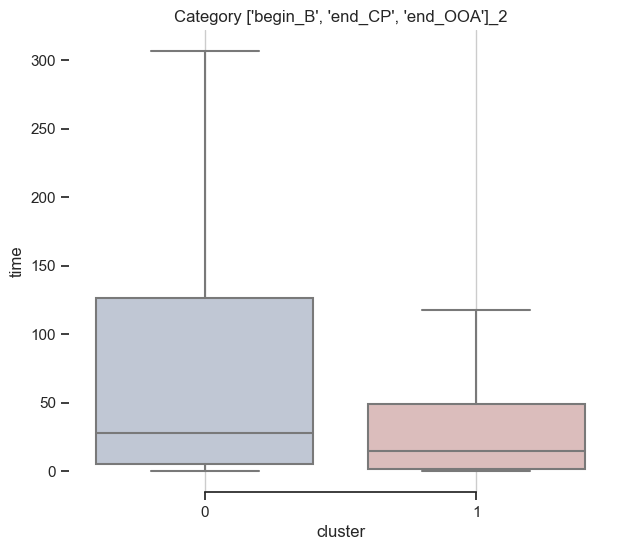

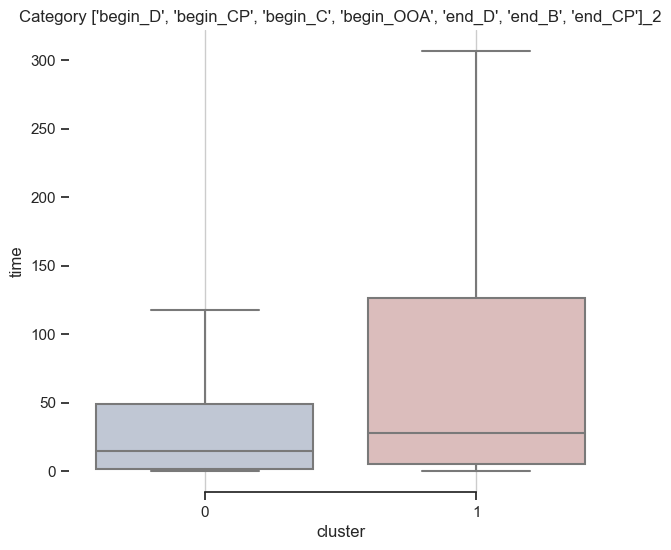

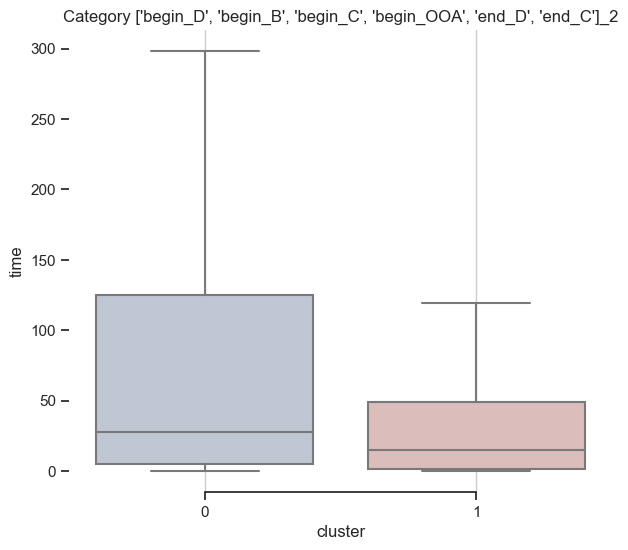

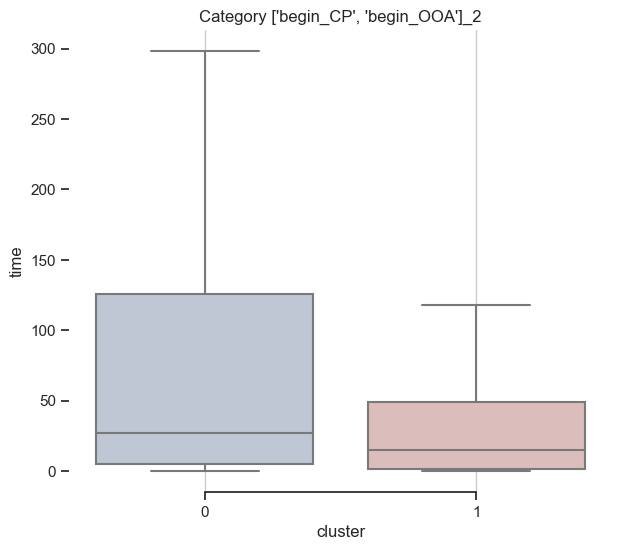

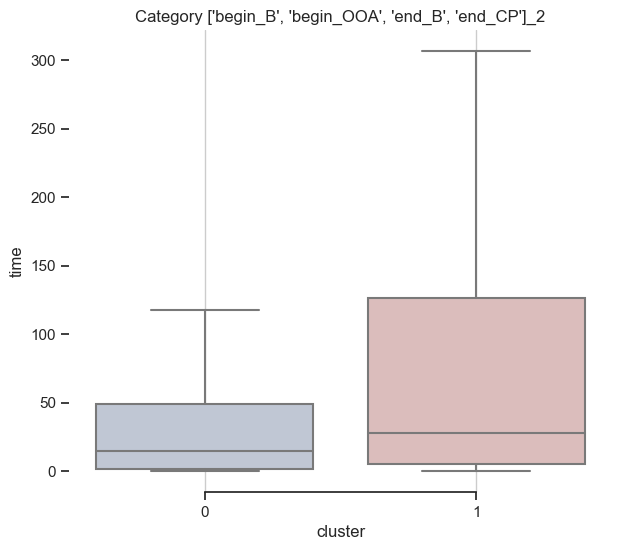

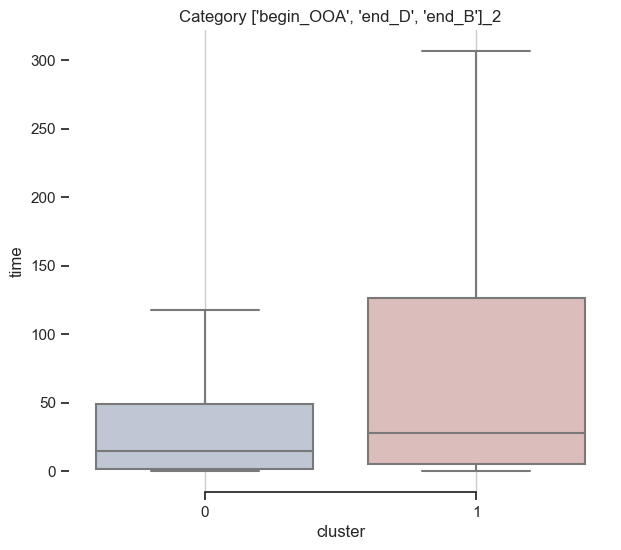

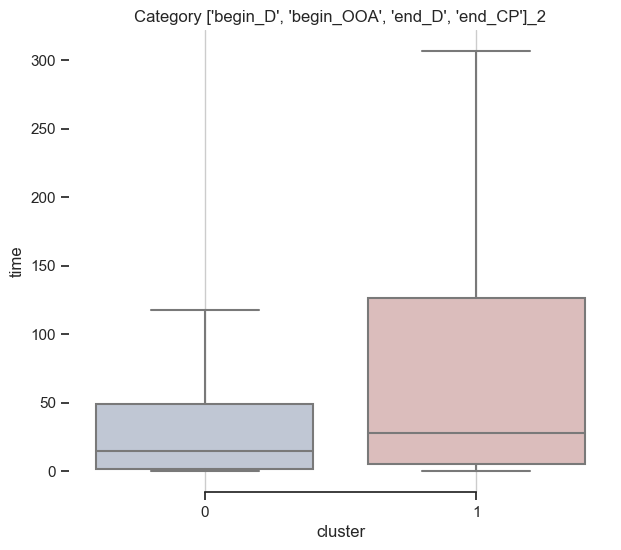

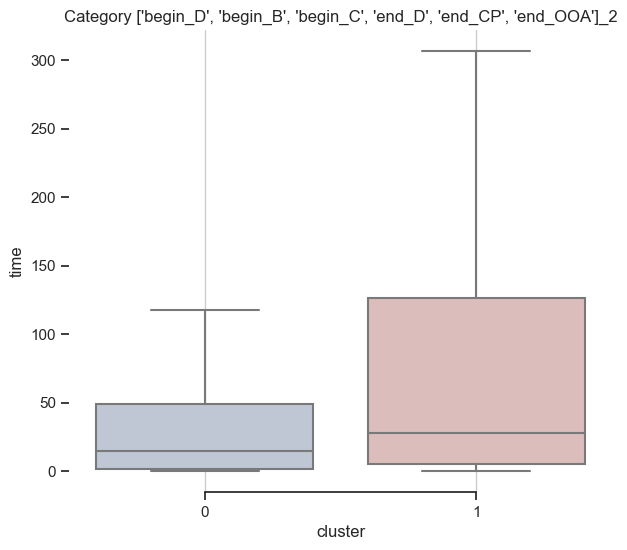

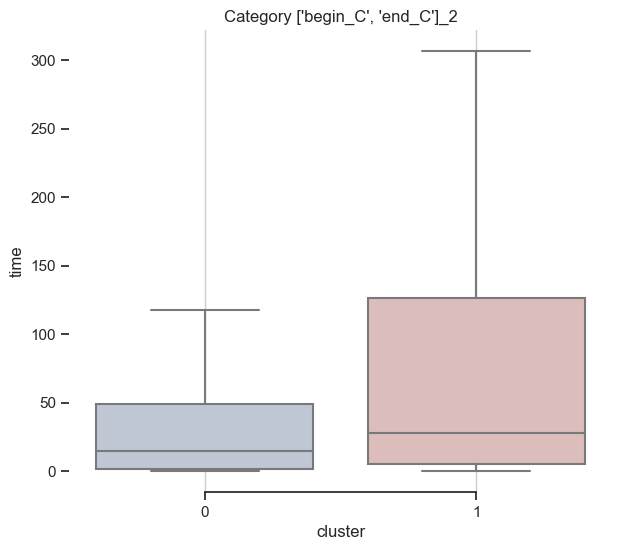

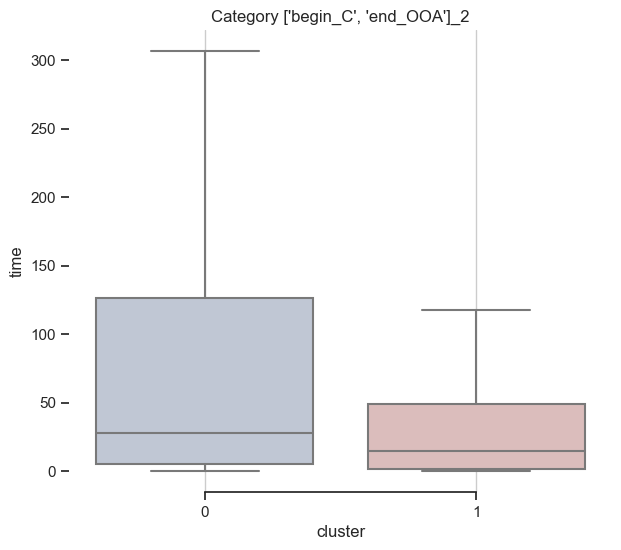

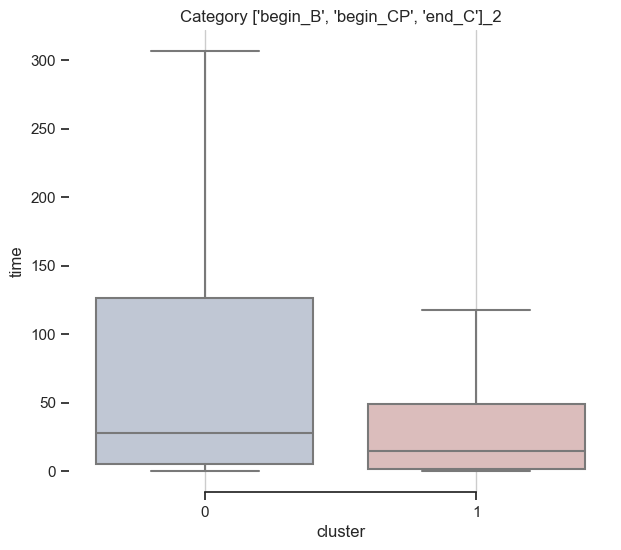

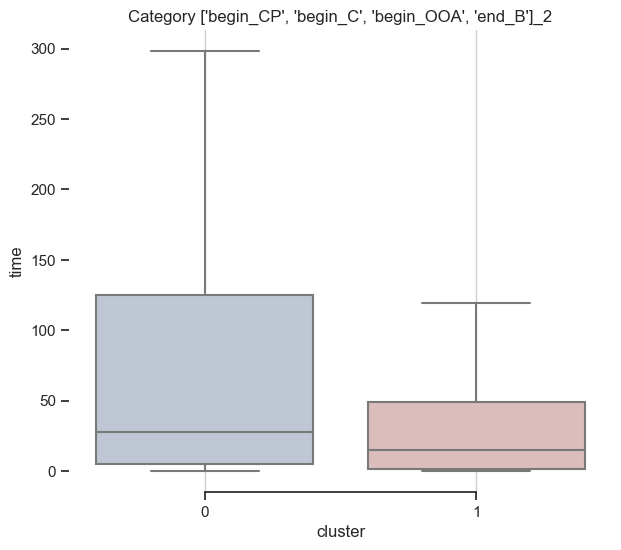

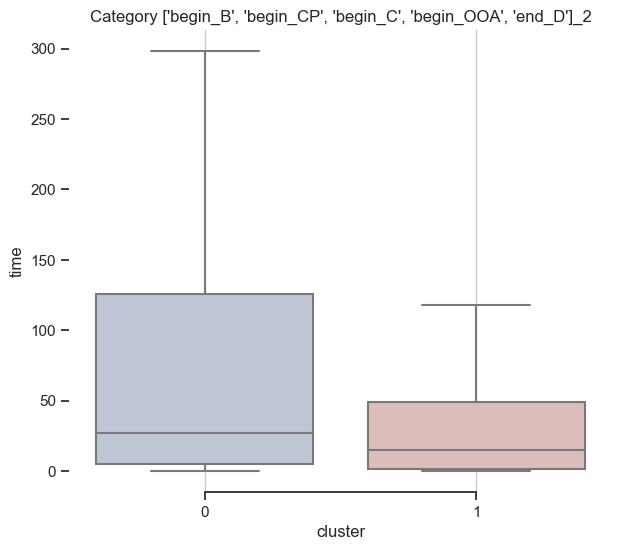

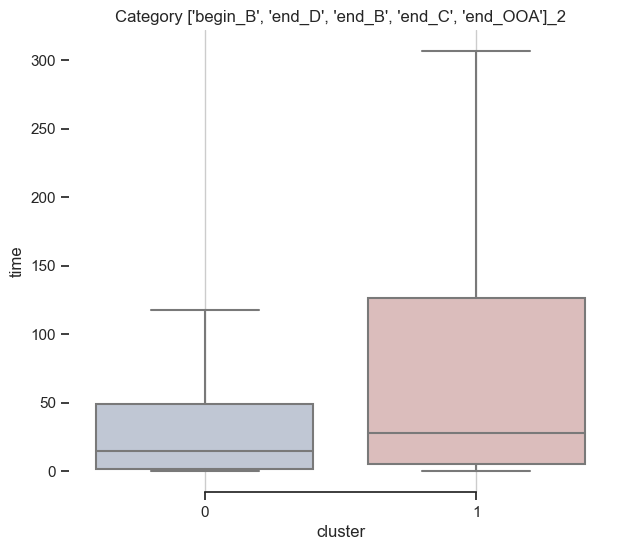

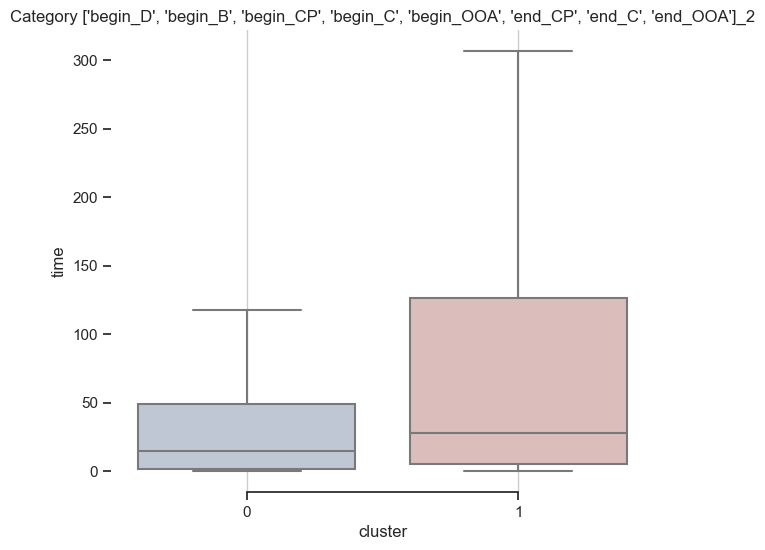

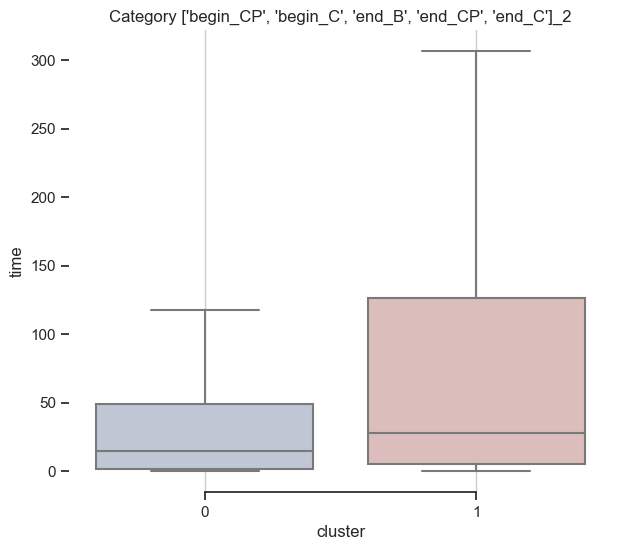

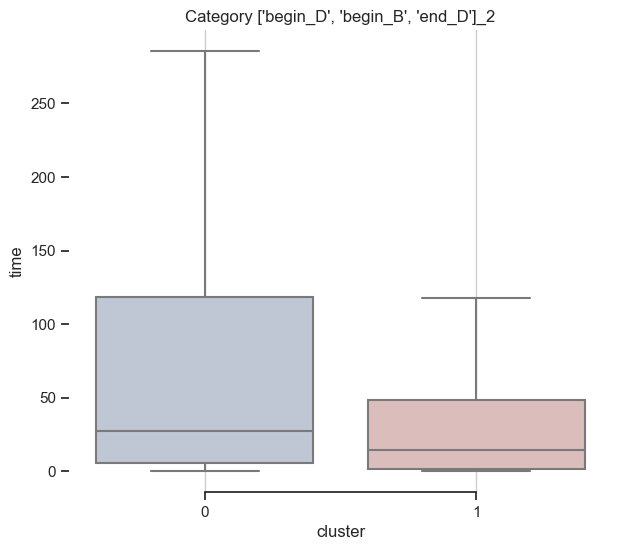

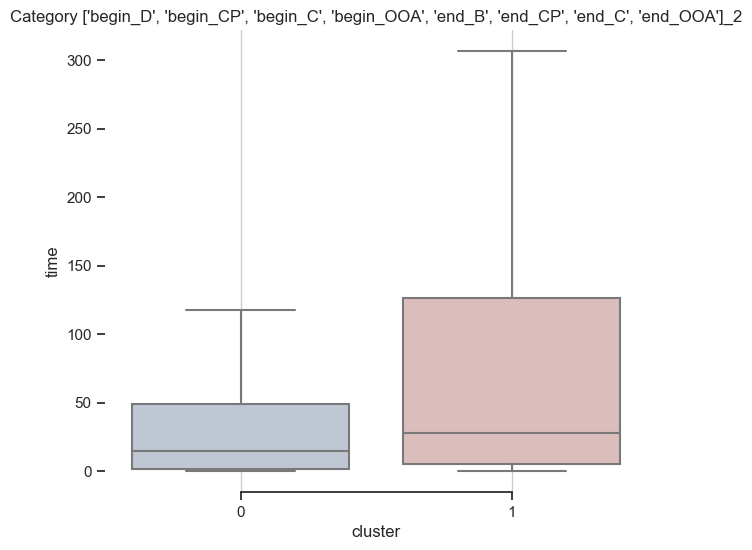

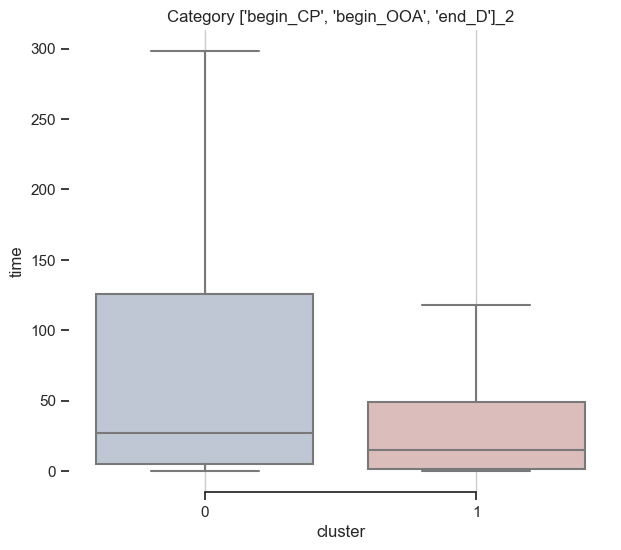

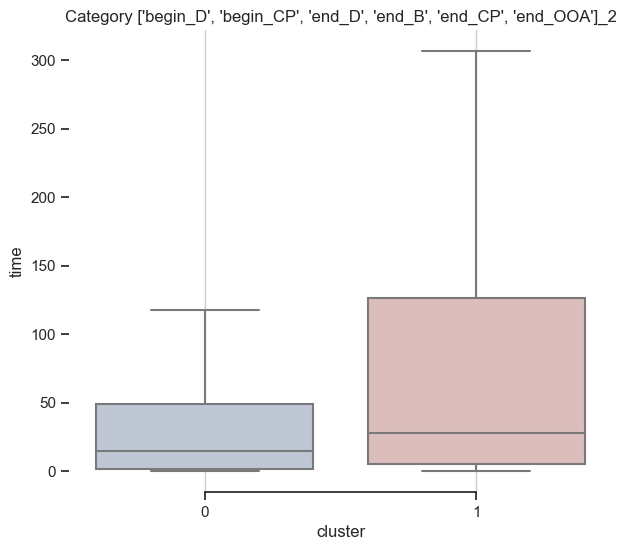

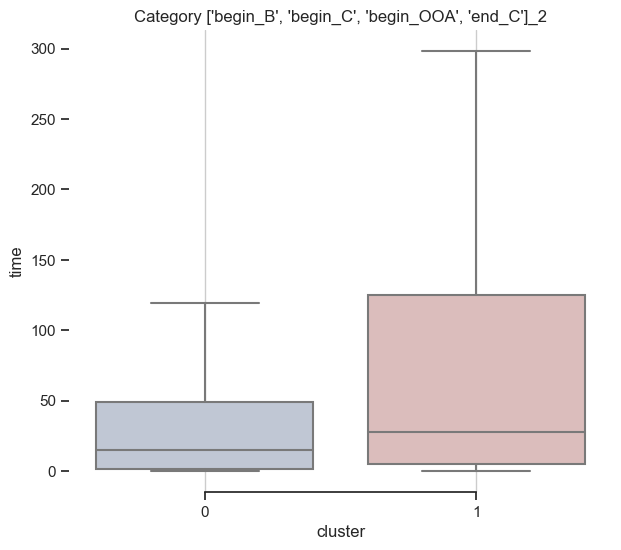

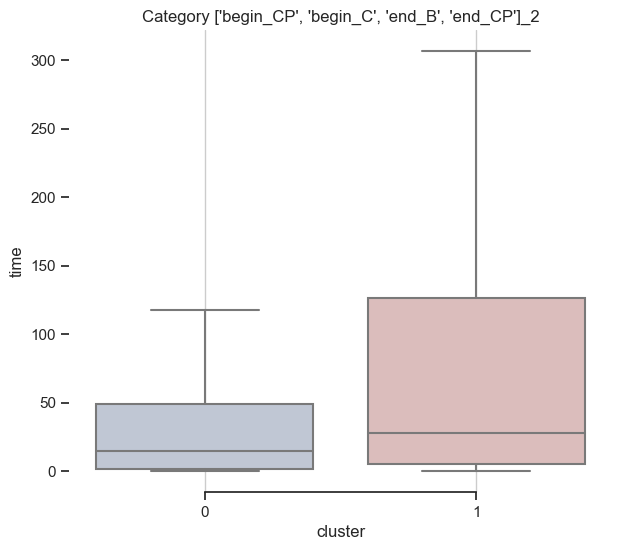

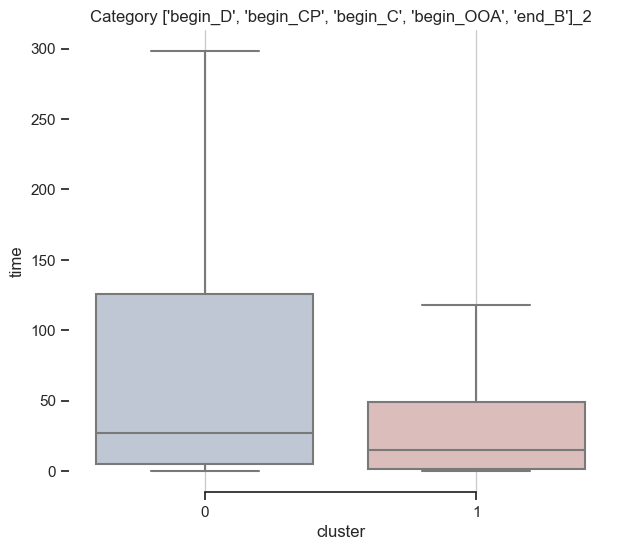

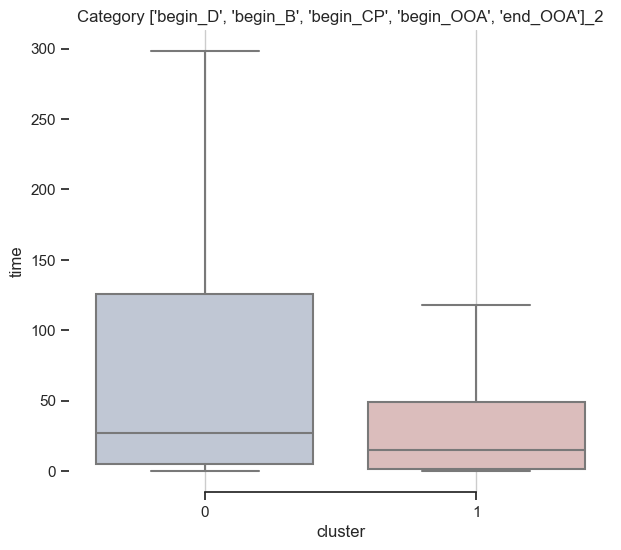

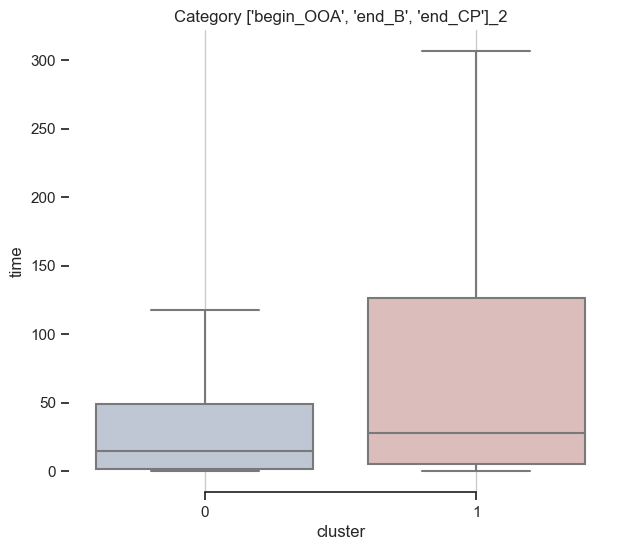

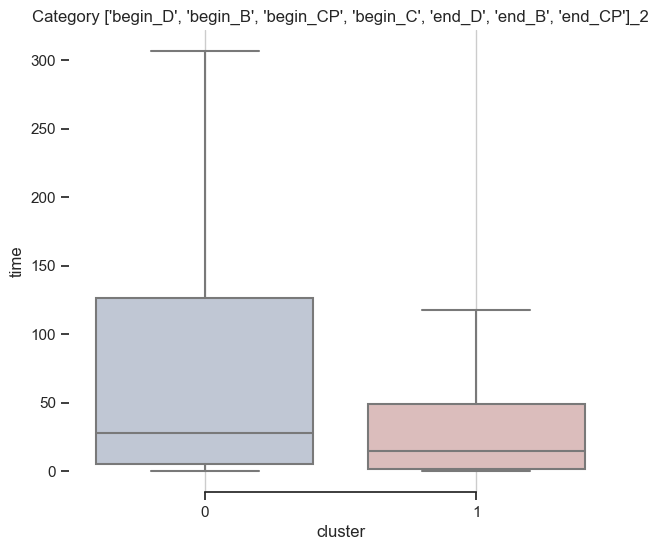

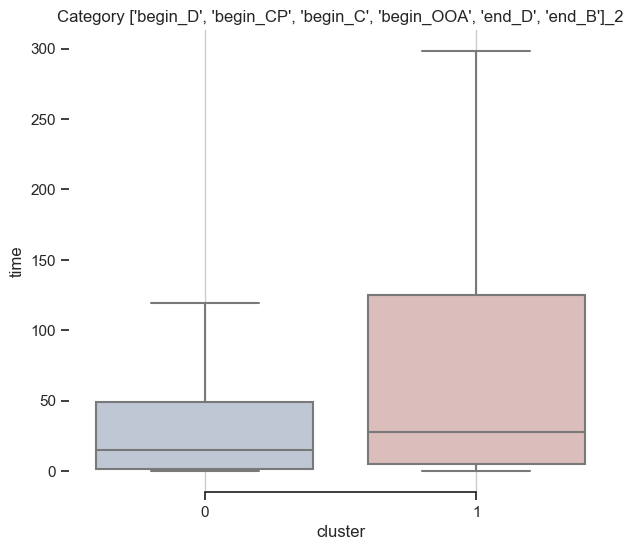

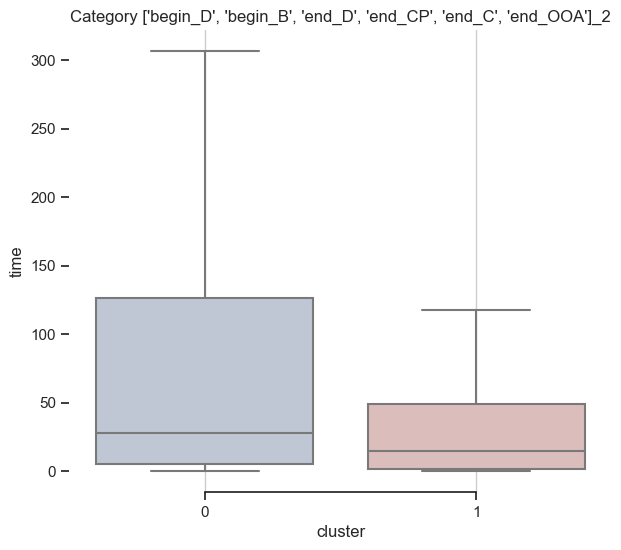

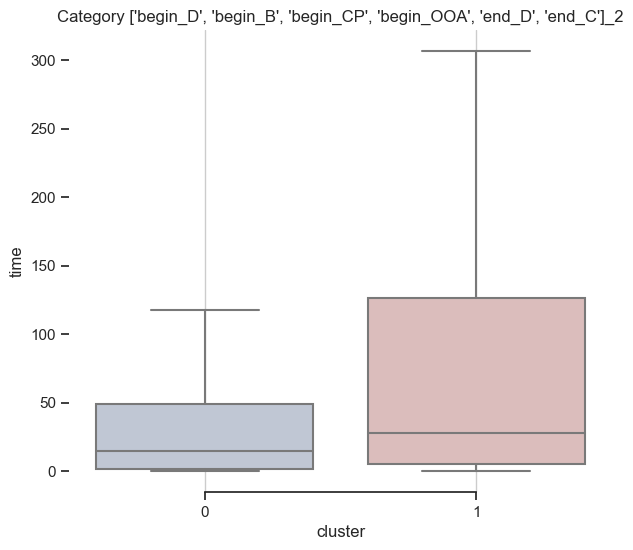

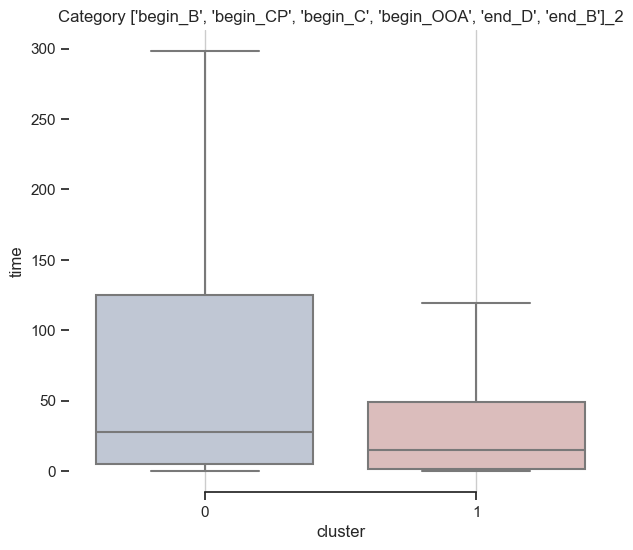

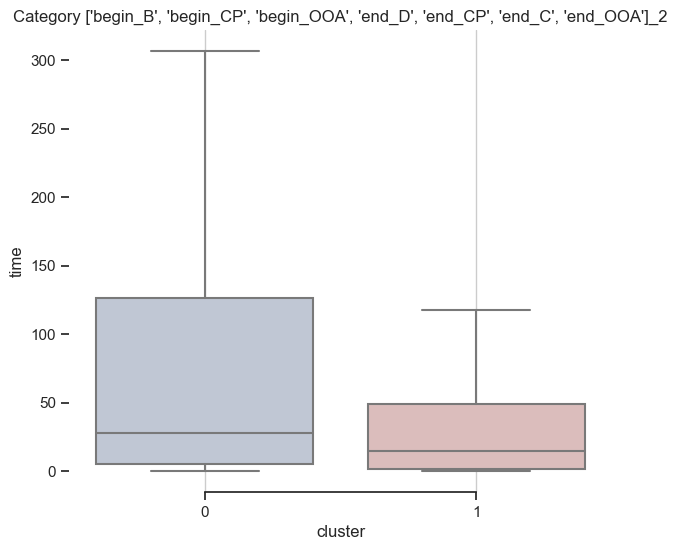

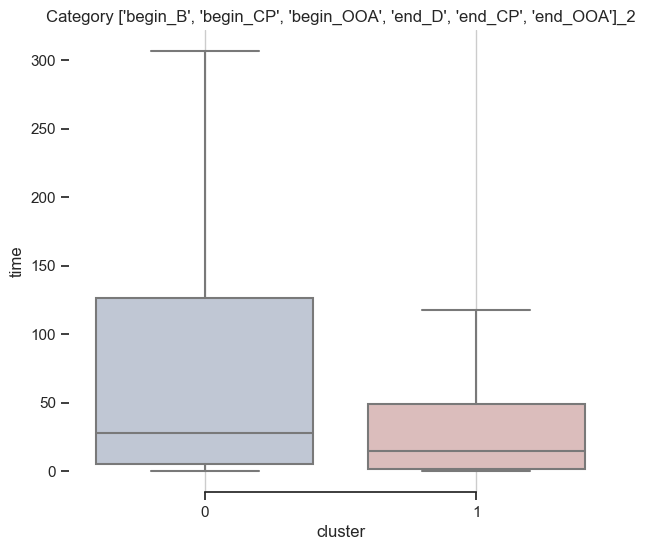

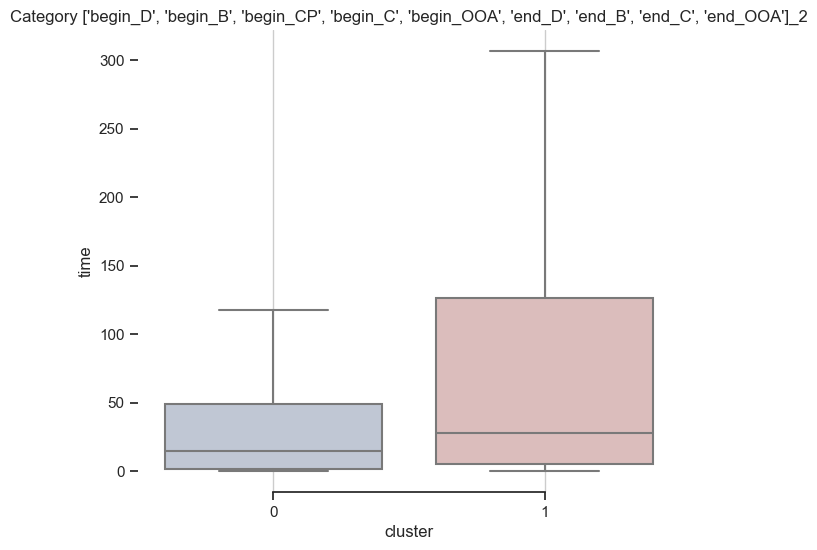

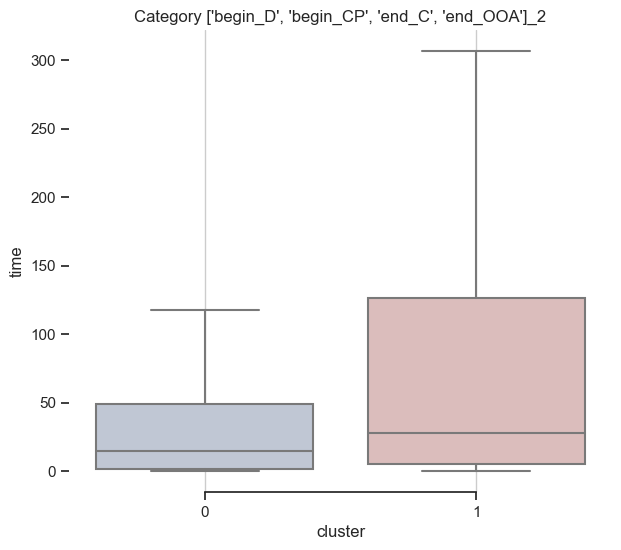

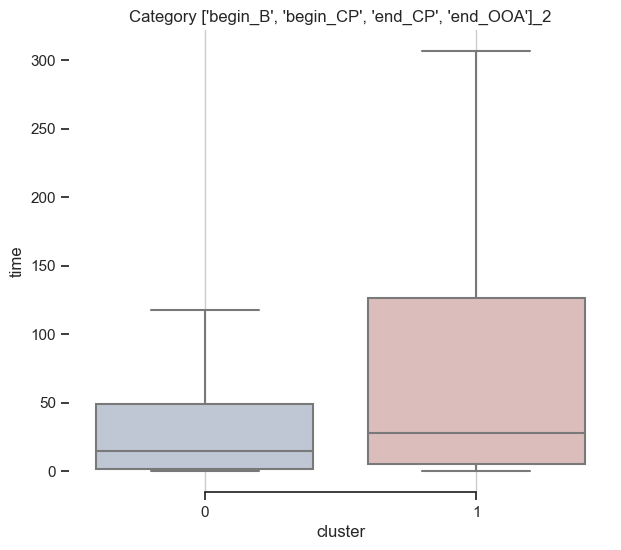

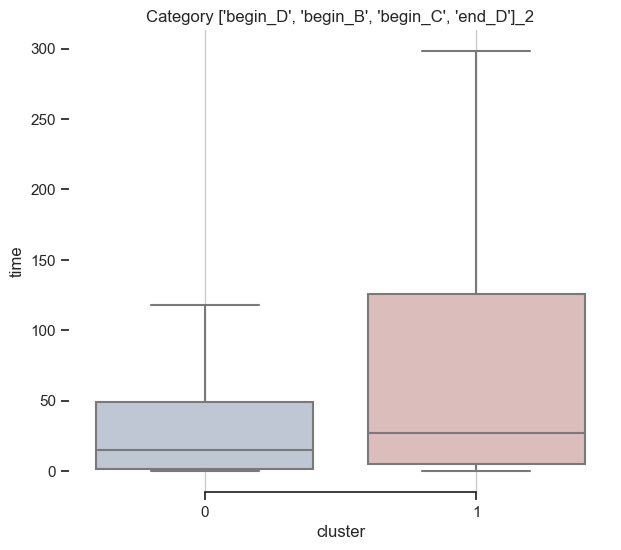

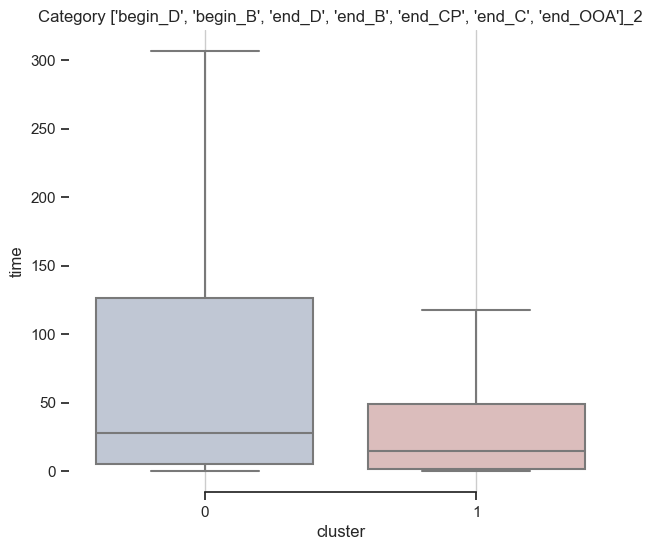

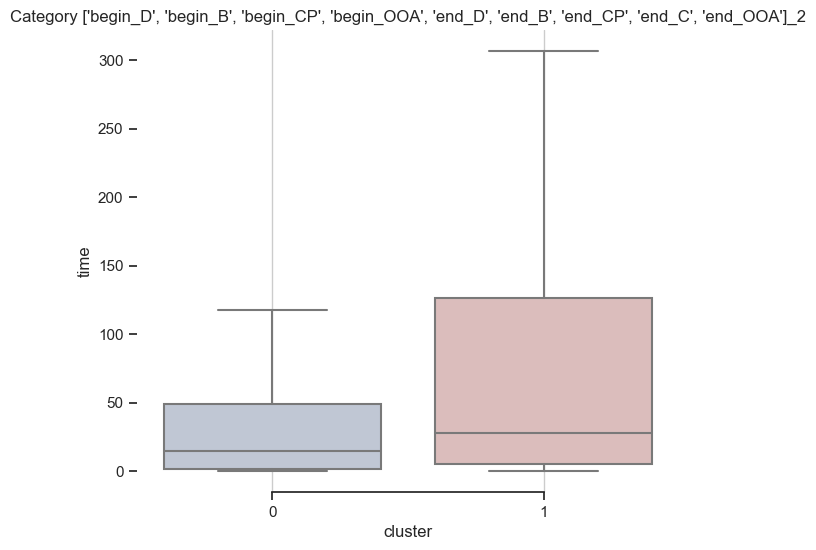

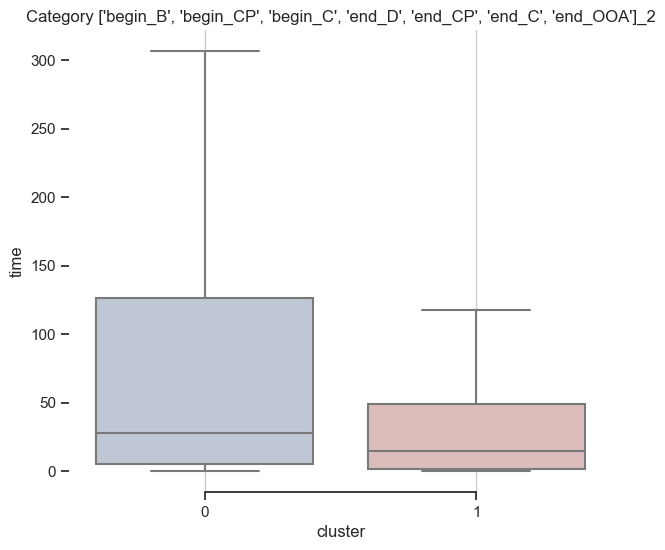

In [11]:
directory_path = r'../../models/KMeans/cluster2'
directory_path_box = r'../../models/Box/2'

parquet_files = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]
print(parquet_files)

for parquet in parquet_files:
    file_path = os.path.join(directory_path, parquet)
    # print("file :::" , file_path)
    variable_name = os.path.splitext(parquet)[0]
    print("Var ::" , variable_name)
    df_col_combined = pd.read_pickle(file_path)
    
    
    date = pd.to_timedelta(df_col_combined['total_time'])
    time_hours = date.dt.total_seconds() / 3600
    
    df_col_combined['hours'] = time_hours
    print("DF ::" , df_col_combined)
    
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(7, 6))

    sns.boxplot(df_col_combined, x=df_col_combined.columns[-4], y="hours", 
                # orient='h' , 
                # whis=[0, 100], 
                # width=.5,
                showfliers=False,
                palette="vlag")
    
    # sns.boxplot(df_col_combined, x="hours", y=df_col_combined.columns[-4],  orient='h' , 
    #             whis=[0, 100], 
    #             width=.5,
    #             showfliers=False,
    #             palette="vlag")
    
    
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    plt.title(f'Category {df_col_combined.columns[-4]}')
    plt.xlabel('cluster')
    plt.ylabel('time')
    
    output_file_path = os.path.splitext("box_plot")[0] + f'{df_col_combined.columns[-4]}.png'
    plt.savefig(output_file_path)

In [12]:
df_col_combined.columns[-4]

"['begin_B', 'begin_CP', 'begin_C', 'end_D', 'end_CP', 'end_C', 'end_OOA']_2"